In [ ]:
#SET UP AND DATA ACQUISITION

import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import statsmodels.api as sm

# Function to get FRED data
def get_fred_data(series_id, api_key):
    url = f"https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&file_type=json"
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Error retrieving data: {response.status_code} - {response.text}")
        return pd.DataFrame()

    data = response.json()
    if 'observations' not in data:
        print(f"Unexpected response format: {data}")
        return pd.DataFrame()

    df = pd.DataFrame(data['observations'])
    df['date'] = pd.to_datetime(df['date'])
    df['value'] = pd.to_numeric(df['value'], errors='coerce')
    return df

# Function to extract year and month
def extract_year_month(df, date_column):
    df['year_month'] = df[date_column].dt.strftime('%Y-%m')
    return df

# FRED API key
api_key = 'e27f8eae7a77b2b9d0210f2aaeda8868'

# Download S&P 500 data
spy_data = yf.download('SPY', start='2000-01-01', end='2024-10-25', interval='3mo')
spy_data.reset_index(inplace=True)
spy_data.columns = spy_data.columns.get_level_values(0)  # Flatten multi-level index
spy_data['year_month'] = spy_data['Date'].dt.strftime('%Y-%m')
spy_data['returns'] = spy_data['Adj Close'].pct_change() * 100
spy_data.dropna(subset=['returns'], inplace=True)

[*********************100%***********************]  1 of 1 completed


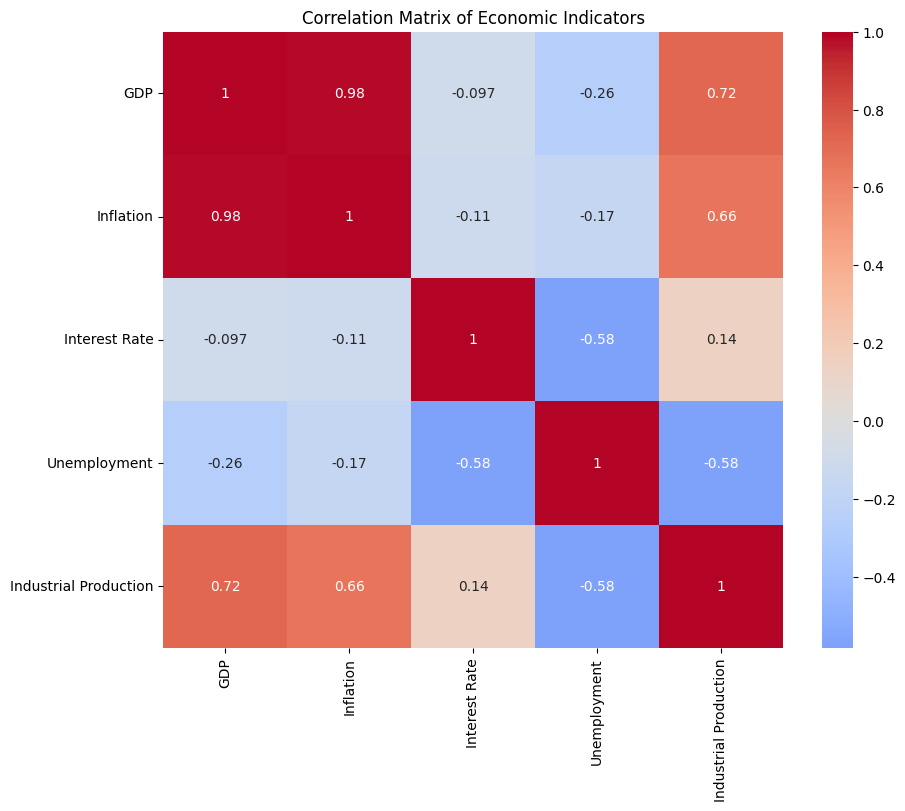

In [ ]:
#ECONOMIC INDICATORS AND CORRELATION ANALYSIS

# Retrieve economic data
gdp_data = get_fred_data('GDPC1', api_key)
inflation_data = get_fred_data('CPIAUCSL', api_key)
interest_rate_data = get_fred_data('FEDFUNDS', api_key)
unemployment_data = get_fred_data('UNRATE', api_key)
industrial_production_data = get_fred_data('INDPRO', api_key)

# Extract year and month for all datasets and filter from 2000
gdp_data = extract_year_month(gdp_data, 'date')
gdp_data = gdp_data[gdp_data['date'] >= '2000-01-01']
inflation_data = extract_year_month(inflation_data, 'date')
inflation_data = inflation_data[inflation_data['date'] >= '2000-01-01']
interest_rate_data = extract_year_month(interest_rate_data, 'date')
interest_rate_data = interest_rate_data[interest_rate_data['date'] >= '2000-01-01']
unemployment_data = extract_year_month(unemployment_data, 'date')
unemployment_data = unemployment_data[unemployment_data['date'] >= '2000-01-01']
industrial_production_data = extract_year_month(industrial_production_data, 'date')
industrial_production_data = industrial_production_data[industrial_production_data['date'] >= '2000-01-01']

# Merge all economic indicators into one DataFrame
combined_economic_data = pd.merge(gdp_data[['year_month', 'value']].rename(columns={'value': 'GDP'}),
    inflation_data[['year_month', 'value']].rename(columns={'value': 'Inflation'}), on='year_month', how='inner')
combined_economic_data = pd.merge(combined_economic_data,
    interest_rate_data[['year_month', 'value']].rename(columns={'value': 'Interest Rate'}), on='year_month', how='inner')
combined_economic_data = pd.merge(combined_economic_data,
    unemployment_data[['year_month', 'value']].rename(columns={'value': 'Unemployment'}), on='year_month', how='inner')
combined_economic_data = pd.merge(combined_economic_data,
    industrial_production_data[['year_month', 'value']].rename(columns={'value': 'Industrial Production'}), on='year_month', how='inner')

# Calculate the correlation matrix excluding non-numeric columns like 'year_month'
economic_correlation_matrix = combined_economic_data.drop(columns=['year_month']).corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(economic_correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Economic Indicators')
plt.show()


[*********************100%***********************]  1 of 1 completed


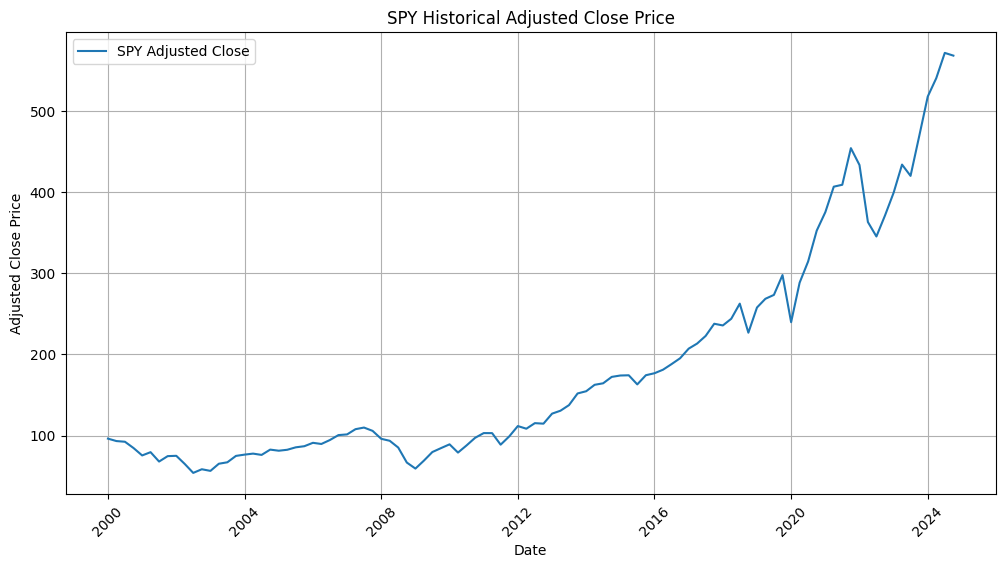

[*********************100%***********************]  1 of 1 completed


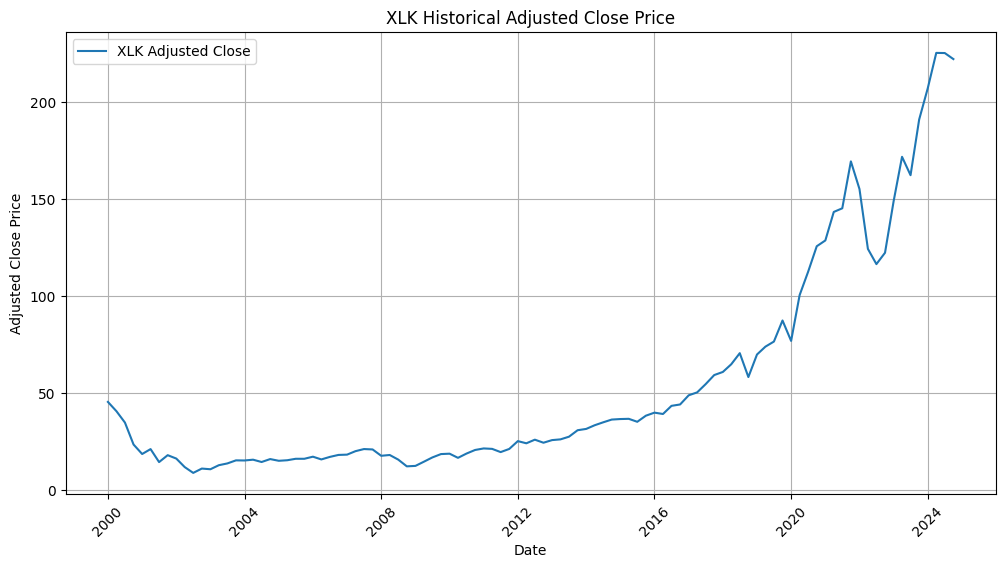

[*********************100%***********************]  1 of 1 completed


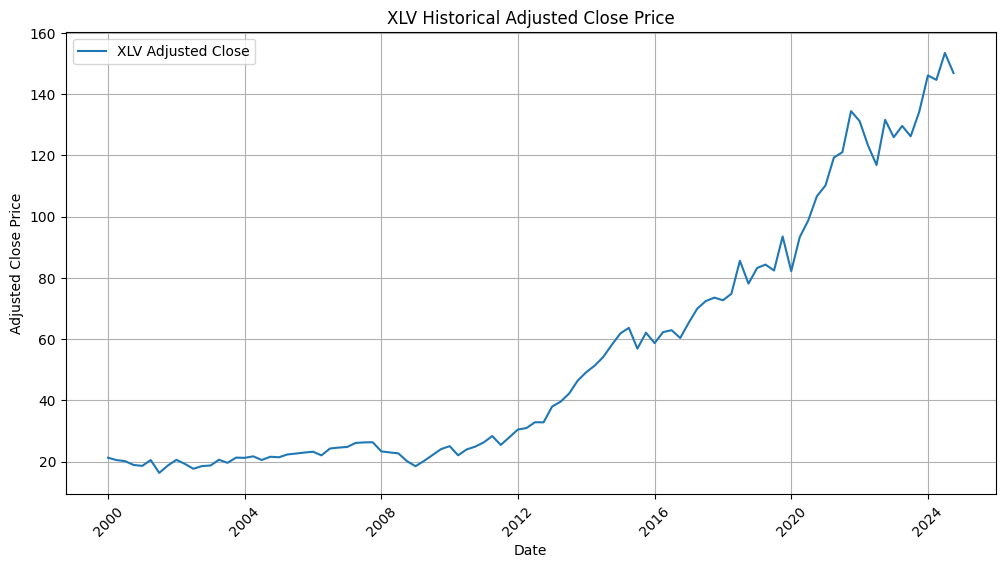

[*********************100%***********************]  1 of 1 completed


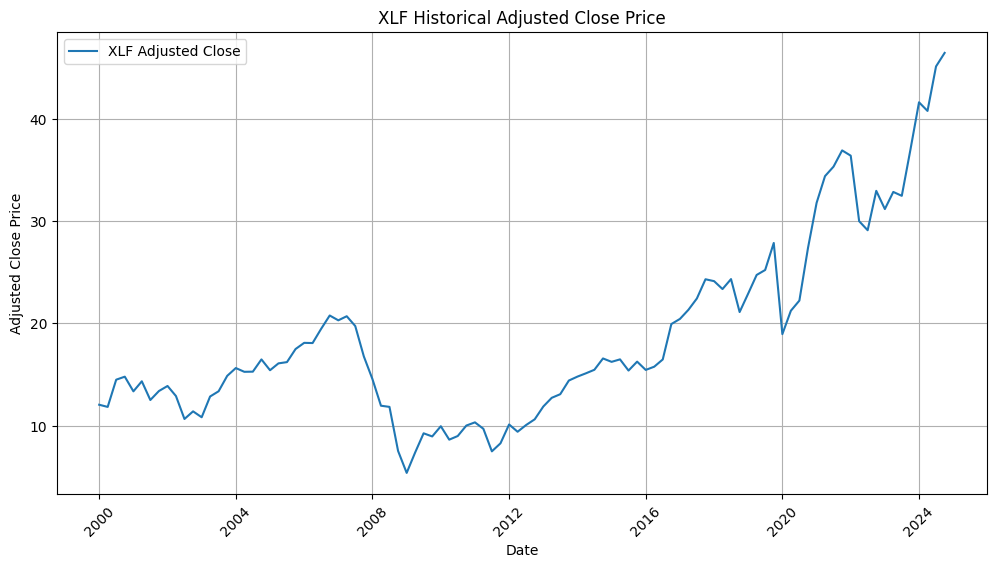

[*********************100%***********************]  1 of 1 completed


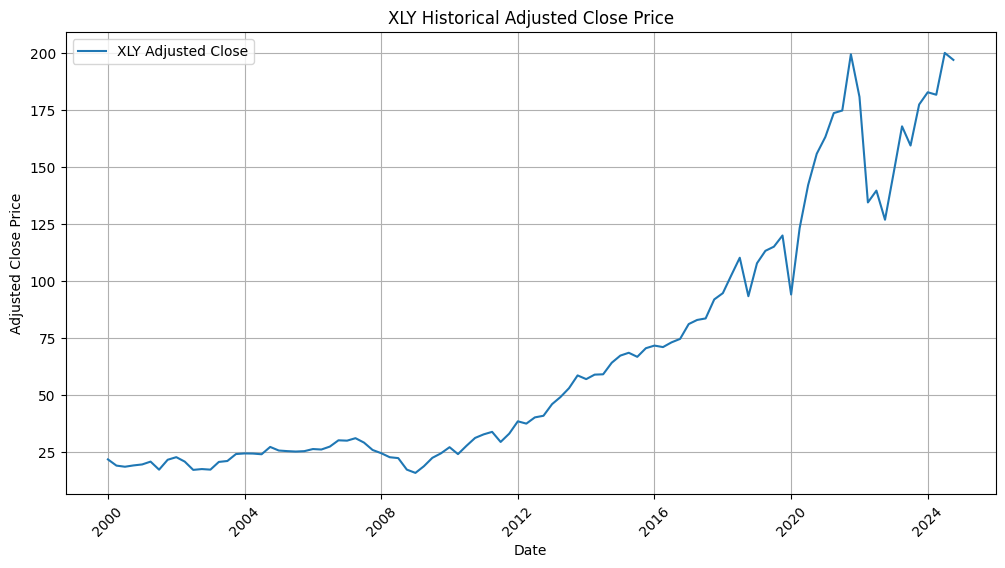

[*********************100%***********************]  1 of 1 completed


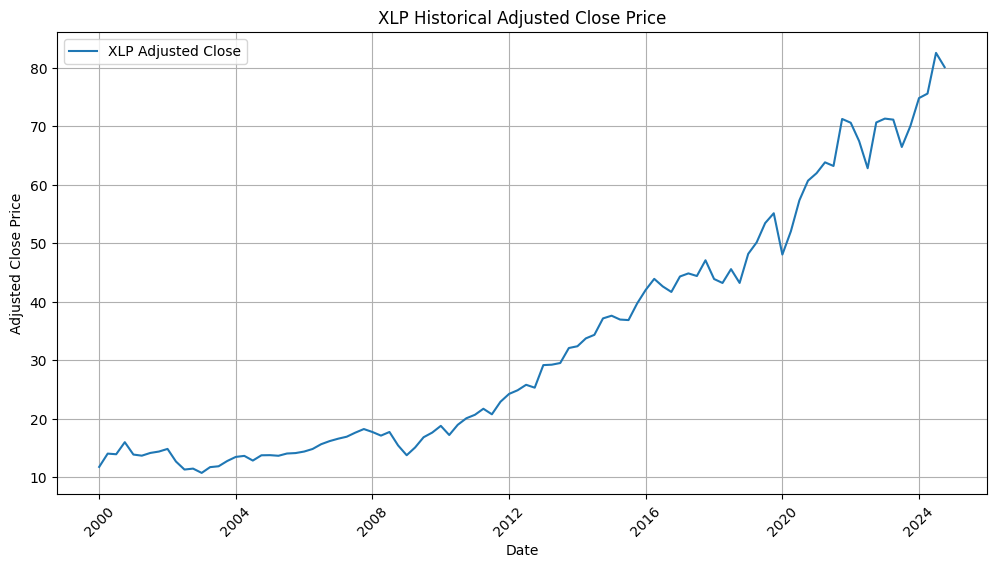

[*********************100%***********************]  1 of 1 completed


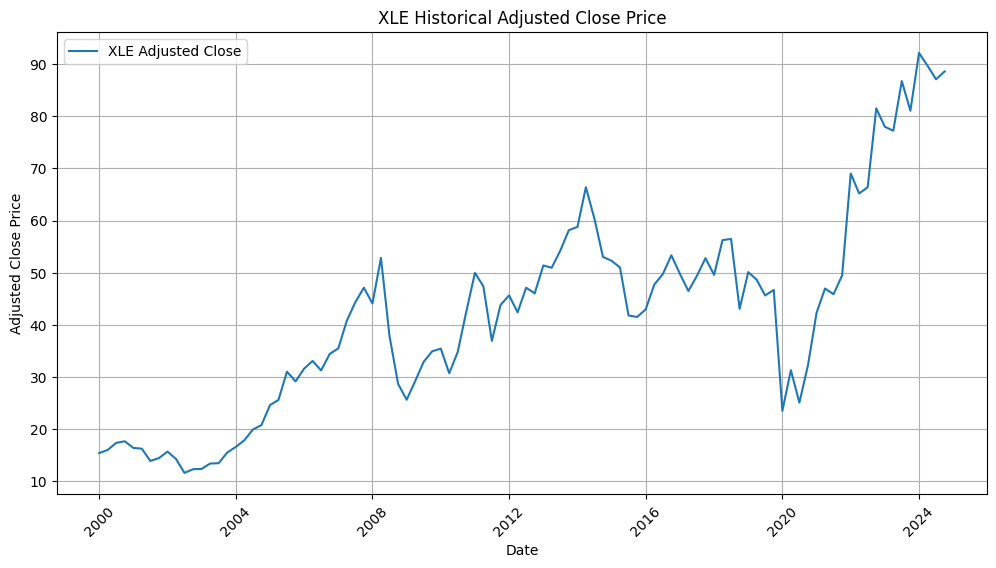

[*********************100%***********************]  1 of 1 completed


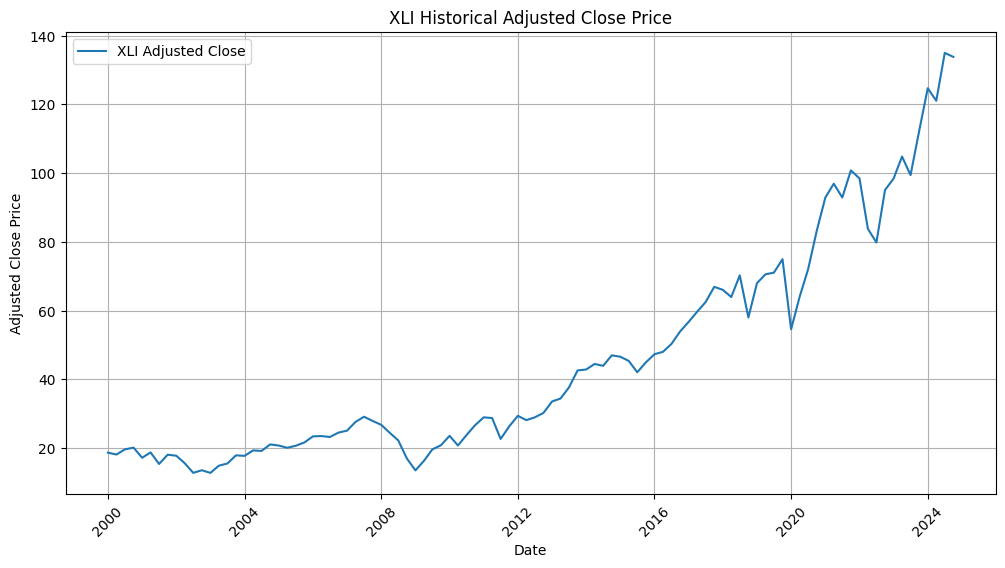

[*********************100%***********************]  1 of 1 completed


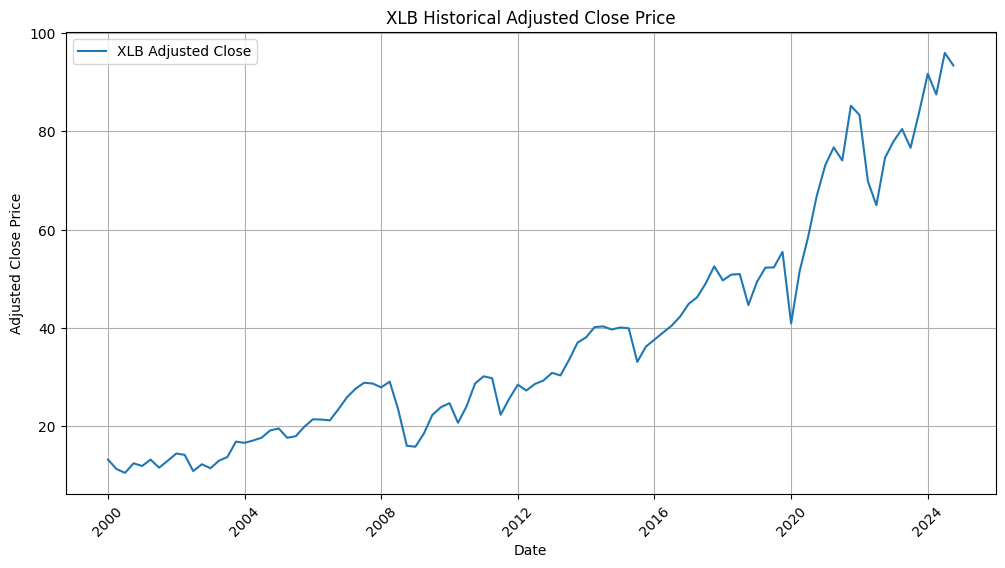

[*********************100%***********************]  1 of 1 completed


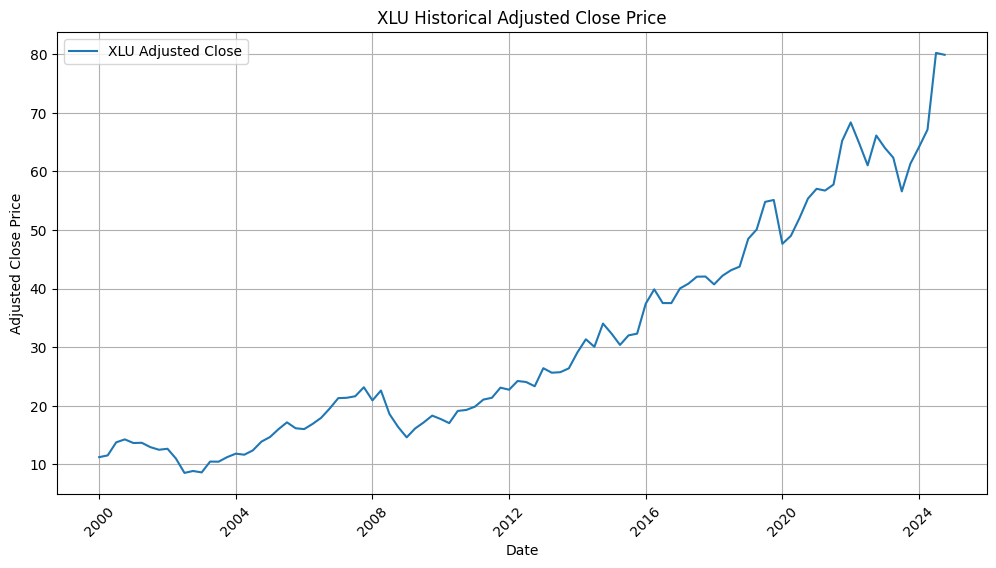

[*********************100%***********************]  1 of 1 completed


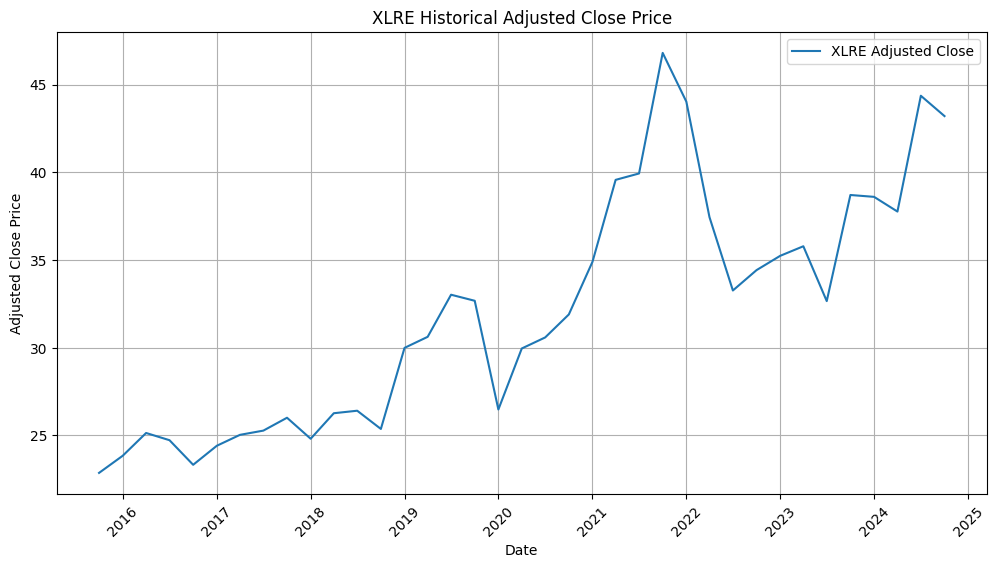

In [ ]:
#ETFS FROM YAHOO FINANCE

# List of ETFs to analyze
etfs = ["SPY", "XLK", "XLV", "XLF", "XLY", "XLP", "XLE", "XLI", "XLB", "XLU", "XLRE"]

# Download and plot data for each ETF
for etf in etfs:
    etf_data = yf.download(etf, start='2000-01-01', end='2024-10-25', interval='3mo')
    etf_data.reset_index(inplace=True)

    # Plot ETF data
    plt.figure(figsize=(12, 6))
    plt.plot(etf_data['Date'], etf_data['Adj Close'], label=f'{etf} Adjusted Close')
    plt.title(f'{etf} Historical Adjusted Close Price')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.show()

# HYPOTHESIS 1: IMPACT OF ECONOMIC GROWTH ON STOCK MARKET RETURNS

[*********************100%***********************]  1 of 1 completed


Correlation between GDP growth and SPY returns: 0.13613496193255883


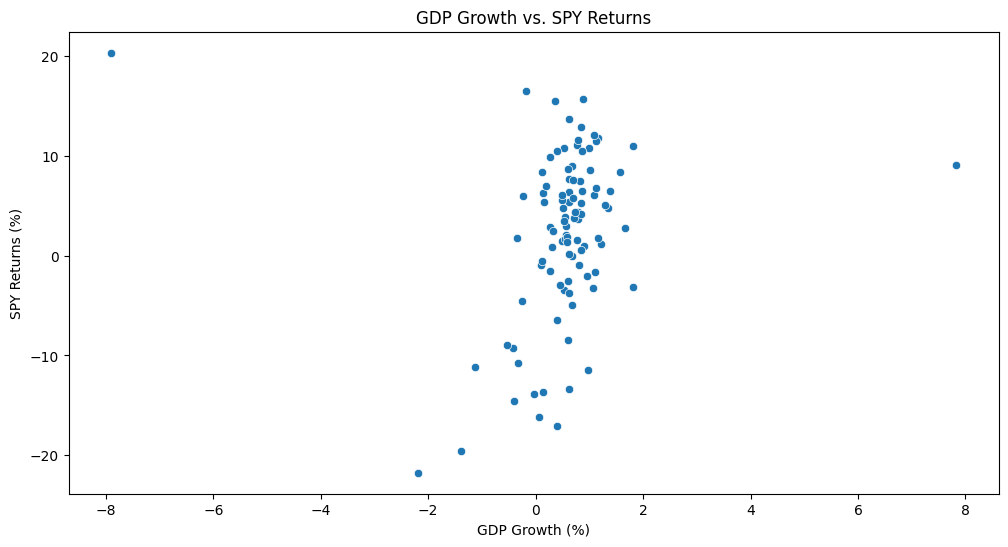

[*********************100%***********************]  1 of 1 completed


Correlation between GDP growth and XLK returns: 0.058693776450899376


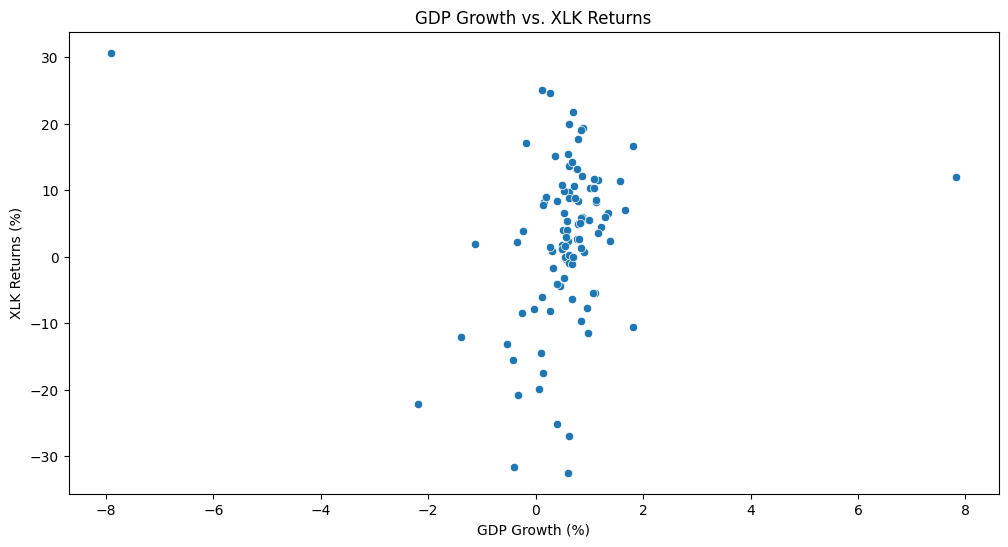

[*********************100%***********************]  1 of 1 completed


Correlation between GDP growth and XLV returns: 0.09544239369879814


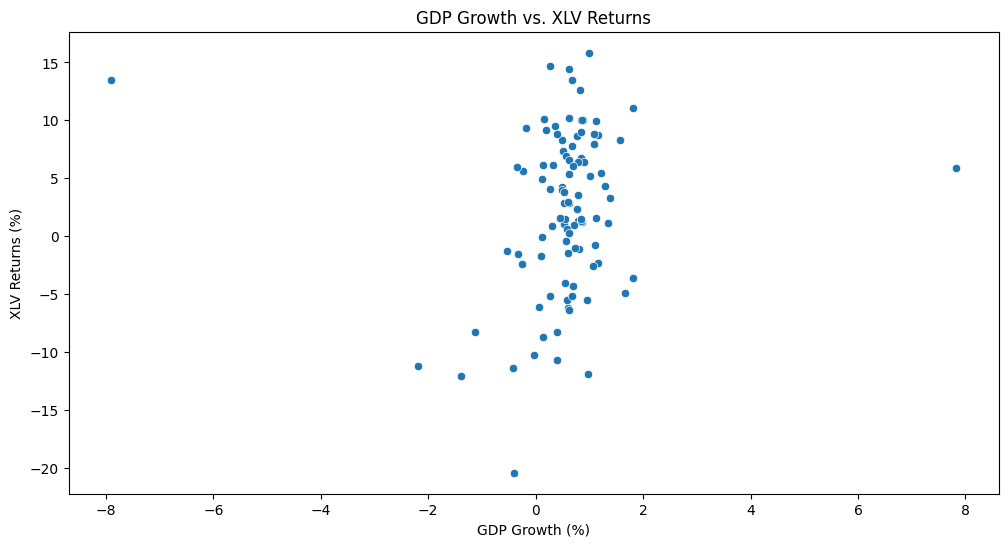

[*********************100%***********************]  1 of 1 completed


Correlation between GDP growth and XLF returns: 0.16557121459291868


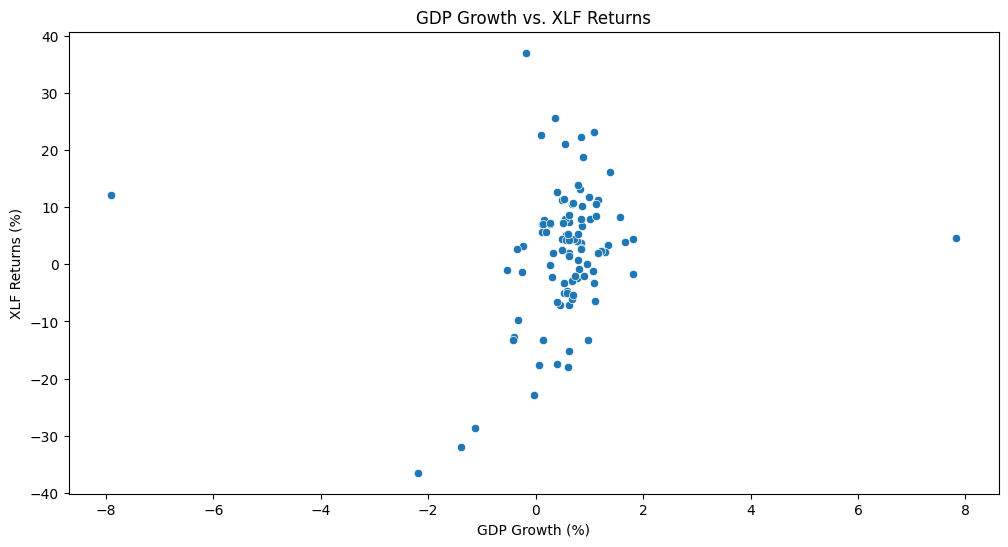

[*********************100%***********************]  1 of 1 completed


Correlation between GDP growth and XLY returns: 0.06539265410797979


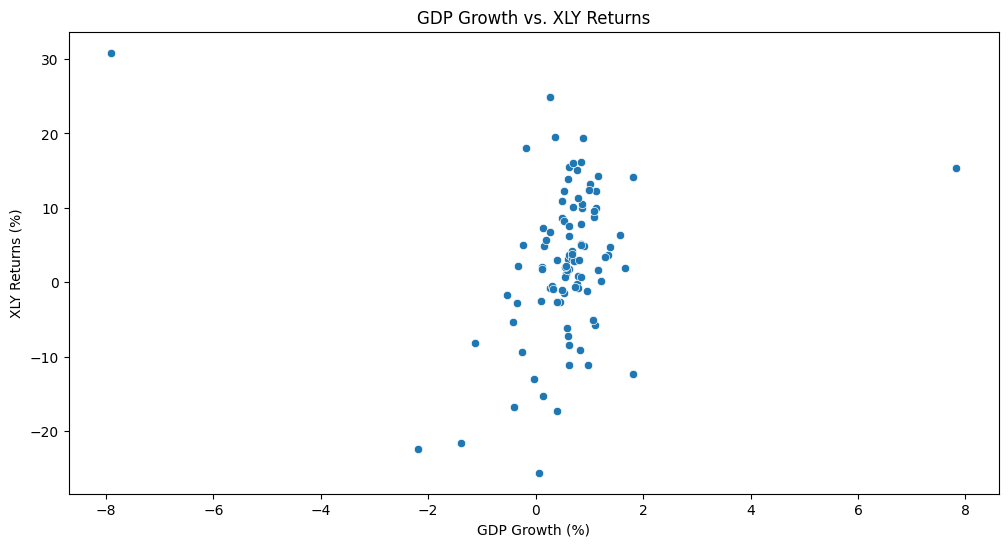

[*********************100%***********************]  1 of 1 completed


Correlation between GDP growth and XLP returns: 0.2178098199551388


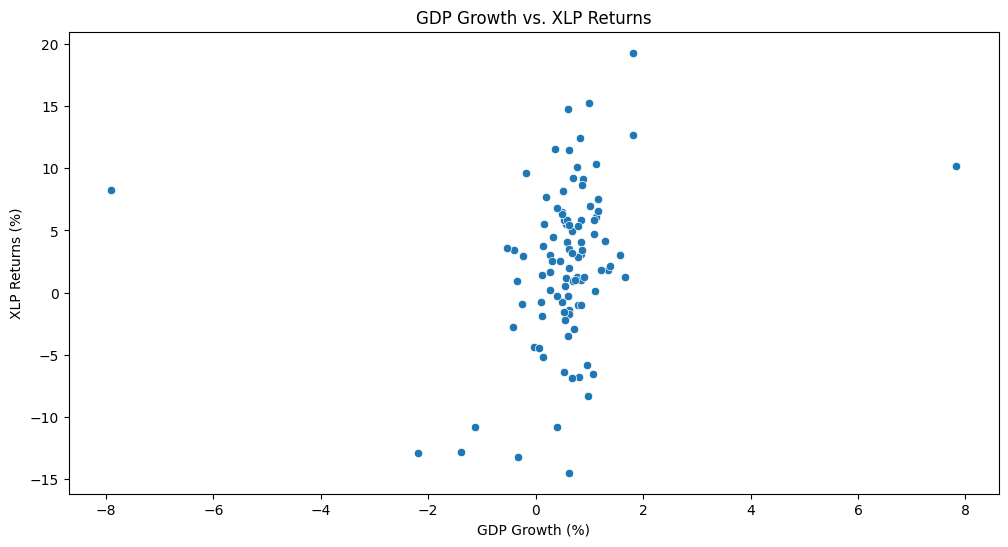

[*********************100%***********************]  1 of 1 completed


Correlation between GDP growth and XLE returns: -0.04527764616721145


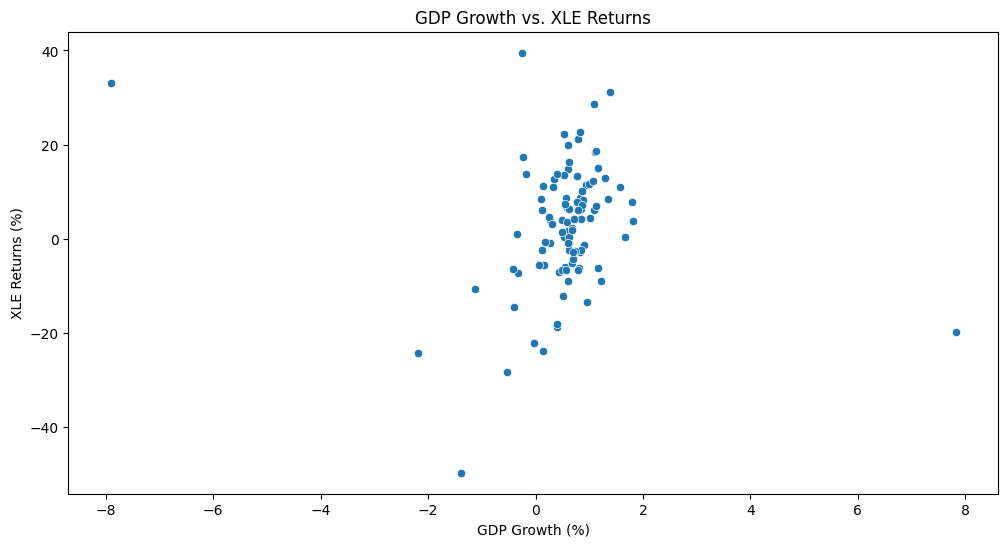

[*********************100%***********************]  1 of 1 completed


Correlation between GDP growth and XLI returns: 0.18542416082760238


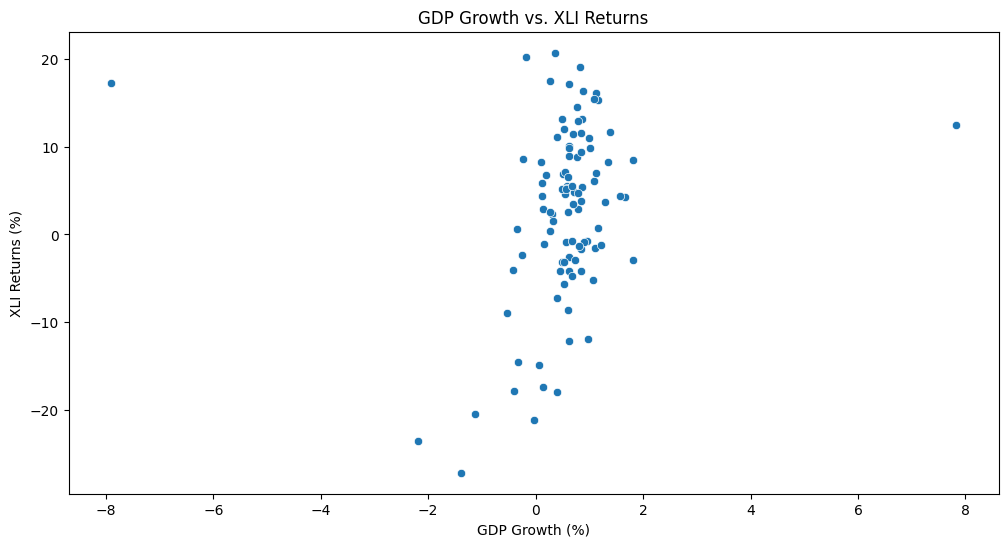

[*********************100%***********************]  1 of 1 completed


Correlation between GDP growth and XLB returns: 0.12155390157839041


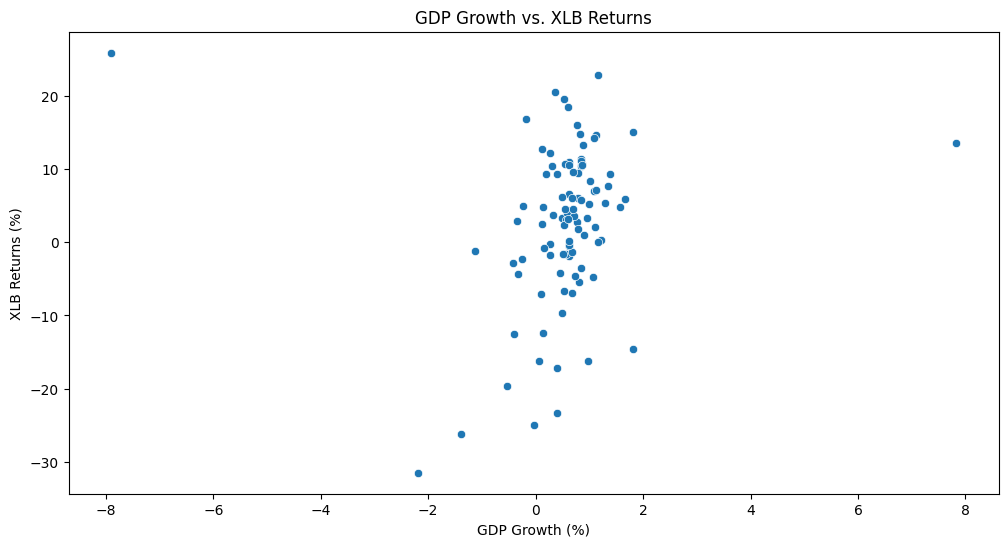

[*********************100%***********************]  1 of 1 completed


Correlation between GDP growth and XLU returns: 0.18755149984078398


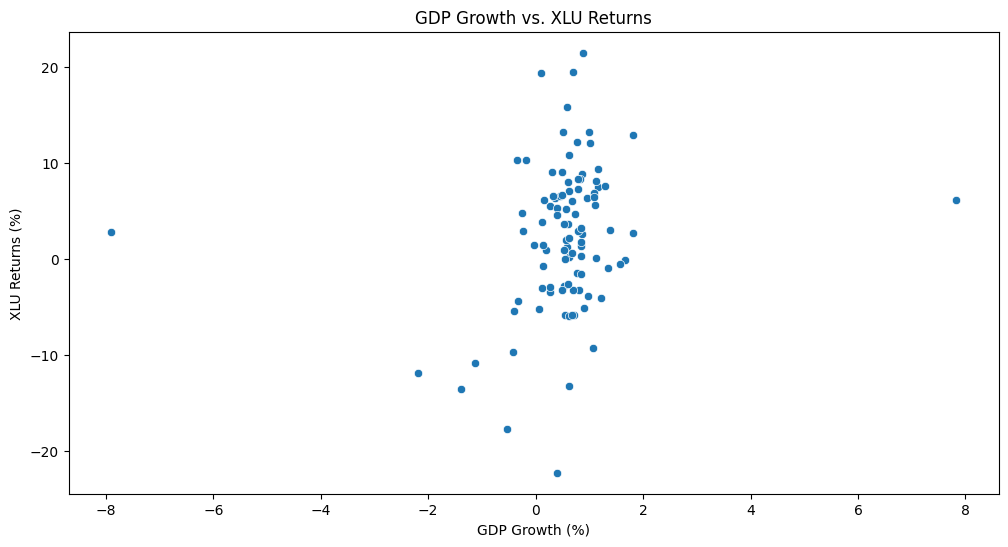

[*********************100%***********************]  1 of 1 completed


Correlation between GDP growth and XLRE returns: 0.002467497815909107


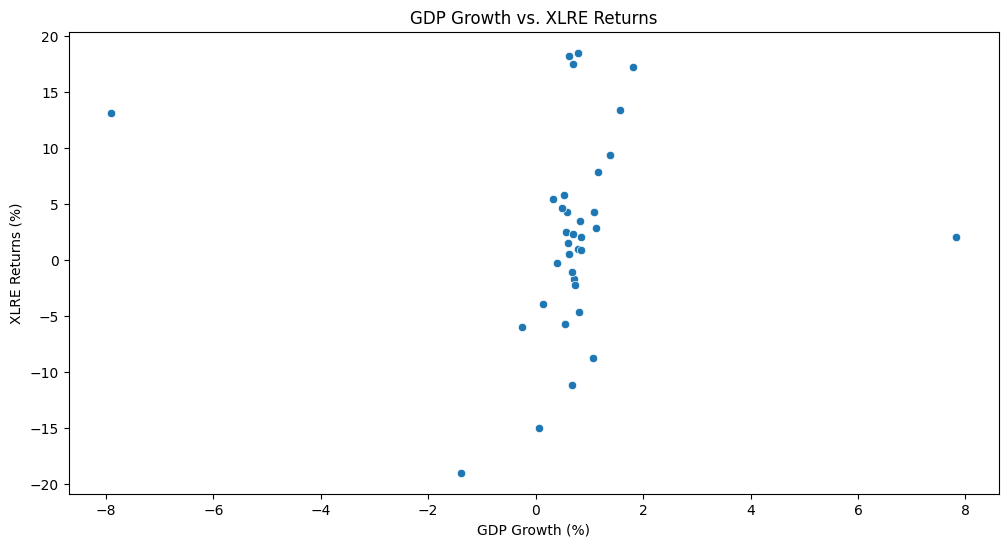

In [ ]:
# Calculate GDP growth rate
gdp_data['growth_rate'] = gdp_data['value'].pct_change() * 100
gdp_returns = gdp_data[['year_month', 'growth_rate']].dropna(subset=['growth_rate'])

# Analyze each ETF for Hypothesis 1
for etf in etfs:
    # Download data again to ensure fresh start
    etf_data = yf.download(etf, start='2000-01-01', end='2024-10-25', interval='3mo')
    etf_data.reset_index(inplace=True)
    etf_data.columns = etf_data.columns.get_level_values(0)
    etf_data['year_month'] = etf_data['Date'].dt.strftime('%Y-%m')
    etf_data['returns'] = etf_data['Adj Close'].pct_change() * 100
    etf_data.dropna(subset=['returns'], inplace=True)

    # Merge for hypothesis 1 analysis
    combined_data_gdp = pd.merge(gdp_returns, etf_data, on='year_month', how='inner')
    if not combined_data_gdp.empty:
        gdp_correlation = combined_data_gdp['growth_rate'].corr(combined_data_gdp['returns'])
        print(f"Correlation between GDP growth and {etf} returns:", gdp_correlation)

        plt.figure(figsize=(12, 6))
        sns.scatterplot(data=combined_data_gdp, x='growth_rate', y='returns')
        plt.title(f'GDP Growth vs. {etf} Returns')
        plt.xlabel('GDP Growth (%)')
        plt.ylabel(f'{etf} Returns (%)')
        plt.show()
    else:
        print(f"No overlapping data for GDP and {etf} returns.")

# HYPOTHESIS 2: INFLATION AND STOCK MARKET VALUATION

[*********************100%***********************]  1 of 1 completed


Correlation between inflation and SPY returns: -0.05326096628101132


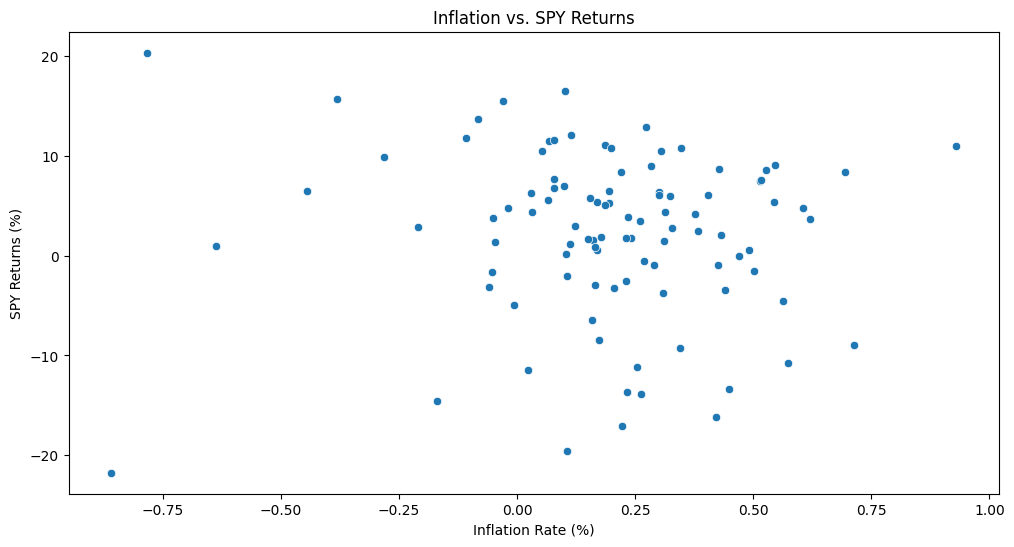

[*********************100%***********************]  1 of 1 completed


Correlation between inflation and XLK returns: -0.06643443011151194


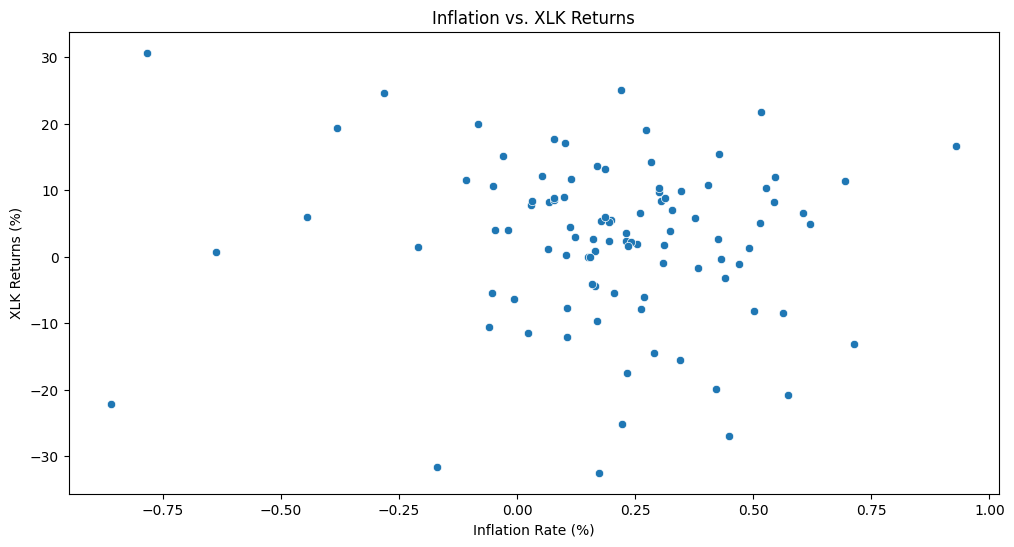

[*********************100%***********************]  1 of 1 completed


Correlation between inflation and XLV returns: -0.013689866458438225


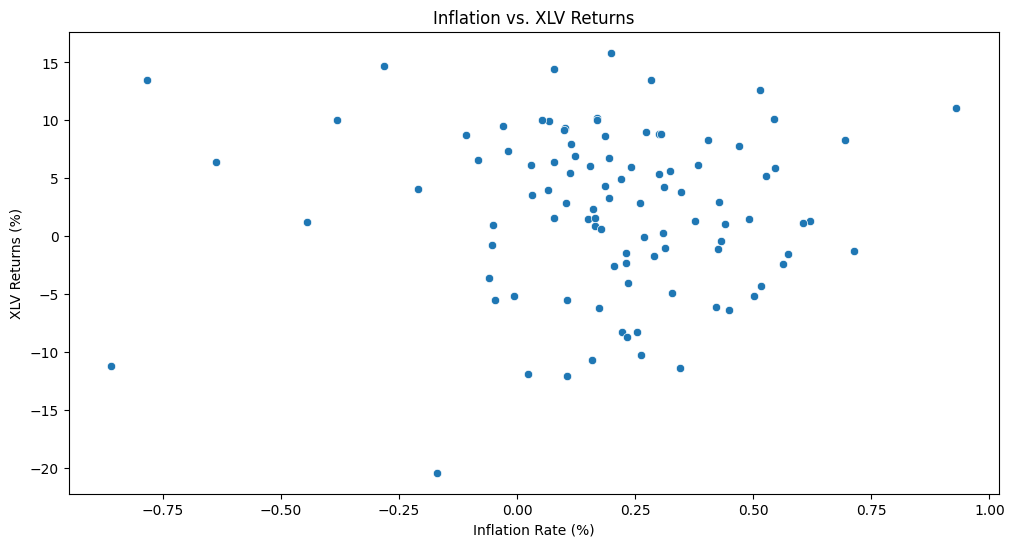

[*********************100%***********************]  1 of 1 completed


Correlation between inflation and XLF returns: 0.00690457014577485


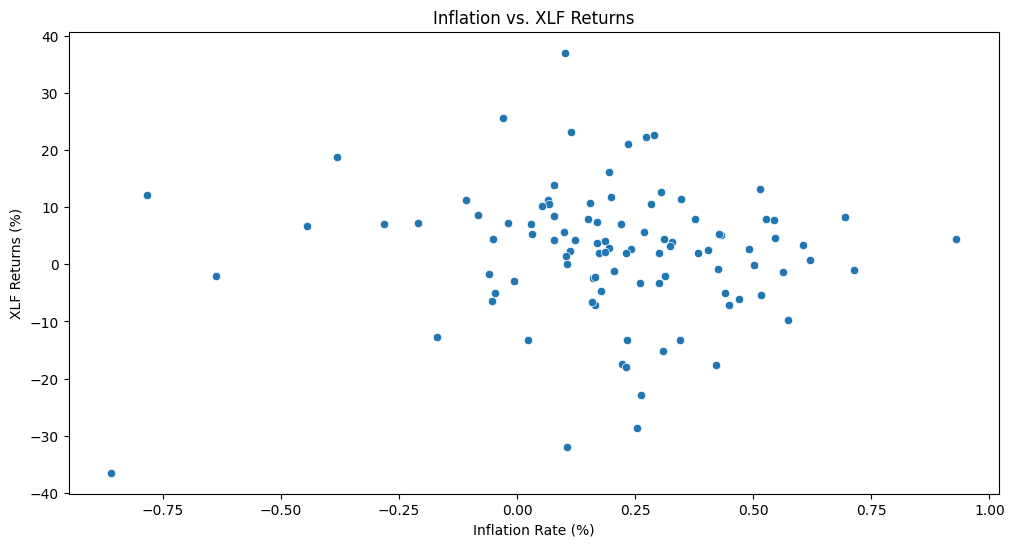

[*********************100%***********************]  1 of 1 completed


Correlation between inflation and XLY returns: -0.11710473903361729


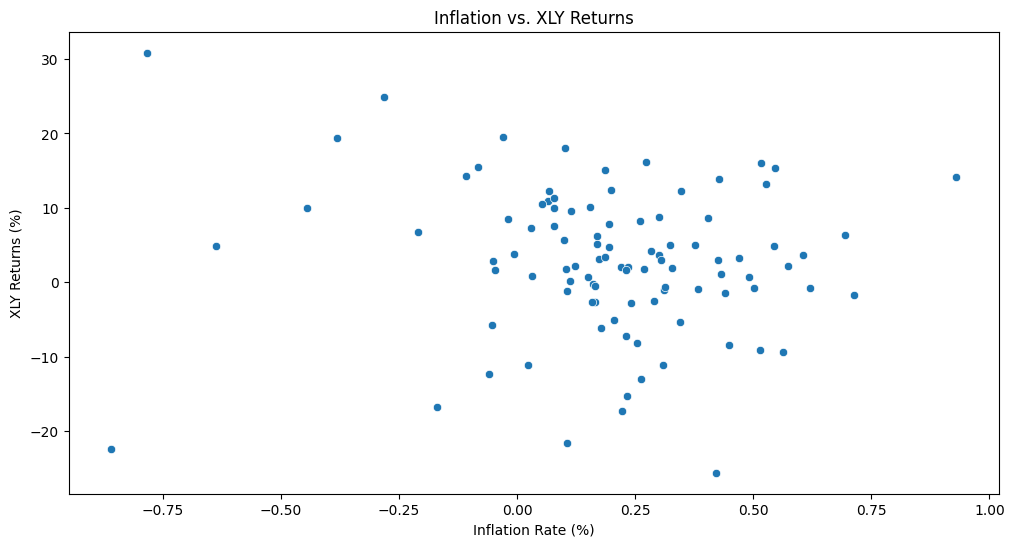

[*********************100%***********************]  1 of 1 completed


Correlation between inflation and XLP returns: -0.021020279548294787


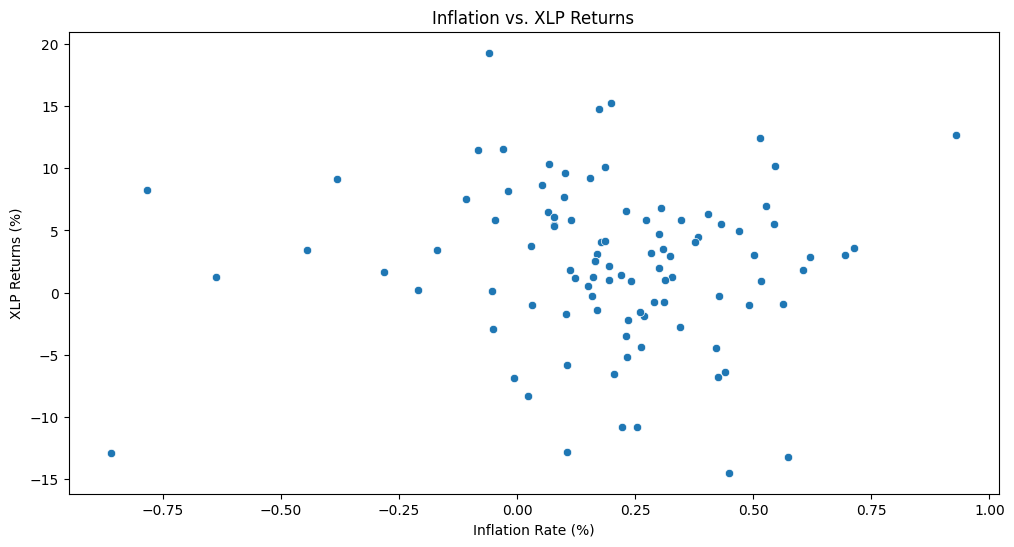

[*********************100%***********************]  1 of 1 completed


Correlation between inflation and XLE returns: -0.023995814342848965


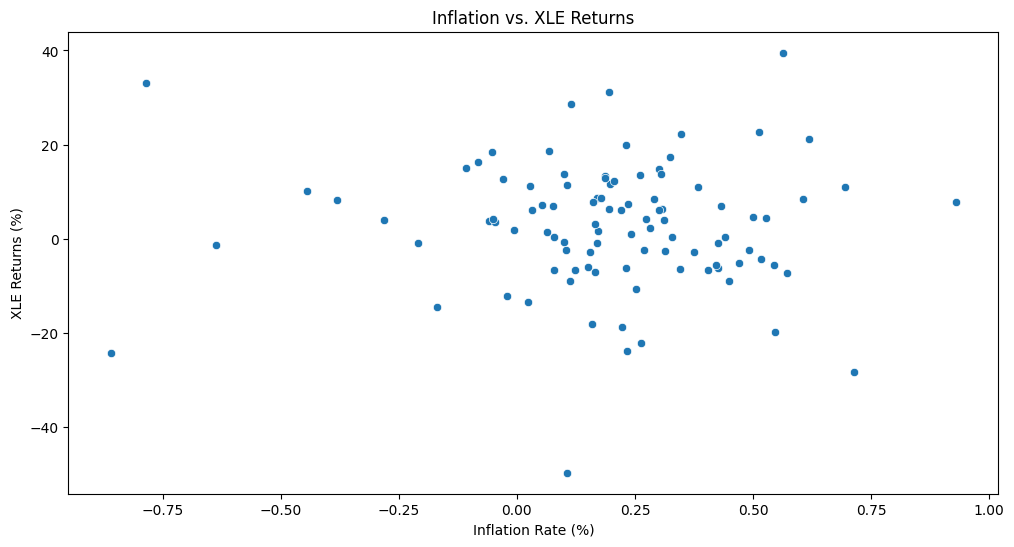

[*********************100%***********************]  1 of 1 completed


Correlation between inflation and XLI returns: -0.07269286638076626


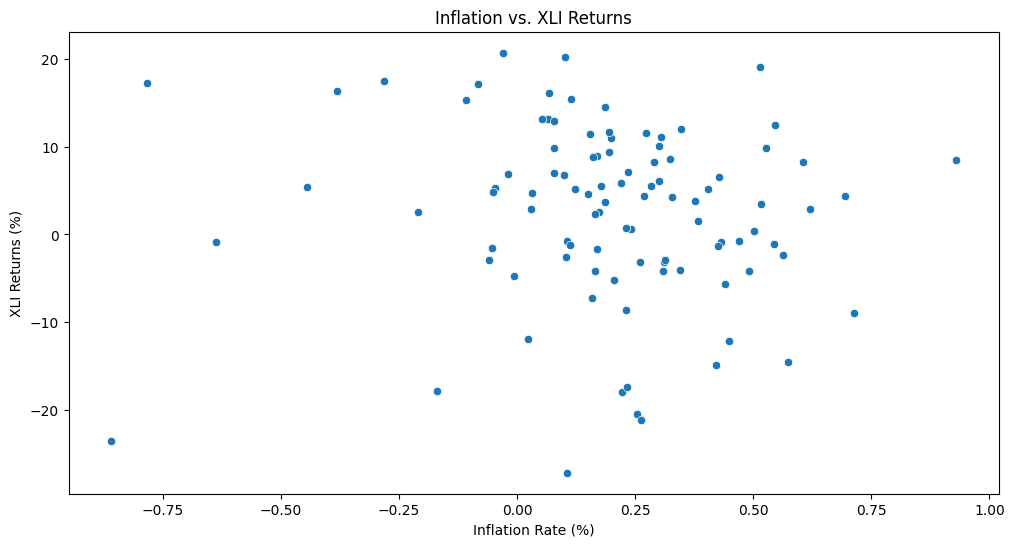

[*********************100%***********************]  1 of 1 completed


Correlation between inflation and XLB returns: -0.03777531899133036


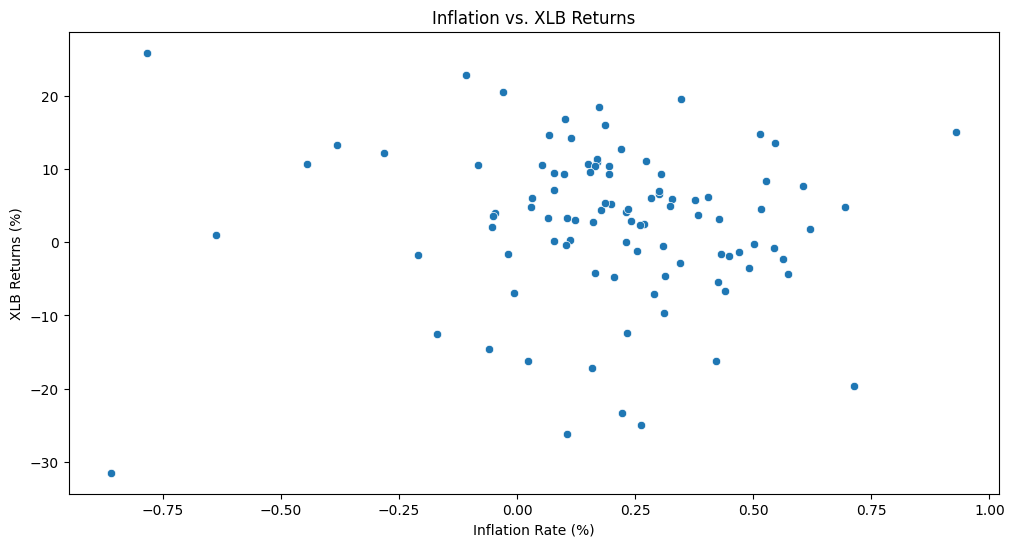

[*********************100%***********************]  1 of 1 completed


Correlation between inflation and XLU returns: 0.01525839769004827


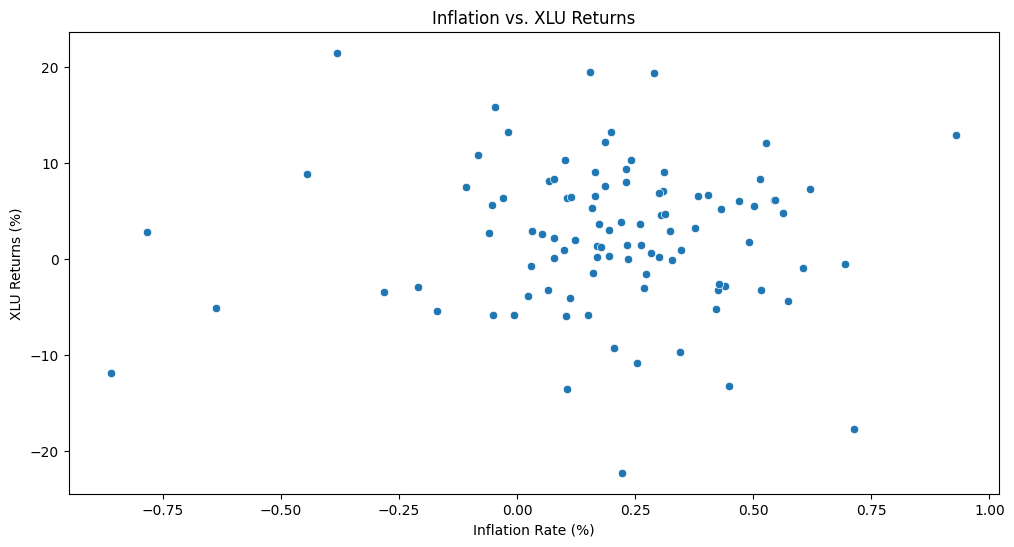

[*********************100%***********************]  1 of 1 completed


Correlation between inflation and XLRE returns: -0.05518802309088326


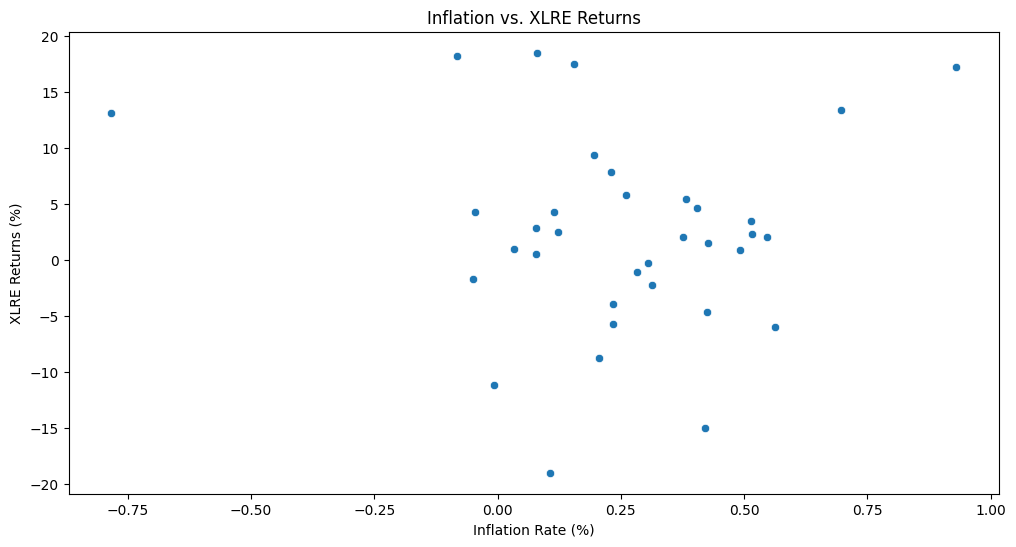

In [ ]:
# Calculate Inflation rate
inflation_data['inflation_rate'] = inflation_data['value'].pct_change() * 100
inflation_returns = inflation_data[['year_month', 'inflation_rate']].dropna(subset=['inflation_rate'])

# Analyze each ETF for Hypothesis 2
for etf in etfs:
    # Assuming etf_data is already fetched in the previous loop or can be fetched again
    etf_data = yf.download(etf, start='2000-01-01', end='2024-10-25', interval='3mo')
    etf_data.reset_index(inplace=True)
    etf_data.columns = etf_data.columns.get_level_values(0)
    etf_data['year_month'] = etf_data['Date'].dt.strftime('%Y-%m')
    etf_data['returns'] = etf_data['Adj Close'].pct_change() * 100
    etf_data.dropna(subset=['returns'], inplace=True)

    # Merge for hypothesis 2 analysis
    combined_data_inflation = pd.merge(inflation_returns, etf_data, on='year_month', how='inner')
    if not combined_data_inflation.empty:
        inflation_correlation = combined_data_inflation['inflation_rate'].corr(combined_data_inflation['returns'])
        print(f"Correlation between inflation and {etf} returns:", inflation_correlation)

        plt.figure(figsize=(12, 6))
        sns.scatterplot(data=combined_data_inflation, x='inflation_rate', y='returns')
        plt.title(f'Inflation vs. {etf} Returns')
        plt.xlabel('Inflation Rate (%)')
        plt.ylabel(f'{etf} Returns (%)')
        plt.show()
    else:
        print(f"No overlapping data for inflation and {etf} returns.")

# HYPOTHESIS 3: Interest Rates and ETF Movements

[*********************100%***********************]  1 of 1 completed


<Figure size 1200x600 with 0 Axes>

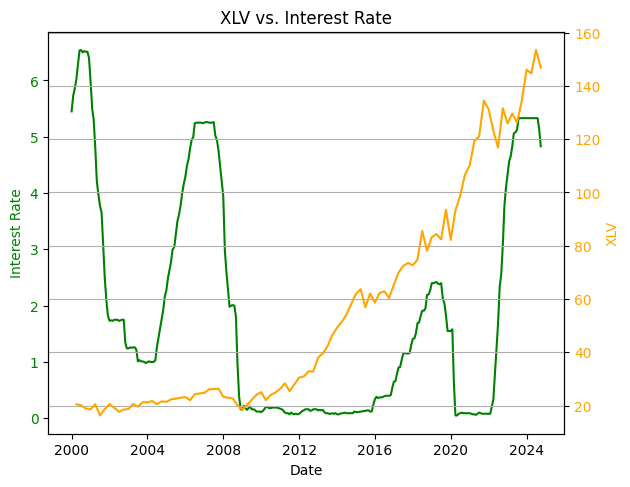

[*********************100%***********************]  1 of 1 completed


<Figure size 1200x600 with 0 Axes>

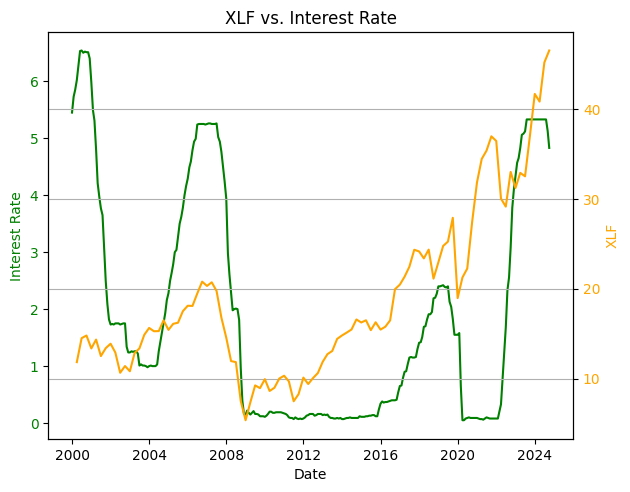

[*********************100%***********************]  1 of 1 completed


<Figure size 1200x600 with 0 Axes>

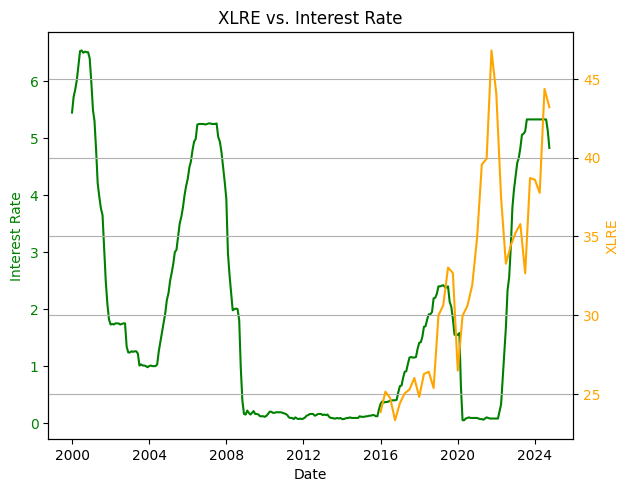

In [ ]:
etfs=["XLV","XLF","XLRE"]
for etf in etfs:
    etf_data = yf.download(etf, start='2000-01-01', end='2024-10-25', interval='3mo')
    etf_data.reset_index(inplace=True)
    etf_data.columns = etf_data.columns.get_level_values(0)
    etf_data['year_month'] = etf_data['Date'].dt.strftime('%Y-%m')
    etf_data['returns'] = etf_data['Adj Close'].pct_change() * 100
    etf_data.dropna(subset=['returns'], inplace=True)

    plt.figure(figsize=(12, 6))
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Interest Rate', color='green')
    ax1.plot(interest_rate_data['date'], interest_rate_data['value'], color='green', label='interest_rate')
    ax1.tick_params(axis='y', labelcolor='green')

    ax2 = ax1.twinx()
    ax2.set_ylabel(f'{etf}', color='orange')
    ax2.plot(etf_data['Date'], etf_data['Adj Close'], color='orange', label='S&P 500')
    ax2.tick_params(axis='y', labelcolor='orange')

    fig.tight_layout()
    plt.title(f'{etf} vs. Interest Rate')
    plt.grid()

    plt.show()

#XLE the most sensitive to interest rate. Energie etf
#XLP and XLU the msot insesitive. Makes sense since they are basic goods and public services etfs


[*********************100%***********************]  1 of 1 completed


Correlation between interest rate and SPY returns: -0.17382716564215495


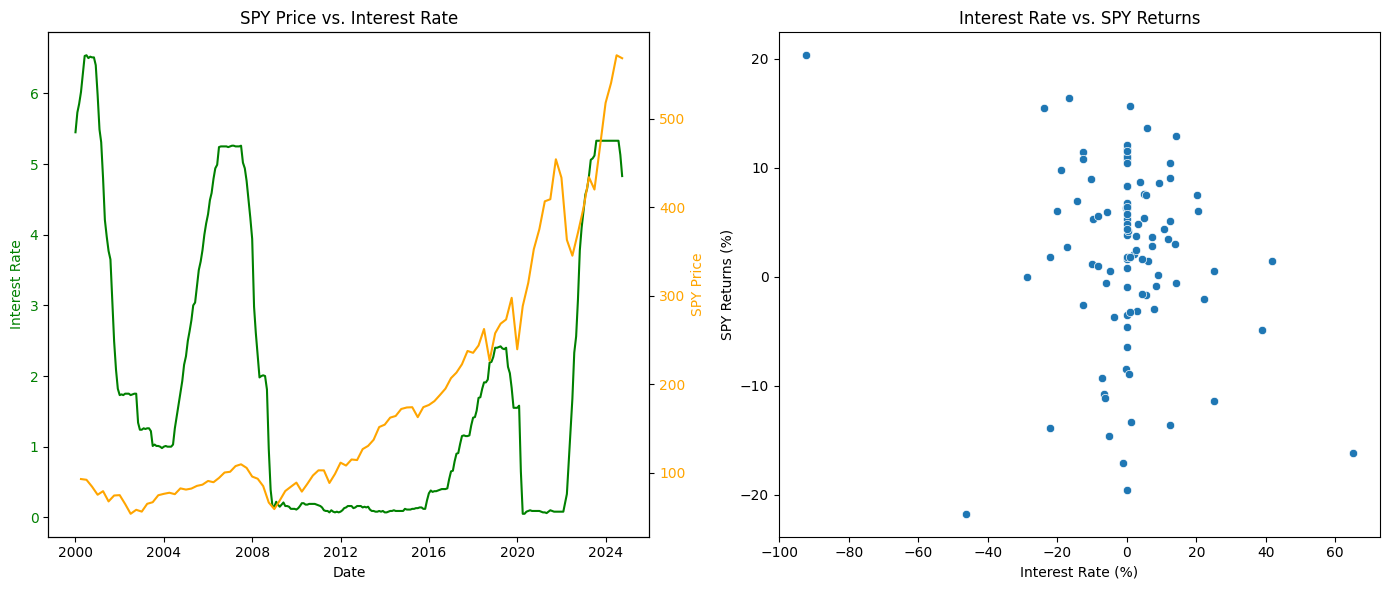

[*********************100%***********************]  1 of 1 completed


Correlation between interest rate and XLK returns: -0.19242881736653714


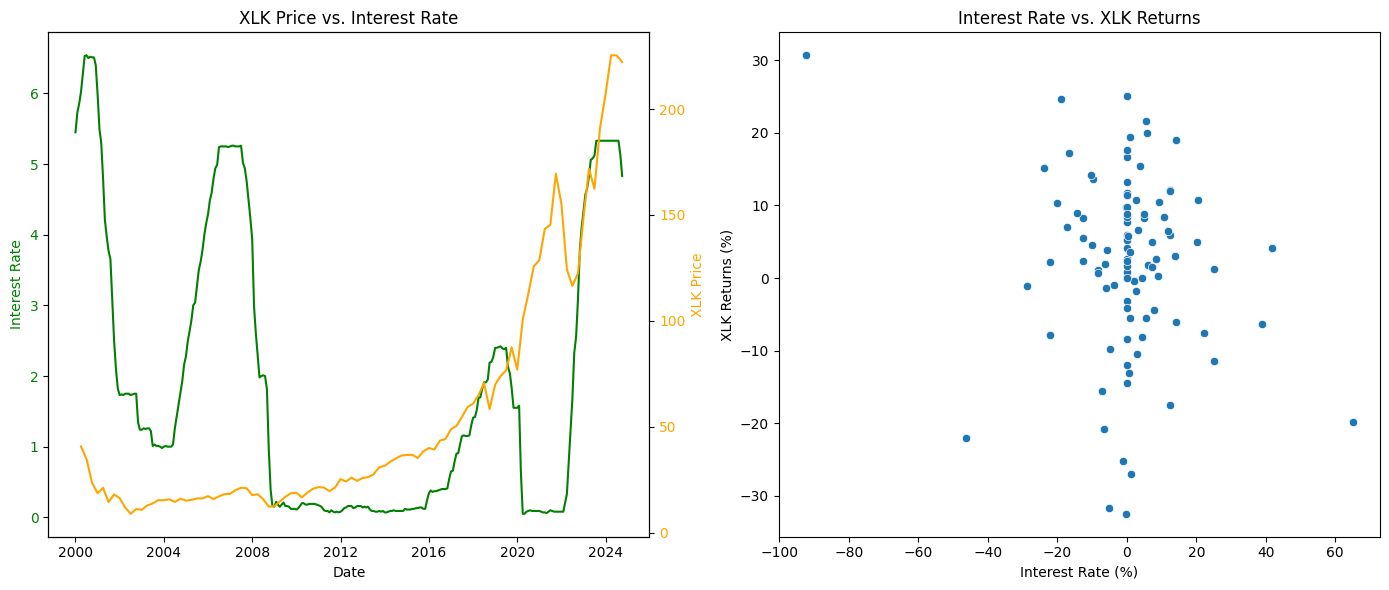

[*********************100%***********************]  1 of 1 completed


Correlation between interest rate and XLV returns: -0.20260214920223346


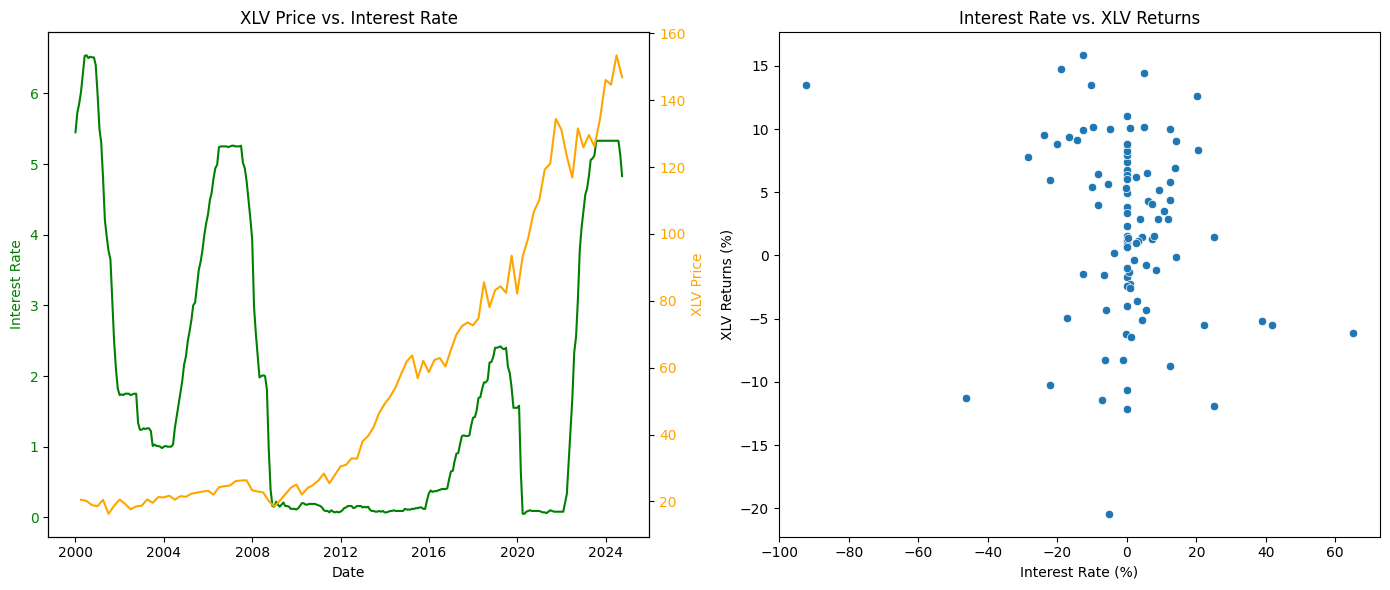

[*********************100%***********************]  1 of 1 completed


Correlation between interest rate and XLF returns: -0.044646990531712547


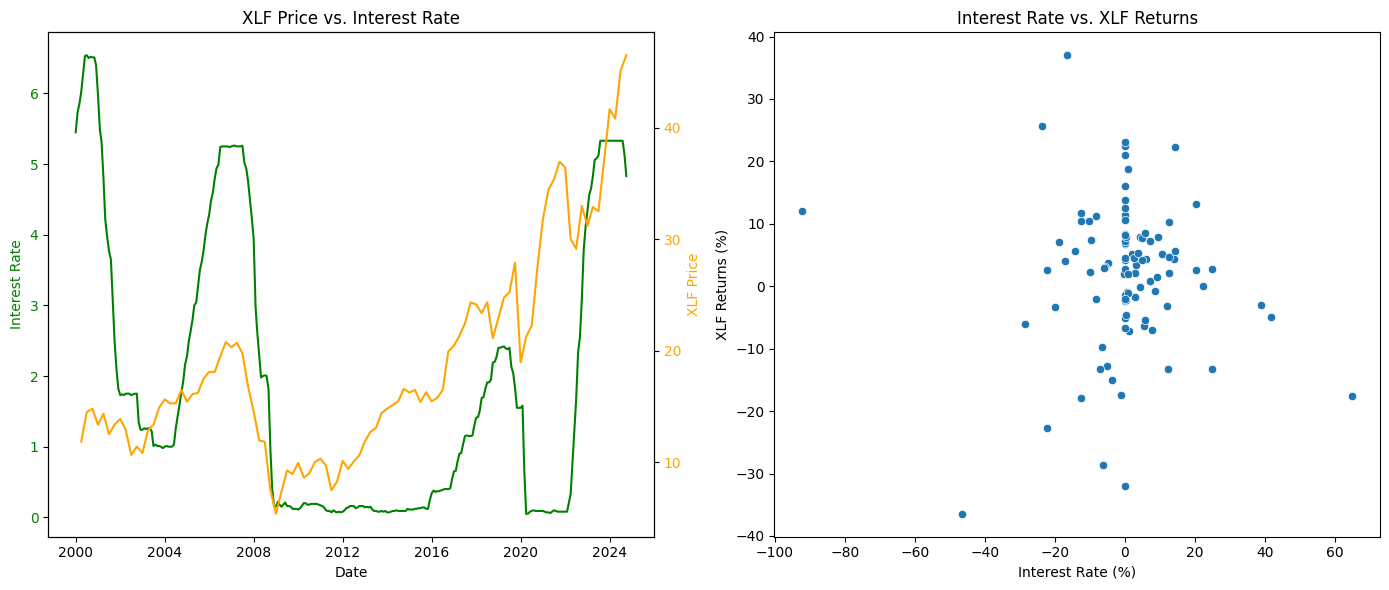

[*********************100%***********************]  1 of 1 completed


Correlation between interest rate and XLY returns: -0.25613896207945963


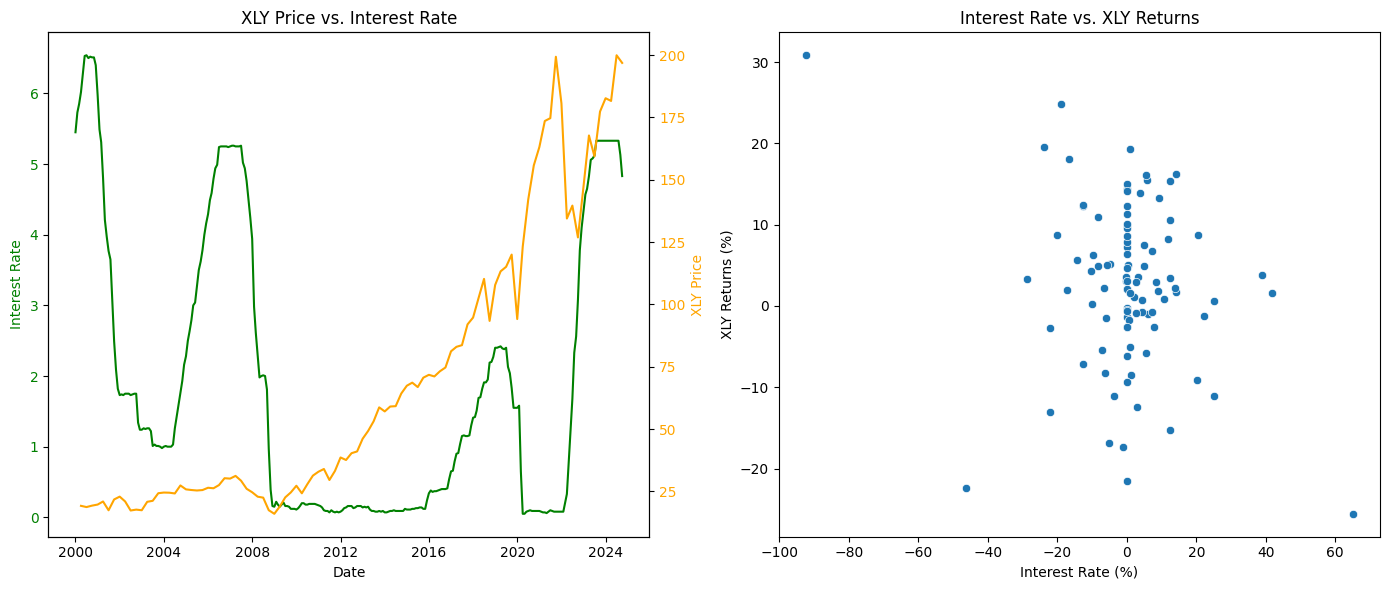

[*********************100%***********************]  1 of 1 completed


Correlation between interest rate and XLP returns: -0.09604300195744213


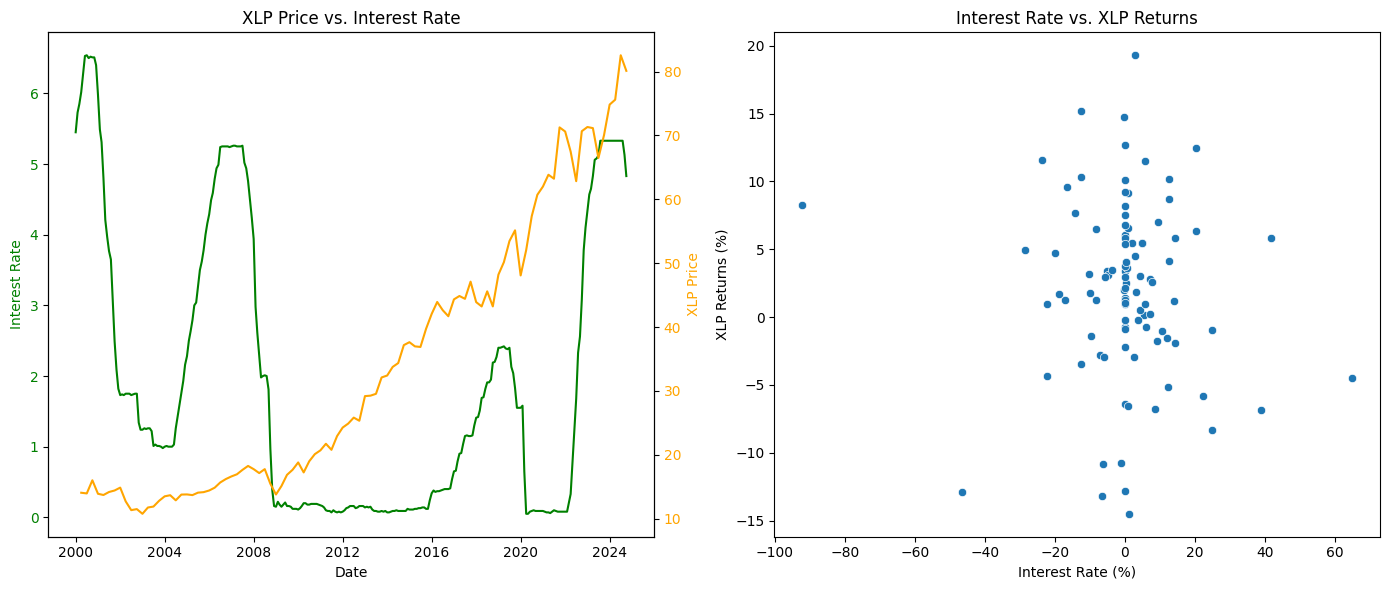

[*********************100%***********************]  1 of 1 completed


Correlation between interest rate and XLE returns: -0.10789160638393801


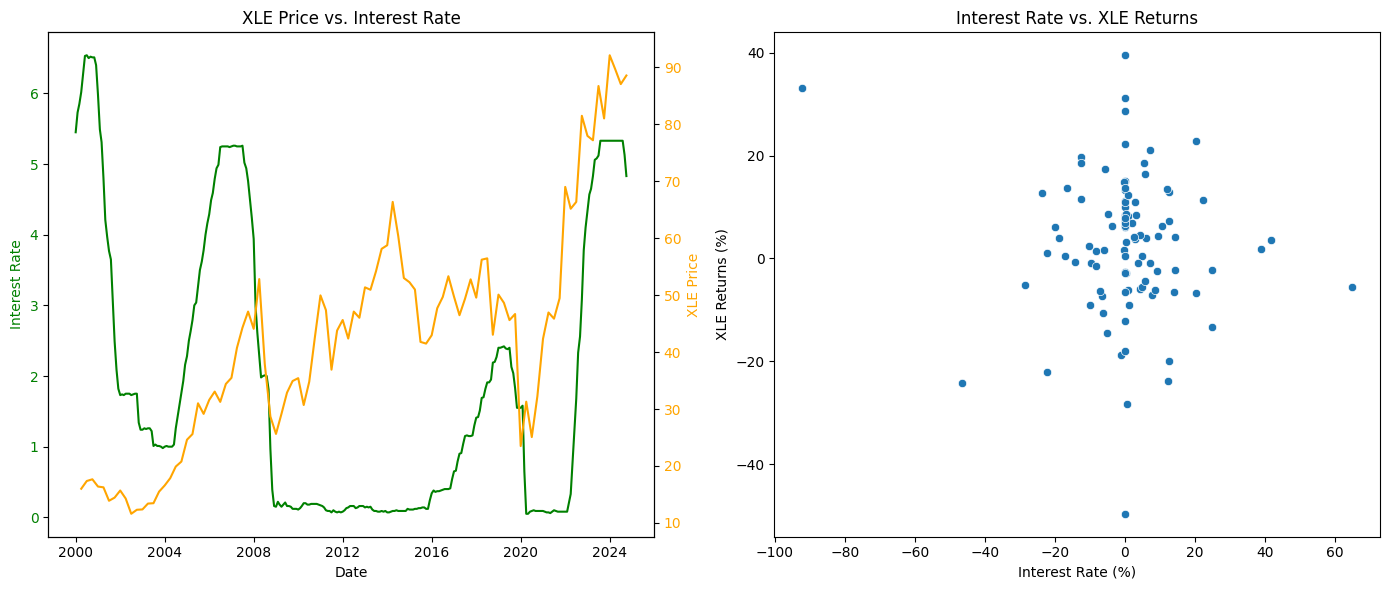

[*********************100%***********************]  1 of 1 completed


Correlation between interest rate and XLI returns: -0.10860658863094724


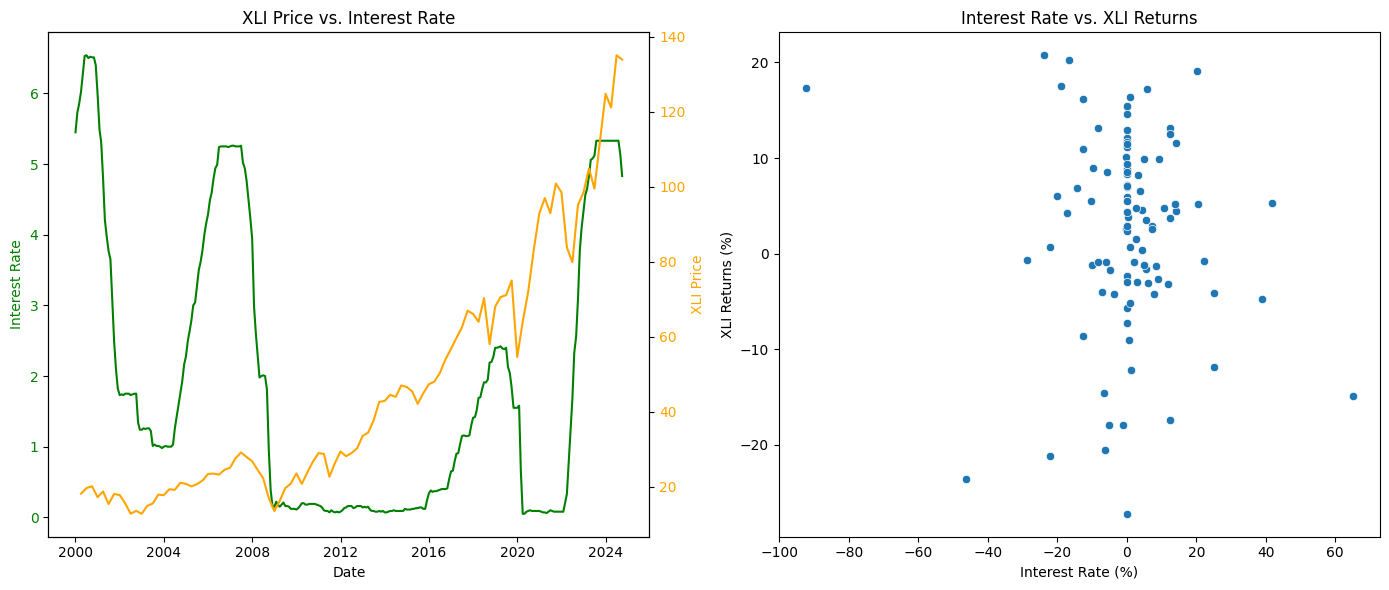

[*********************100%***********************]  1 of 1 completed


Correlation between interest rate and XLB returns: -0.16056918093418301


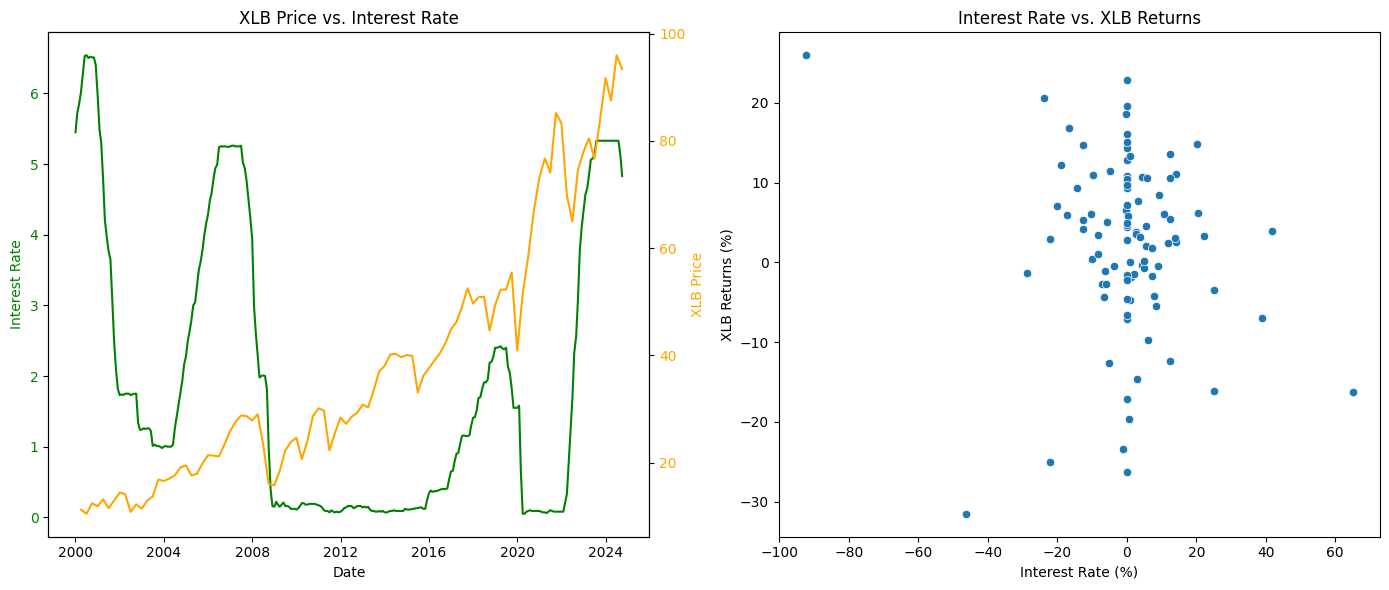

[*********************100%***********************]  1 of 1 completed


Correlation between interest rate and XLU returns: 0.02528257791957923


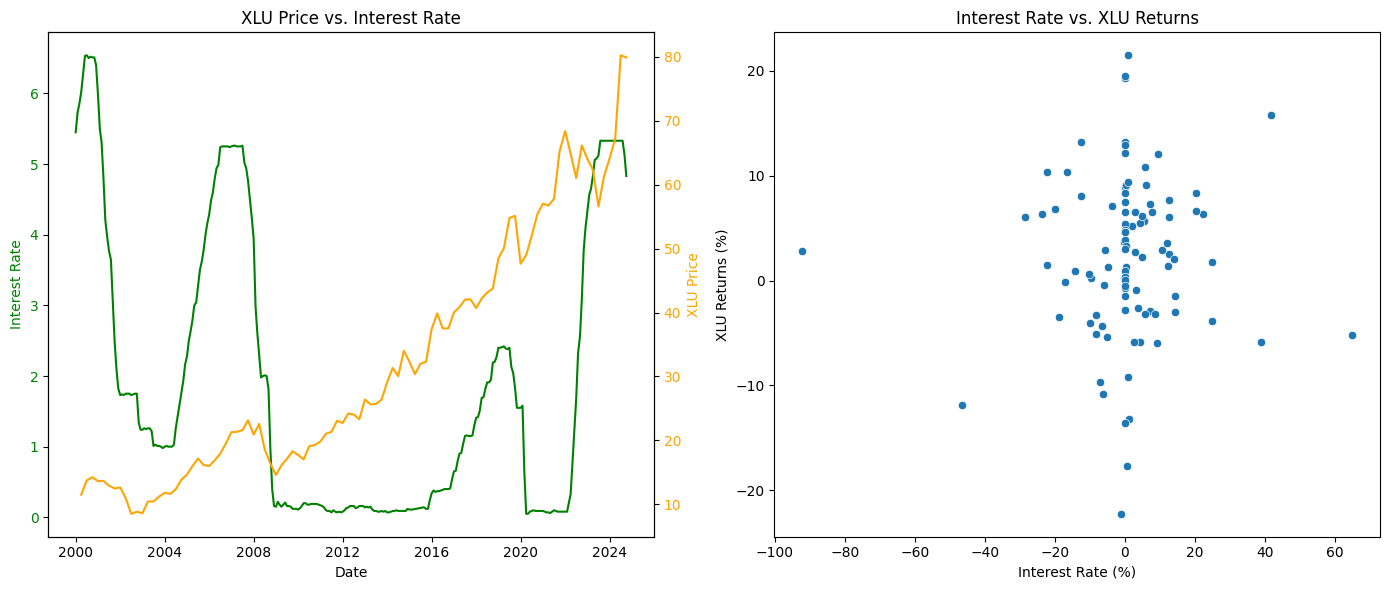

[*********************100%***********************]  1 of 1 completed


Correlation between interest rate and XLRE returns: -0.36038595066921847


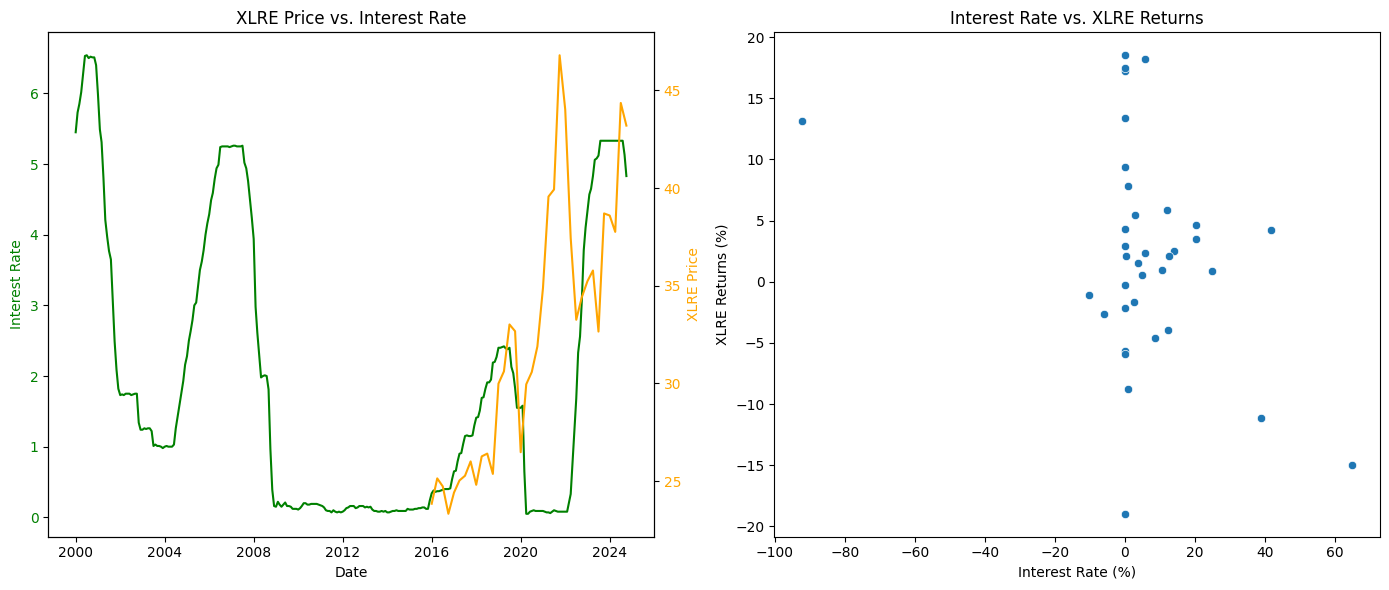

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# Define the ETFs and loop through them
etfs = ["SPY", "XLK", "XLV", "XLF", "XLY", "XLP", "XLE", "XLI", "XLB", "XLU", "XLRE"]
for etf in etfs:
    # Download ETF data
    etf_data = yf.download(etf, start='2000-01-01', end='2024-10-25', interval='3mo')
    etf_data.reset_index(inplace=True)
    etf_data.columns = etf_data.columns.get_level_values(0)
    etf_data['year_month'] = etf_data['Date'].dt.strftime('%Y-%m')
    etf_data['returns'] = etf_data['Adj Close'].pct_change() * 100
    etf_data.dropna(subset=['returns'], inplace=True)

    # Calculate interest rate changes
    interest_rate_data['interest_rate'] = interest_rate_data['value'].pct_change() * 100
    interest_rate_returns = interest_rate_data[['year_month', 'interest_rate']].dropna(subset=['interest_rate'])
    combined_data_interest_rate = pd.merge(interest_rate_returns, etf_data, on='year_month', how='inner')

    if not combined_data_interest_rate.empty:
        # Calculate correlation
        interest_rate_correlation = combined_data_interest_rate['interest_rate'].corr(combined_data_interest_rate['returns'])
        print(f"Correlation between interest rate and {etf} returns:", interest_rate_correlation)

        # Create a figure with 1 row and 2 columns for side-by-side plots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        # Time Series Plot (Interest Rate and ETF Price)
        ax1.set_title(f'{etf} Price vs. Interest Rate')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Interest Rate', color='green')
        ax1.plot(interest_rate_data['date'], interest_rate_data['value'], color='green', label='Interest Rate')
        ax1.tick_params(axis='y', labelcolor='green')
        ax1_2 = ax1.twinx()
        ax1_2.set_ylabel(f'{etf} Price', color='orange')
        ax1_2.plot(etf_data['Date'], etf_data['Adj Close'], color='orange', label=f'{etf} Price')
        ax1_2.tick_params(axis='y', labelcolor='orange')

        # Scatter Plot (Interest Rate vs. ETF Returns)
        sns.scatterplot(data=combined_data_interest_rate, x='interest_rate', y='returns', ax=ax2)
        ax2.set_title(f'Interest Rate vs. {etf} Returns')
        ax2.set_xlabel('Interest Rate (%)')
        ax2.set_ylabel(f'{etf} Returns (%)')

        plt.tight_layout()
        plt.show()
    else:
        print(f"No overlapping data for Interest Rate and {etf} returns.")


# HYPOTHESIS 4: Analyze whether changes in unemployment precede market movements

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


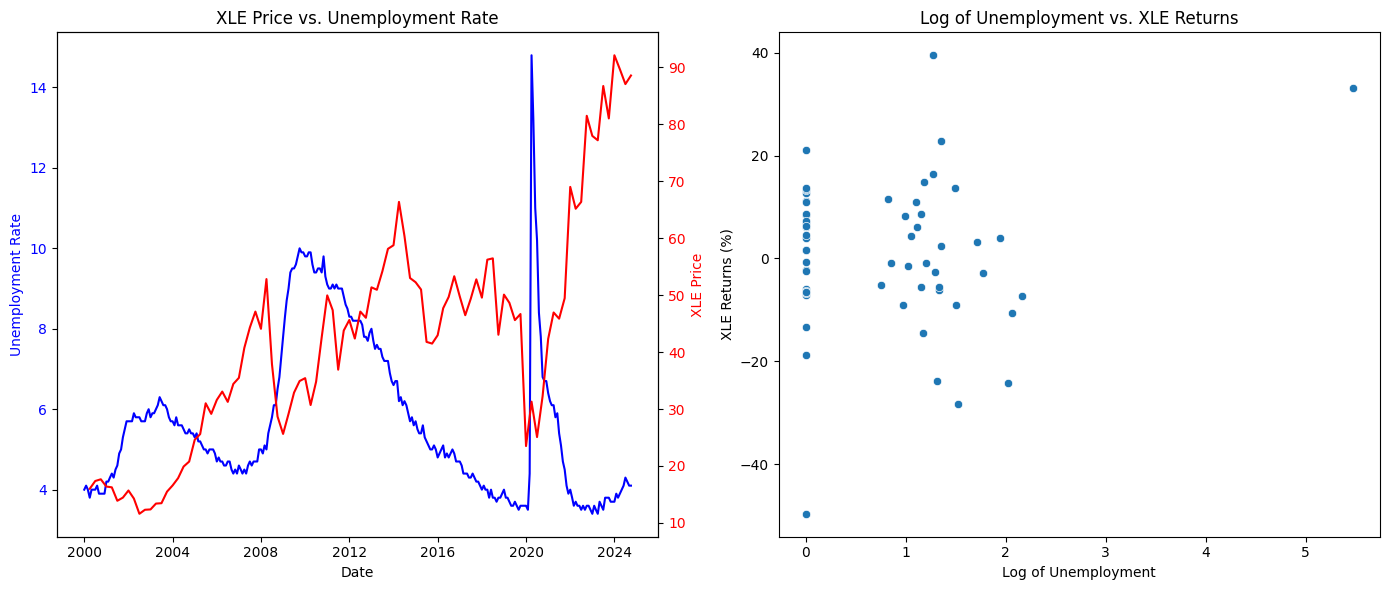

[*********************100%***********************]  1 of 1 completed

Correlation between log-unemployment and XLE returns: 0.11896083891488941



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


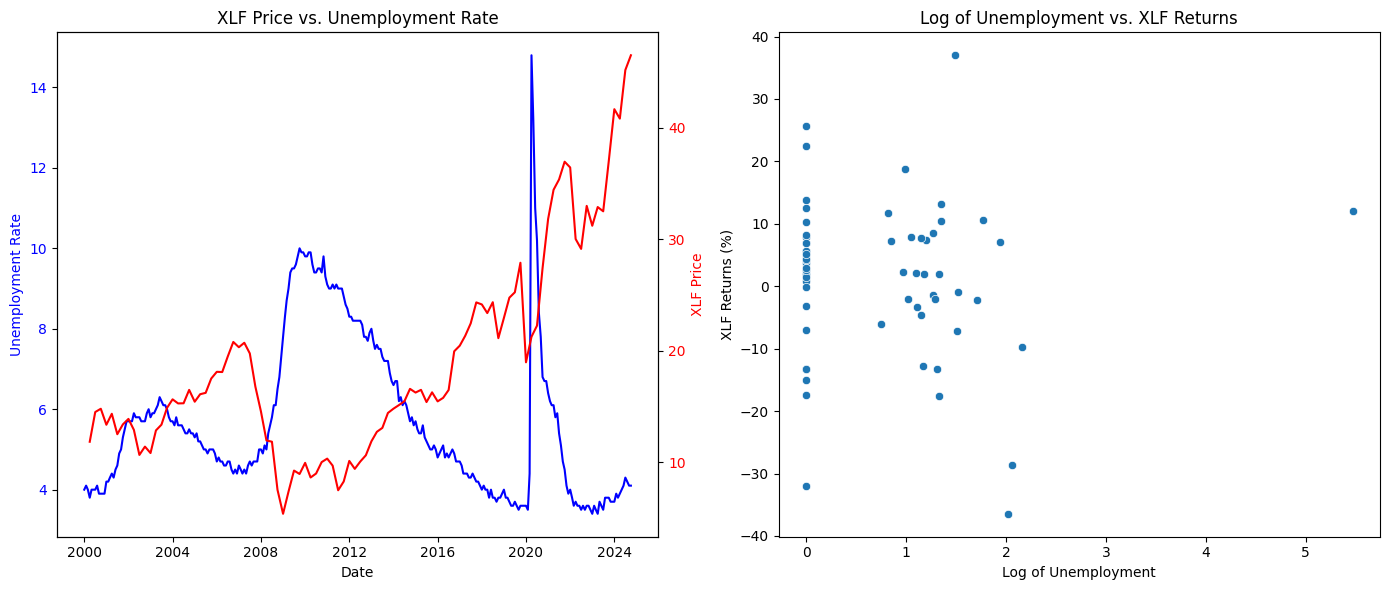

[*********************100%***********************]  1 of 1 completed

Correlation between log-unemployment and XLF returns: -0.055509629975098715



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


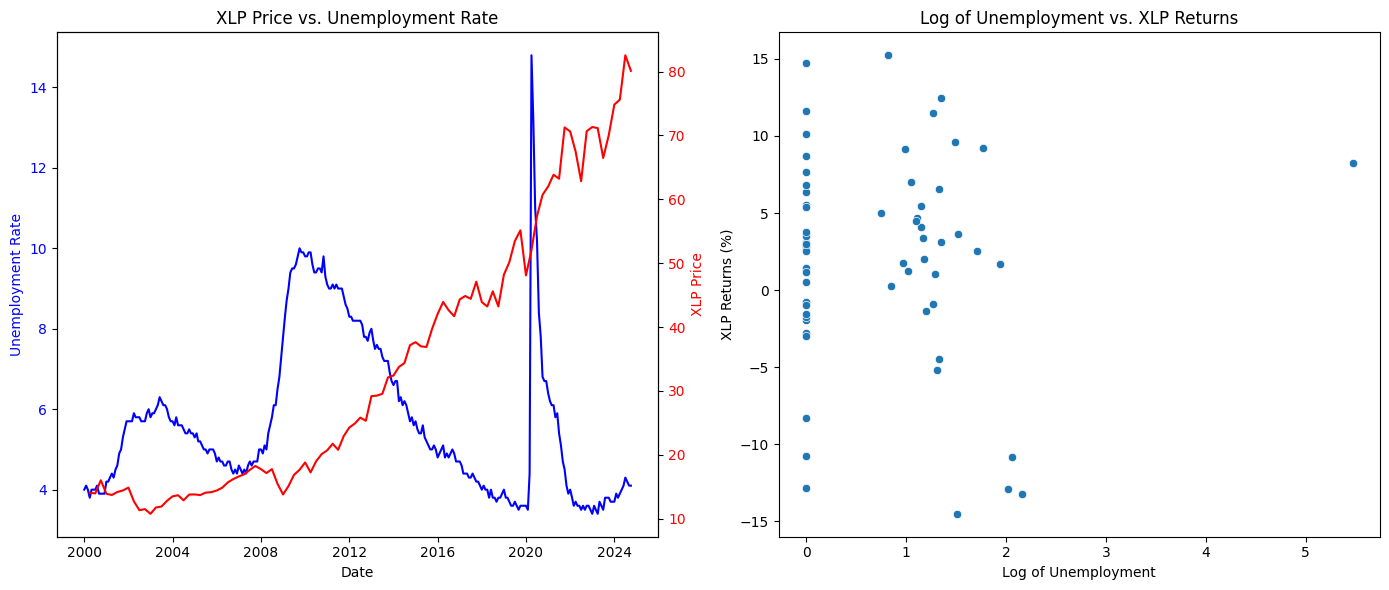

[*********************100%***********************]  1 of 1 completed

Correlation between log-unemployment and XLP returns: -0.029998492929290486



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


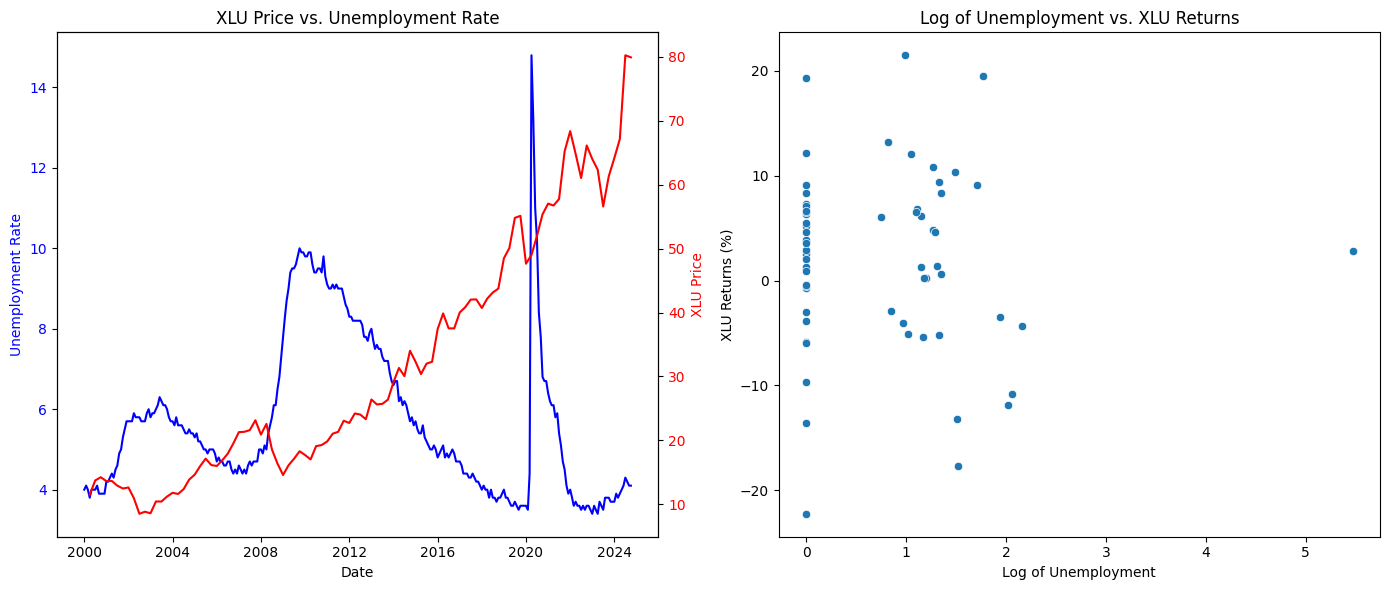

Correlation between log-unemployment and XLU returns: -0.04470885814454356


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

etfs = ["XLE", "XLF", "XLP", "XLU"]
for etf in etfs:
    etf_data = yf.download(etf, start='2000-01-01', end='2024-10-25', interval='3mo')
    etf_data.reset_index(inplace=True)
    etf_data.columns = etf_data.columns.get_level_values(0)
    etf_data['year_month'] = etf_data['Date'].dt.strftime('%Y-%m')
    etf_data['returns'] = etf_data['Adj Close'].pct_change() * 100
    etf_data.dropna(subset=['returns'], inplace=True)

    # Unemployment data preparation
    unemployment_data['unemployment_rate'] = unemployment_data['value'].pct_change() * 100
    unemployment_data['log_unemployment_rate'] = np.log1p(unemployment_data['unemployment_rate'])
    unemployment_returns = unemployment_data[['year_month', 'log_unemployment_rate']].dropna(subset=['log_unemployment_rate'])
    combined_data_unemployment = pd.merge(unemployment_returns, etf_data, on='year_month', how='inner')

    if not combined_data_unemployment.empty:
        # Create subplots with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        # Plotting the time series on the first subplot
        ax1.set_title(f'{etf} Price vs. Unemployment Rate')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Unemployment Rate', color='blue')
        ax1.plot(unemployment_data['date'], unemployment_data['value'], color='blue', label='Unemployment Rate')
        ax1.tick_params(axis='y', labelcolor='blue')
        ax1_2 = ax1.twinx()
        ax1_2.set_ylabel(f'{etf} Price', color='red')
        ax1_2.plot(etf_data['Date'], etf_data['Adj Close'], color='red', label=f'{etf} Price')
        ax1_2.tick_params(axis='y', labelcolor='red')

        # Correlation scatter plot on the second subplot
        sns.scatterplot(data=combined_data_unemployment, x='log_unemployment_rate', y='returns', ax=ax2)
        ax2.set_title(f'Log of Unemployment vs. {etf} Returns')
        ax2.set_xlabel('Log of Unemployment')
        ax2.set_ylabel(f'{etf} Returns (%)')

        plt.tight_layout()
        plt.show()

        # Calculate and print correlation
        unemployment_correlation = combined_data_unemployment['log_unemployment_rate'].corr(combined_data_unemployment['returns'])
        print(f"Correlation between log-unemployment and {etf} returns:", unemployment_correlation)
    else:
        print(f"No overlapping data for Unemployment and {etf} returns.")


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


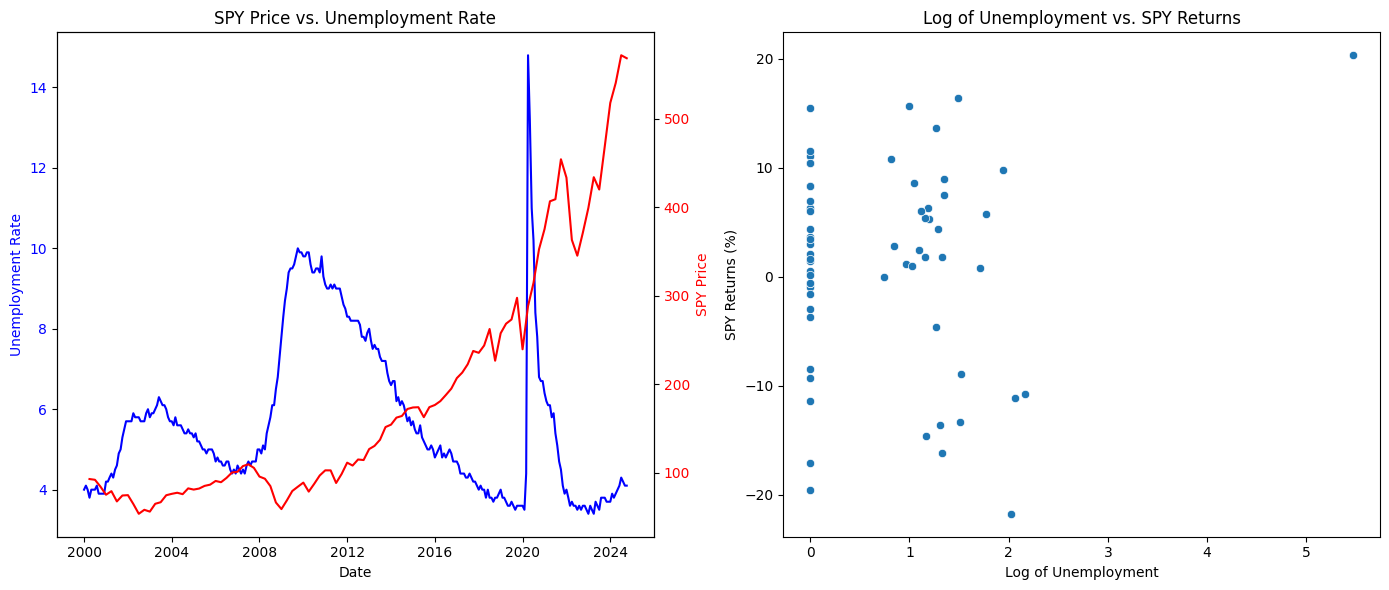

[*********************100%***********************]  1 of 1 completed

Correlation between log-unemployment and SPY returns: 0.08034867442144256



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


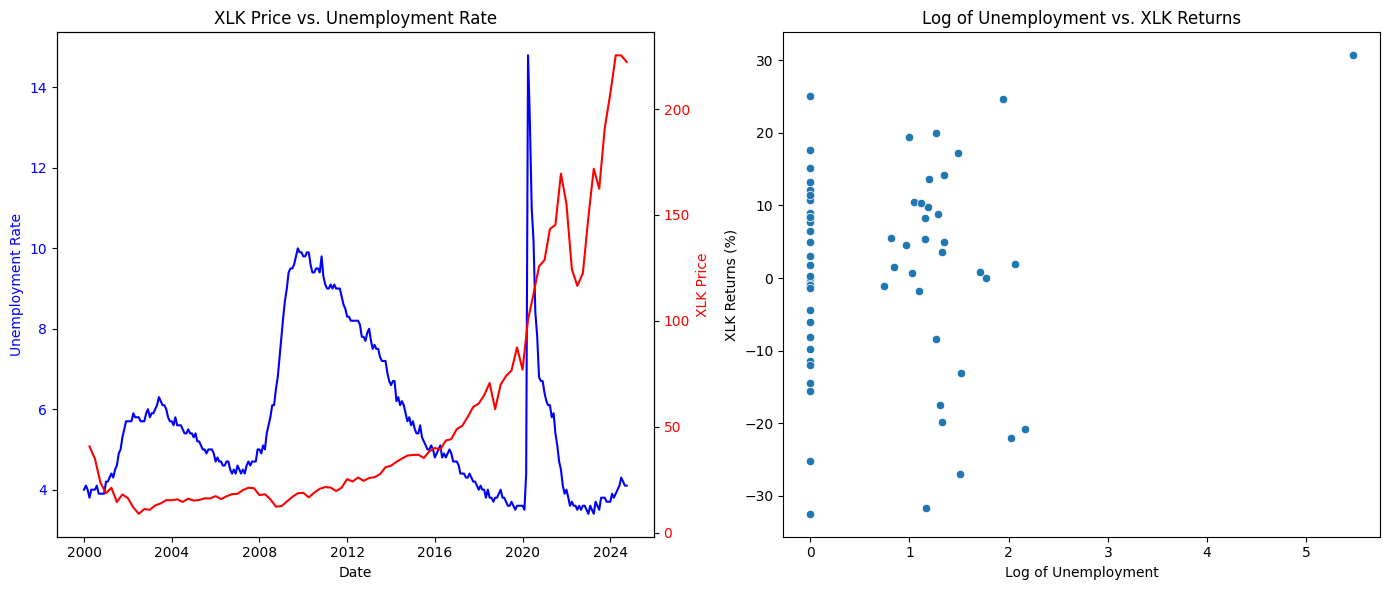

[*********************100%***********************]  1 of 1 completed

Correlation between log-unemployment and XLK returns: 0.08903531476198565



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


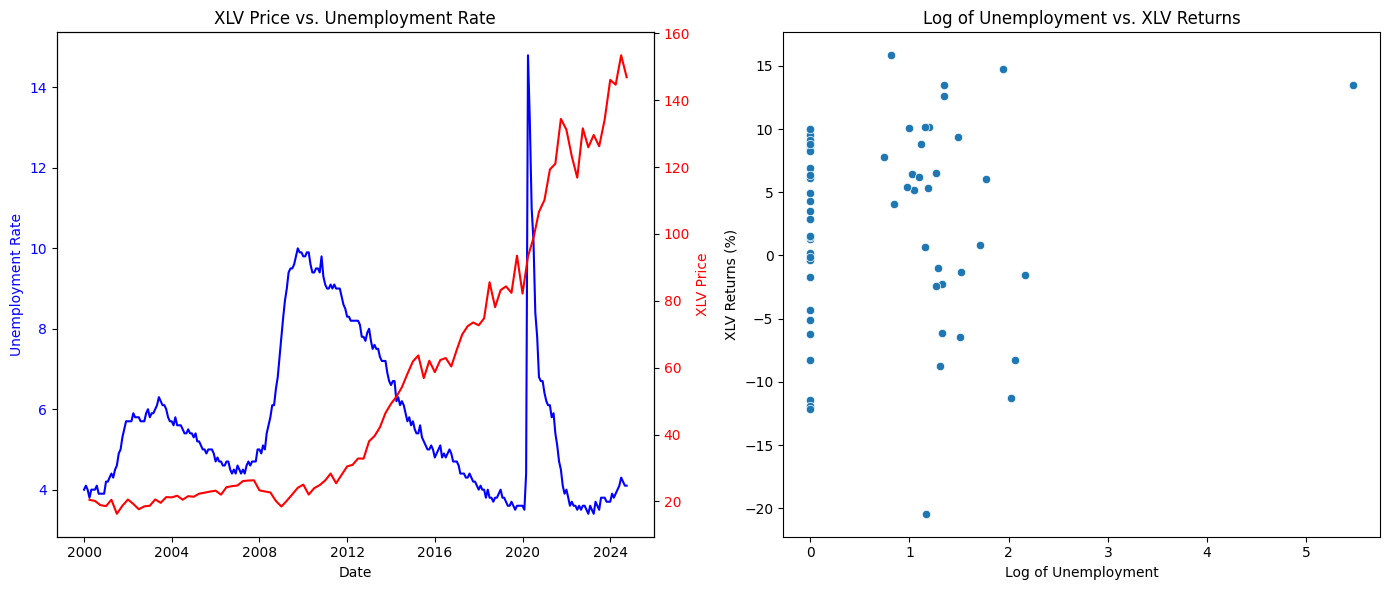

[*********************100%***********************]  1 of 1 completed

Correlation between log-unemployment and XLV returns: 0.101146675963241



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


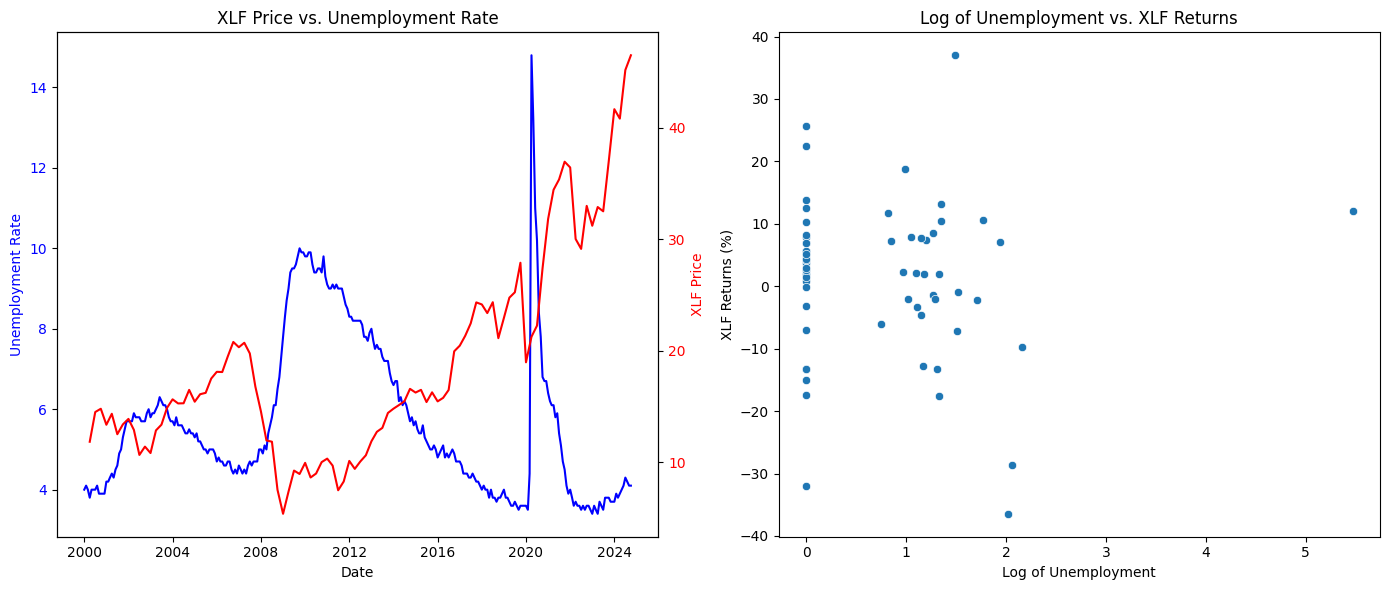

[*********************100%***********************]  1 of 1 completed

Correlation between log-unemployment and XLF returns: 0.040238170937103704



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


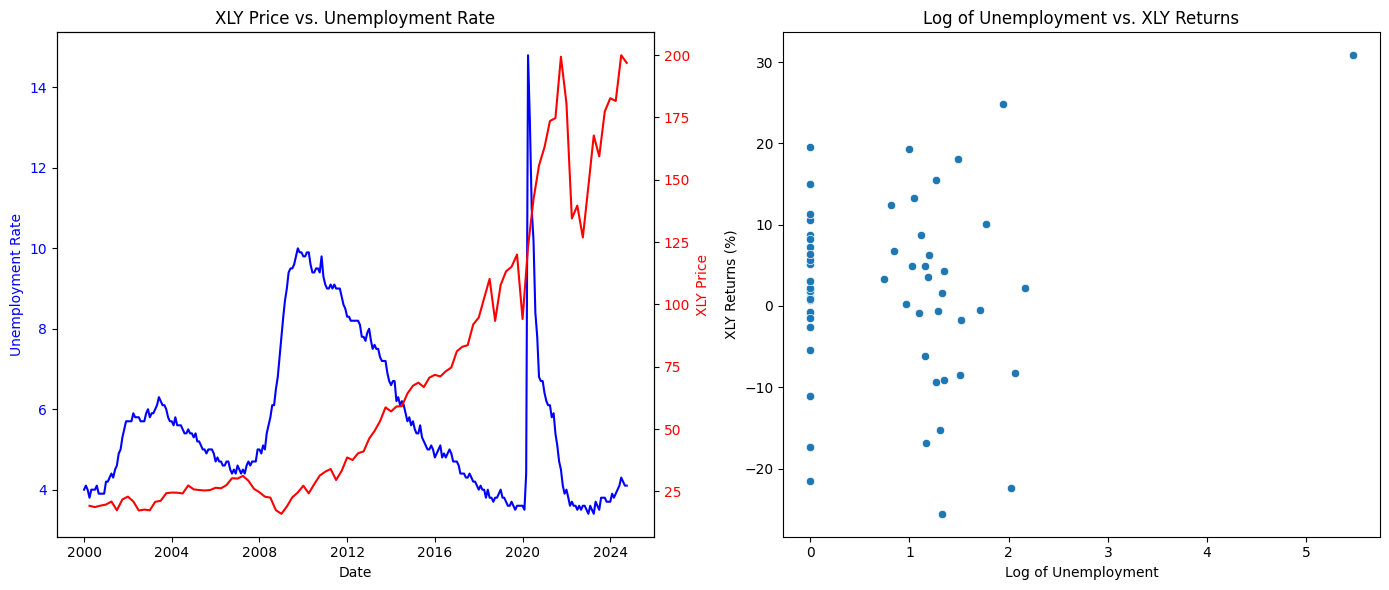

[*********************100%***********************]  1 of 1 completed

Correlation between log-unemployment and XLY returns: 0.09569826124397819



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


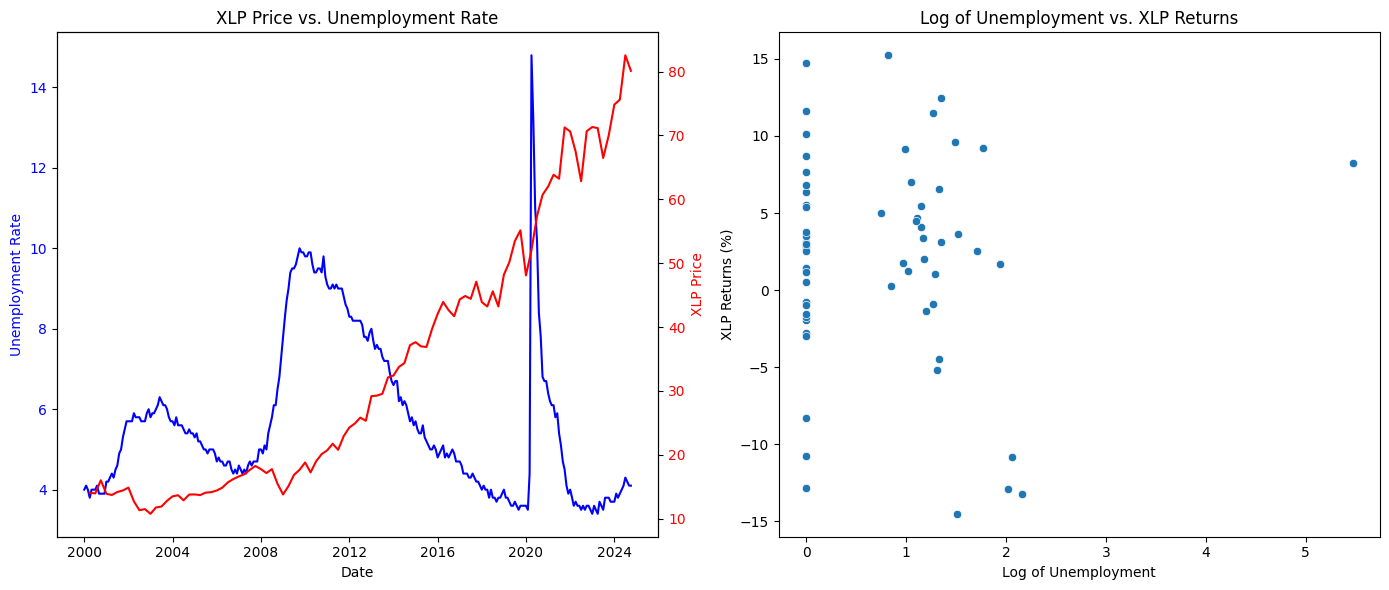

[*********************100%***********************]  1 of 1 completed

Correlation between log-unemployment and XLP returns: 0.09203776002123447



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


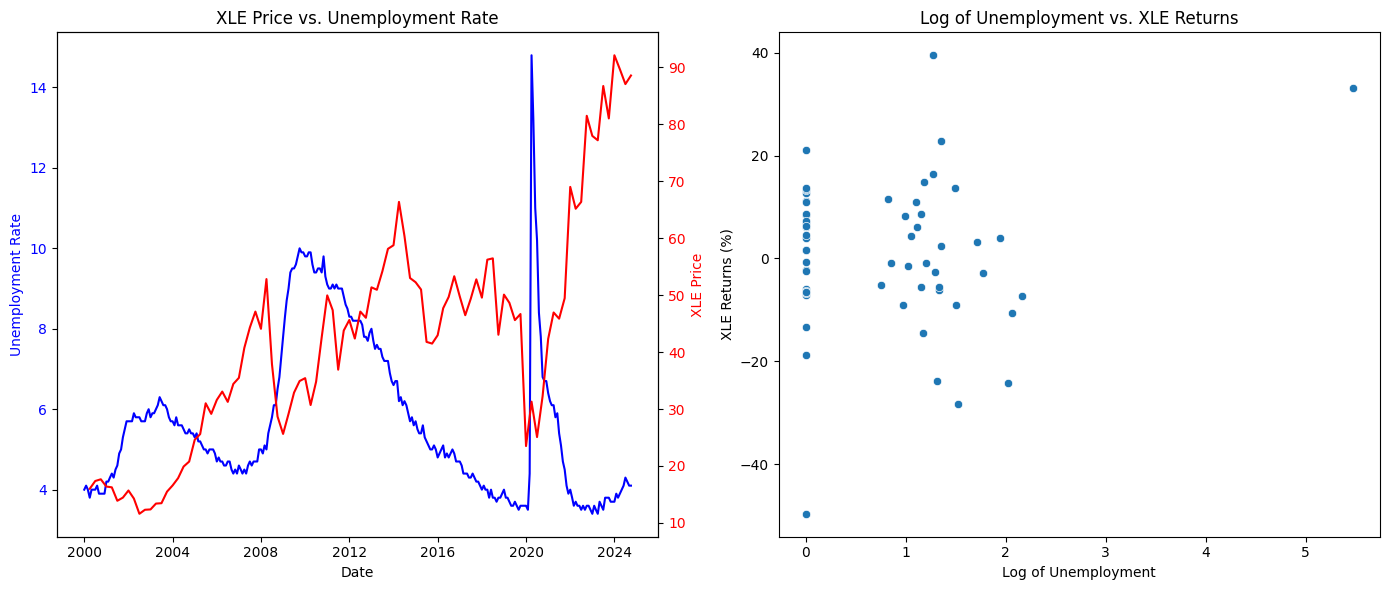

[*********************100%***********************]  1 of 1 completed

Correlation between log-unemployment and XLE returns: -0.057209840421230757



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


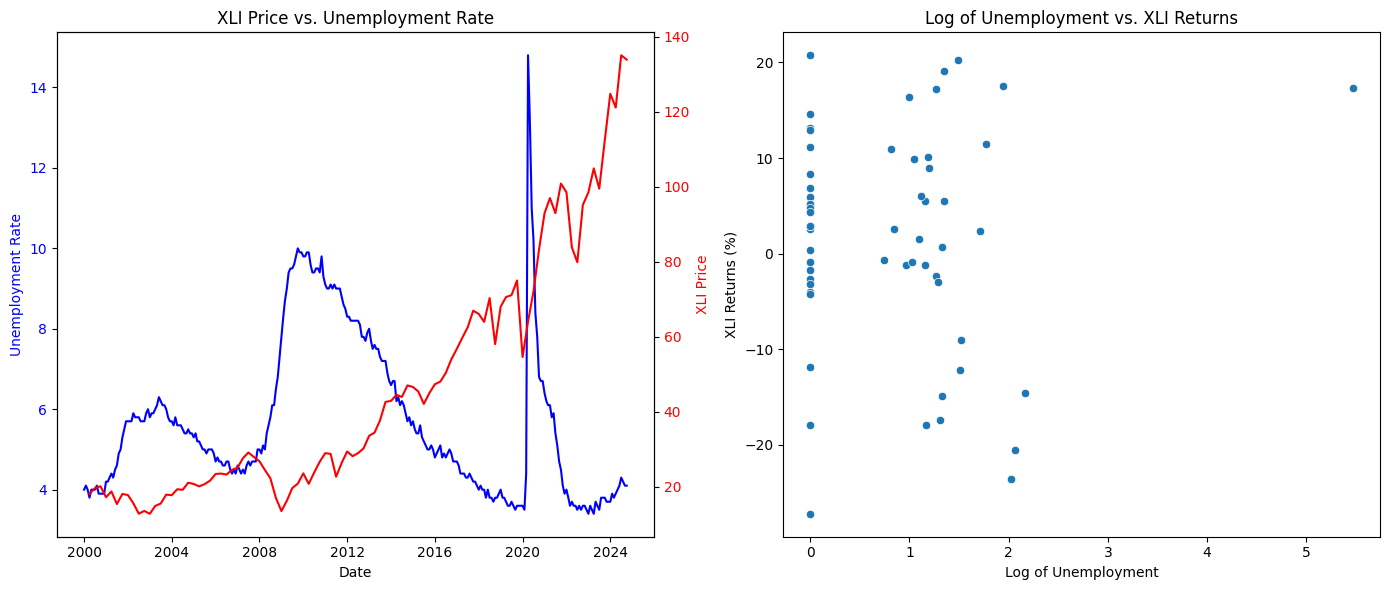

[*********************100%***********************]  1 of 1 completed

Correlation between log-unemployment and XLI returns: 0.052742496071203265



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


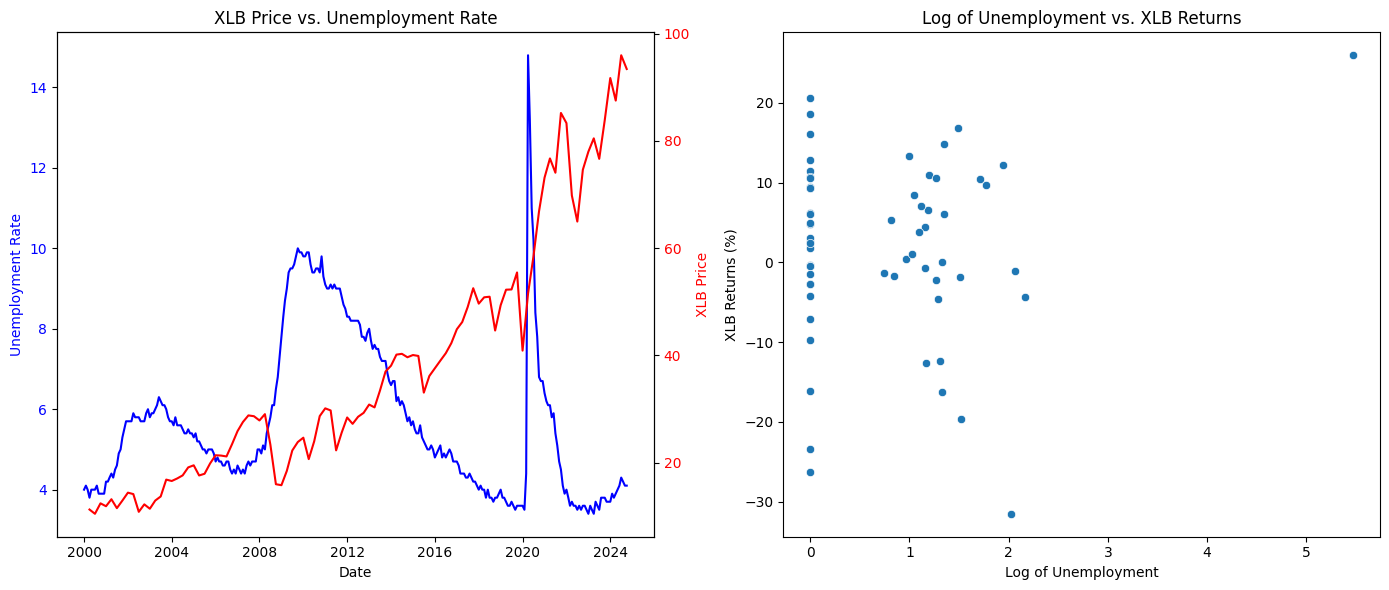

[*********************100%***********************]  1 of 1 completed

Correlation between log-unemployment and XLB returns: 0.05508630298476634



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


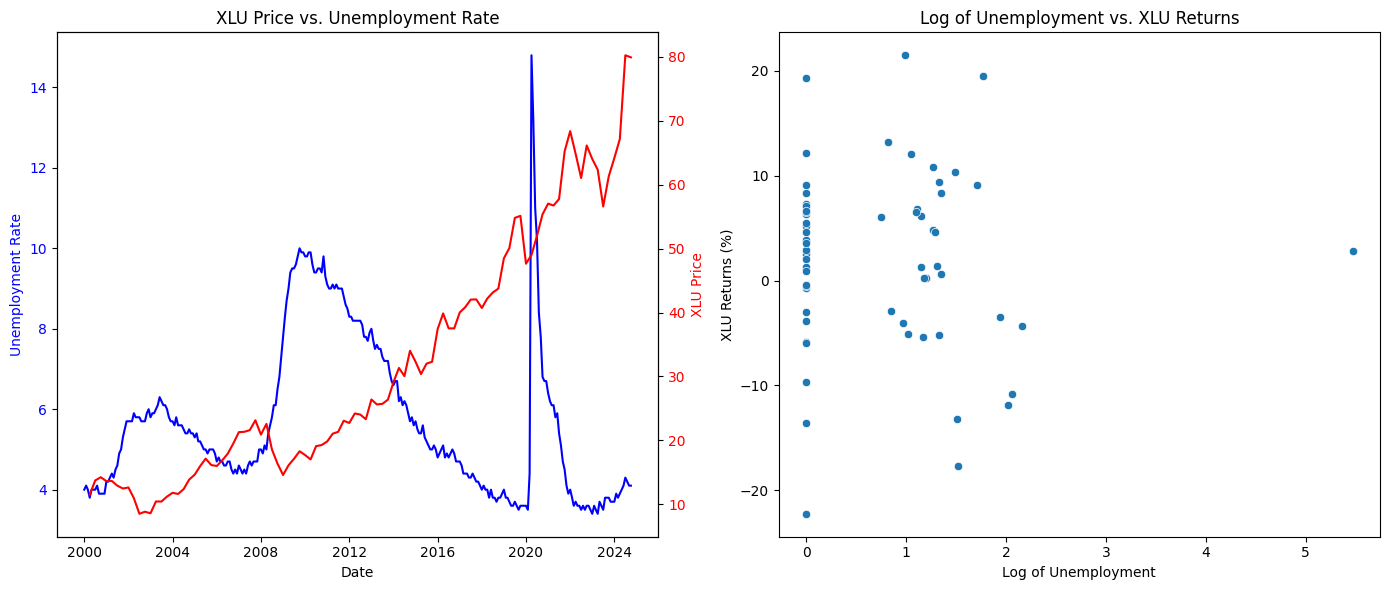

[*********************100%***********************]  1 of 1 completed

Correlation between log-unemployment and XLU returns: 0.1186594126462155



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


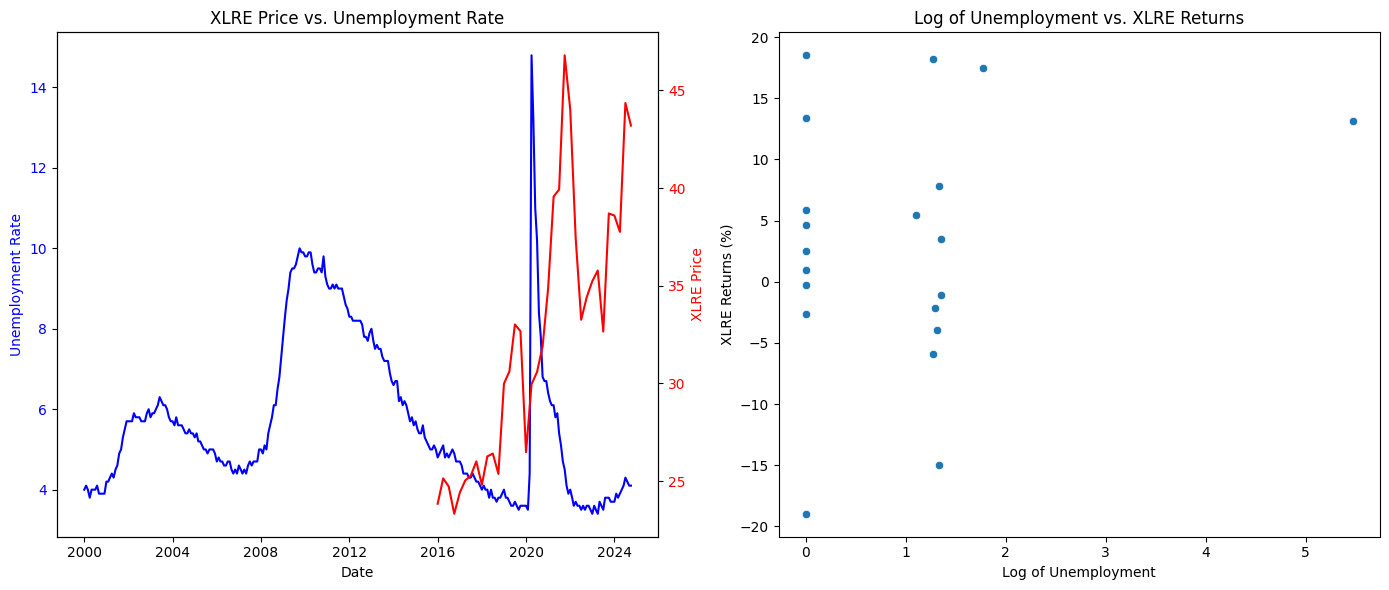

Correlation between log-unemployment and XLRE returns: 0.041655045638787386


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

etfs = ["SPY", "XLK", "XLV", "XLF", "XLY", "XLP", "XLE", "XLI", "XLB", "XLU", "XLRE"]
for etf in etfs:
    etf_data = yf.download(etf, start='2000-01-01', end='2024-10-25', interval='3mo')
    etf_data.reset_index(inplace=True)
    etf_data.columns = etf_data.columns.get_level_values(0)
    etf_data['year_month'] = etf_data['Date'].dt.strftime('%Y-%m')
    etf_data['returns'] = etf_data['Adj Close'].pct_change() * 100
    etf_data.dropna(subset=['returns'], inplace=True)

    # Unemployment data preparation
    unemployment_data['unemployment_rate'] = unemployment_data['value'].pct_change() * 100
    unemployment_data['log_unemployment_rate'] = np.log1p(unemployment_data['unemployment_rate'])
    unemployment_returns = unemployment_data[['year_month', 'log_unemployment_rate']].dropna(subset=['log_unemployment_rate'])
    combined_data_unemployment = pd.merge(unemployment_returns, etf_data, on='year_month', how='inner')

    if not combined_data_unemployment.empty:
        # Create subplots with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        # Plotting the time series on the first subplot
        ax1.set_title(f'{etf} Price vs. Unemployment Rate')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Unemployment Rate', color='blue')
        ax1.plot(unemployment_data['date'], unemployment_data['value'], color='blue', label='Unemployment Rate')
        ax1.tick_params(axis='y', labelcolor='blue')
        ax1_2 = ax1.twinx()
        ax1_2.set_ylabel(f'{etf} Price', color='red')
        ax1_2.plot(etf_data['Date'], etf_data['Adj Close'], color='red', label=f'{etf} Price')
        ax1_2.tick_params(axis='y', labelcolor='red')

        # Correlation scatter plot on the second subplot
        sns.scatterplot(data=combined_data_unemployment, x='log_unemployment_rate', y='returns', ax=ax2)
        ax2.set_title(f'Log of Unemployment vs. {etf} Returns')
        ax2.set_xlabel('Log of Unemployment')
        ax2.set_ylabel(f'{etf} Returns (%)')

        plt.tight_layout()
        plt.show()

        # Calculate and print correlation
        unemployment_correlation = combined_data_unemployment['log_unemployment_rate'].corr(combined_data_unemployment['Adj Close'])
        print(f"Correlation between log-unemployment and {etf} returns:", unemployment_correlation)
    else:
        print(f"No overlapping data for Unemployment and {etf} returns.")


#HYPOTHESIS 5: CONSUMER SENTIMENT INDEX AND STOCK MARKET RETURS

In [ ]:
# Step 1: Fetch Consumer Sentiment Index (CSI) using the existing get_fred_data function
CSI_data = get_fred_data("UMCSENT", api_key)

# Step 2: Drop the unnecessary columns
CSI_data_cleaned = CSI_data.drop(columns=['realtime_start', 'realtime_end'])

# Step 3: Clean the null values in the 'value' column
CSI_data_cleaned = CSI_data_cleaned.dropna(subset=['value'])

# Step 5: Filter to keep only rows with date from 2000 onwards
CSI_data_cleaned = CSI_data_cleaned[CSI_data_cleaned['date'].dt.year >= 2000]

# Step 5: Format the date to keep only month and year
CSI_data_cleaned['date'] = CSI_data_cleaned['date'].dt.strftime('%Y-%m')

CSI_data_cleaned.rename(columns={'date': 'year_month'}, inplace=True)
CSI_data_cleaned.rename(columns={'value': 'Index'}, inplace=True)

[*********************100%***********************]  1 of 1 completed


Correlation between lagged CSI growth rate and SPY returns: -0.0617
Regression results for SPY:
                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.3630
Date:                Mon, 04 Nov 2024   Prob (F-statistic):              0.548
Time:                        16:30:30   Log-Likelihood:                -342.83
No. Observations:                  97   AIC:                             689.7
Df Residuals:                      95   BIC:                             694.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

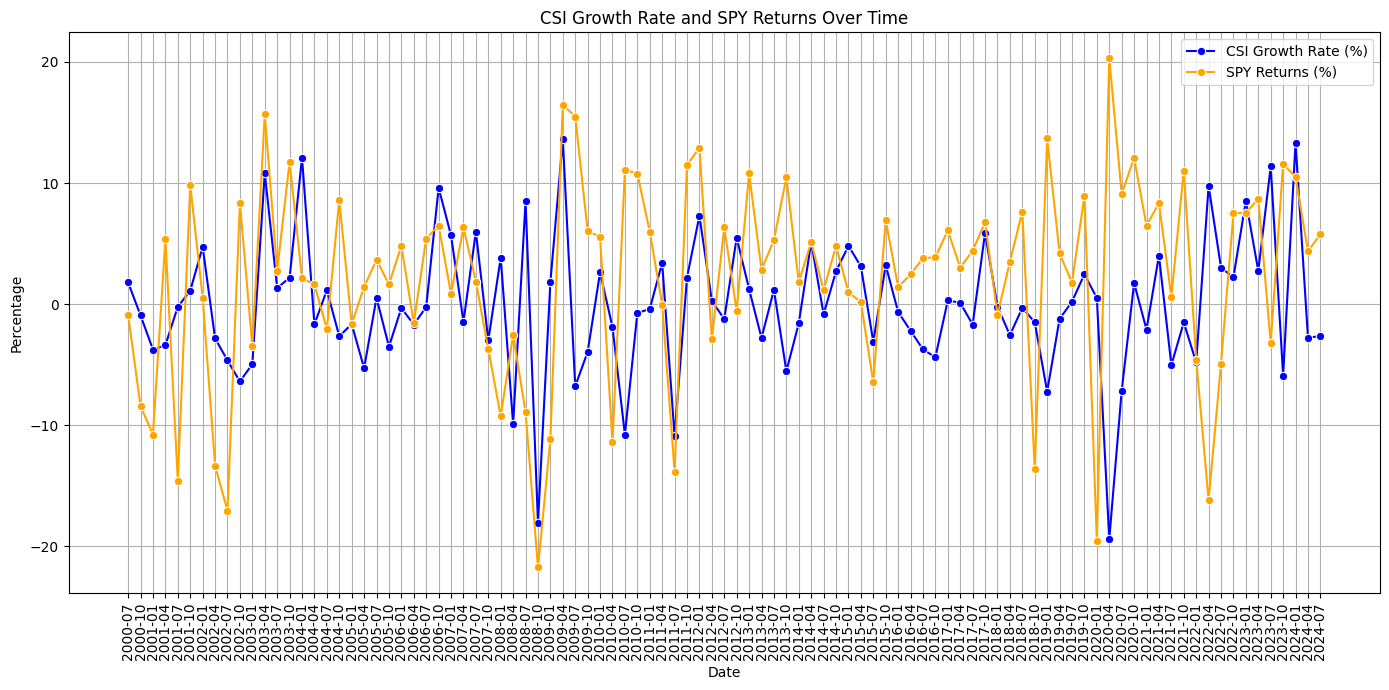

[*********************100%***********************]  1 of 1 completed


Correlation between lagged CSI growth rate and XLK returns: -0.0519
Regression results for XLK:
                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.2562
Date:                Mon, 04 Nov 2024   Prob (F-statistic):              0.614
Time:                        16:30:31   Log-Likelihood:                -378.78
No. Observations:                  97   AIC:                             761.6
Df Residuals:                      95   BIC:                             766.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

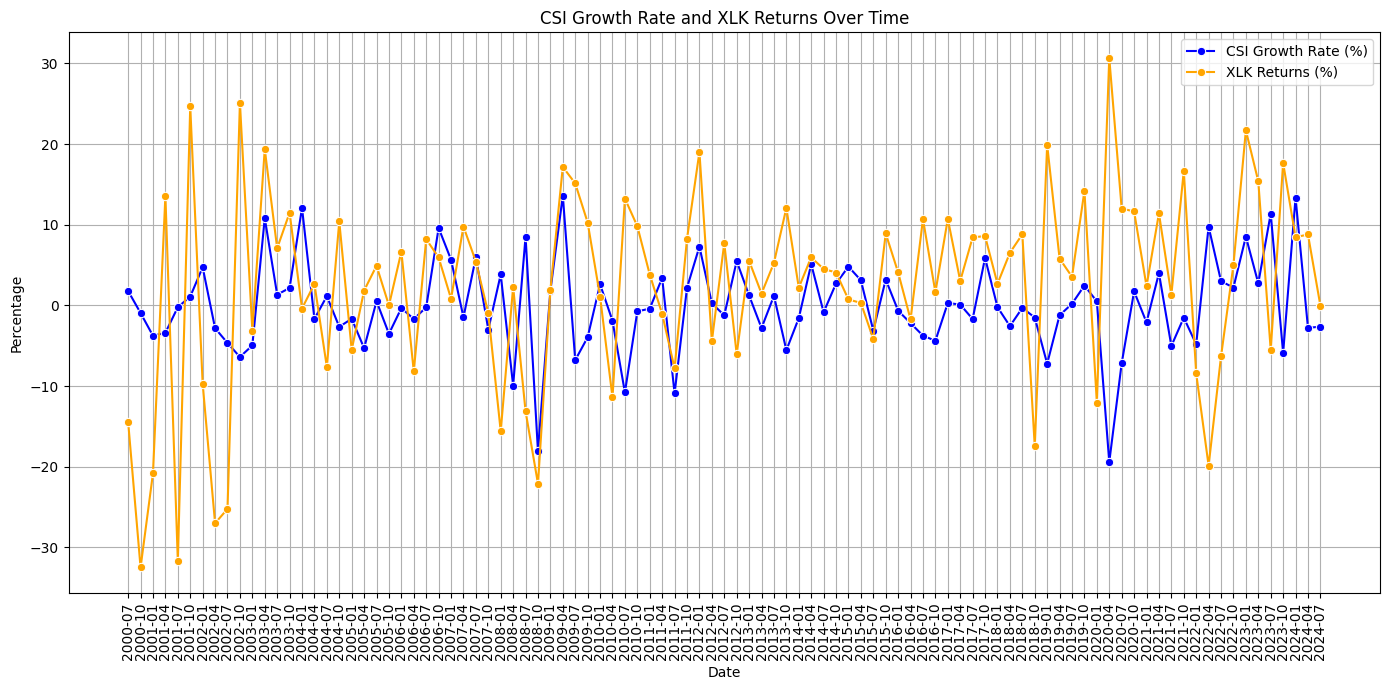

[*********************100%***********************]  1 of 1 completed


Correlation between lagged CSI growth rate and XLV returns: -0.0989
Regression results for XLV:
                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9378
Date:                Mon, 04 Nov 2024   Prob (F-statistic):              0.335
Time:                        16:30:32   Log-Likelihood:                -326.16
No. Observations:                  97   AIC:                             656.3
Df Residuals:                      95   BIC:                             661.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

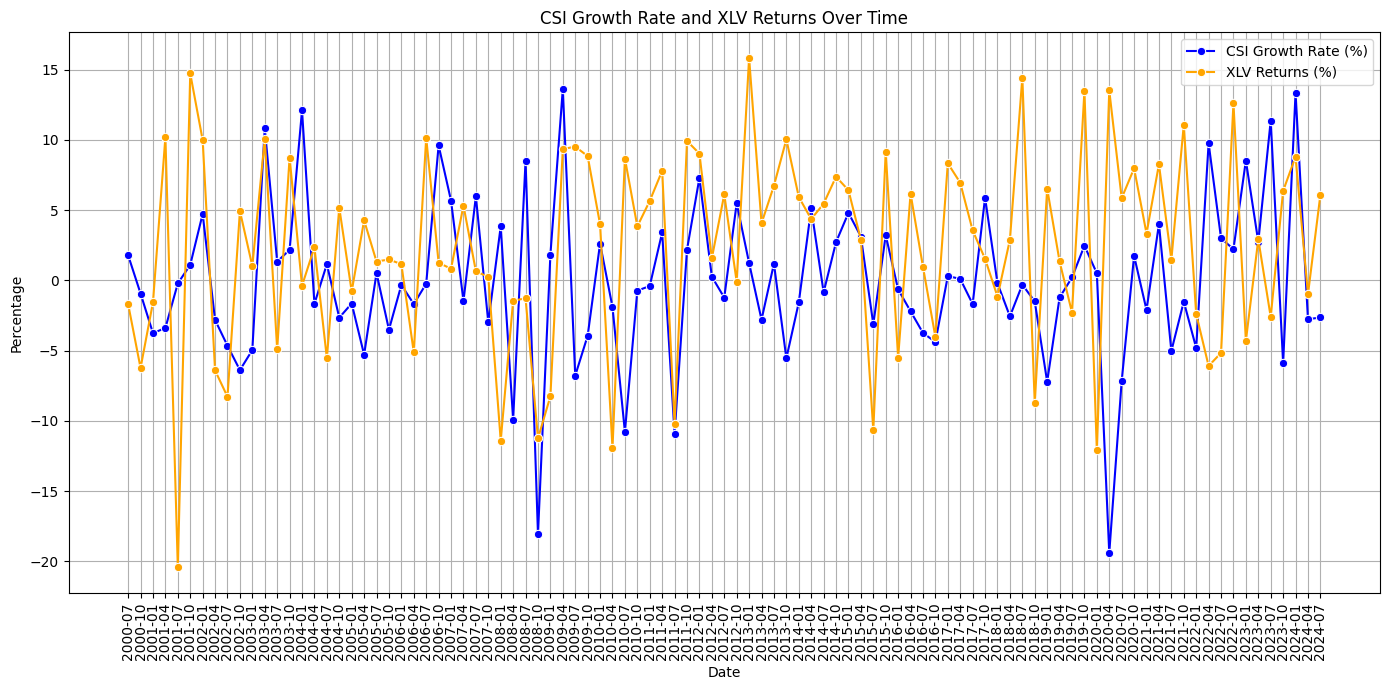

[*********************100%***********************]  1 of 1 completed


Correlation between lagged CSI growth rate and XLF returns: -0.0302
Regression results for XLF:
                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.08646
Date:                Mon, 04 Nov 2024   Prob (F-statistic):              0.769
Time:                        16:30:33   Log-Likelihood:                -375.29
No. Observations:                  97   AIC:                             754.6
Df Residuals:                      95   BIC:                             759.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

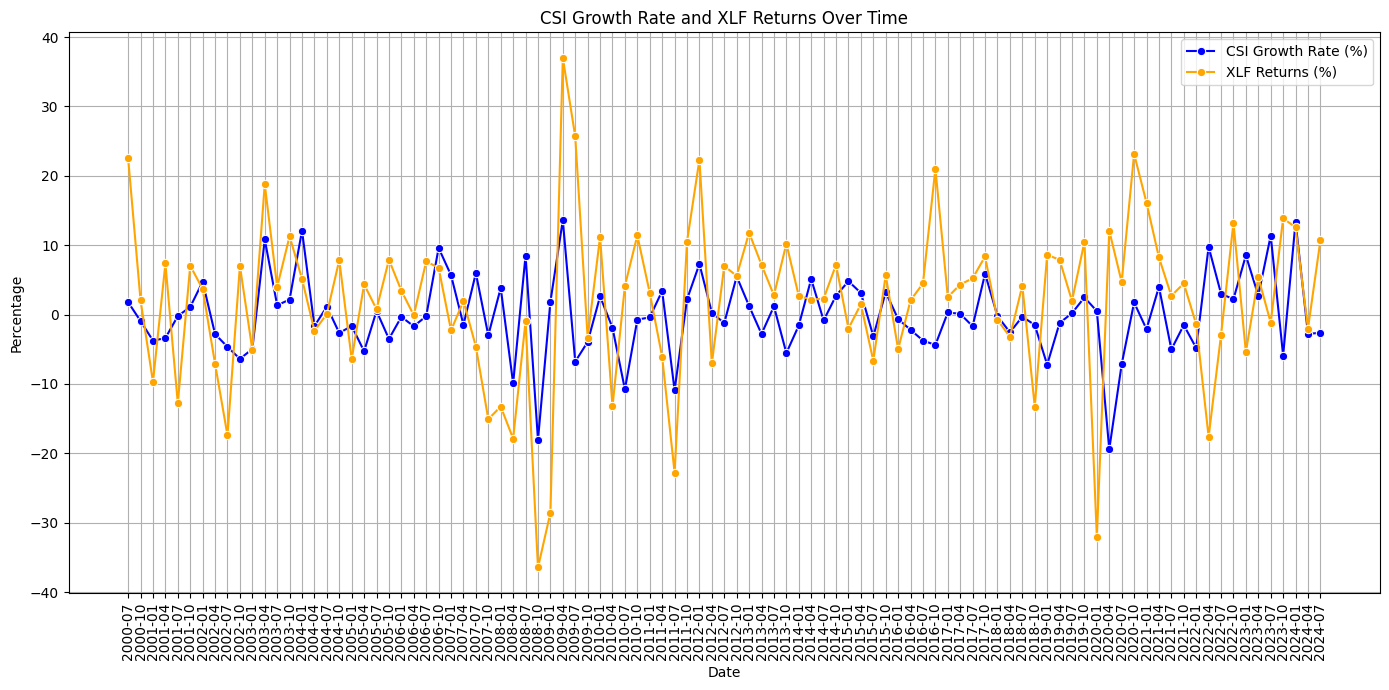

[*********************100%***********************]  1 of 1 completed


Correlation between lagged CSI growth rate and XLY returns: -0.0734
Regression results for XLY:
                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.5140
Date:                Mon, 04 Nov 2024   Prob (F-statistic):              0.475
Time:                        16:30:35   Log-Likelihood:                -358.82
No. Observations:                  97   AIC:                             721.6
Df Residuals:                      95   BIC:                             726.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

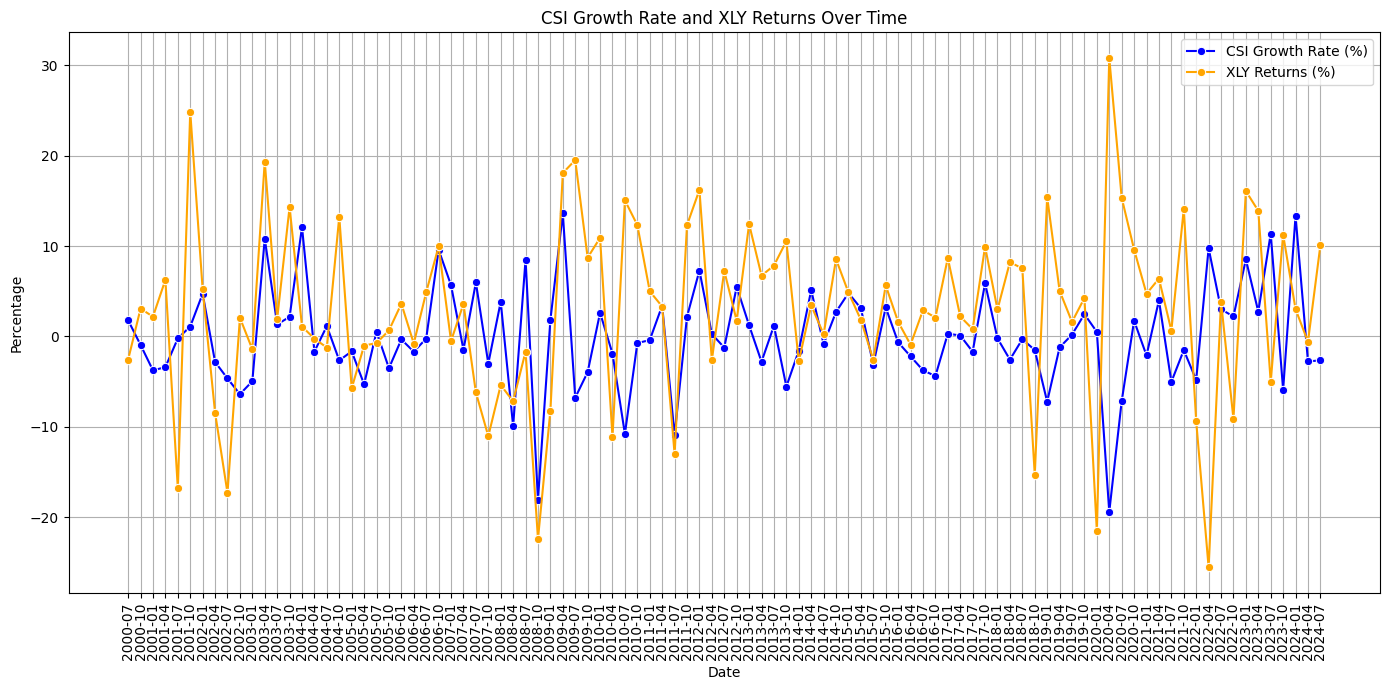

[*********************100%***********************]  1 of 1 completed


Correlation between lagged CSI growth rate and XLP returns: -0.1093
Regression results for XLP:
                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.148
Date:                Mon, 04 Nov 2024   Prob (F-statistic):              0.287
Time:                        16:30:36   Log-Likelihood:                -313.25
No. Observations:                  97   AIC:                             630.5
Df Residuals:                      95   BIC:                             635.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

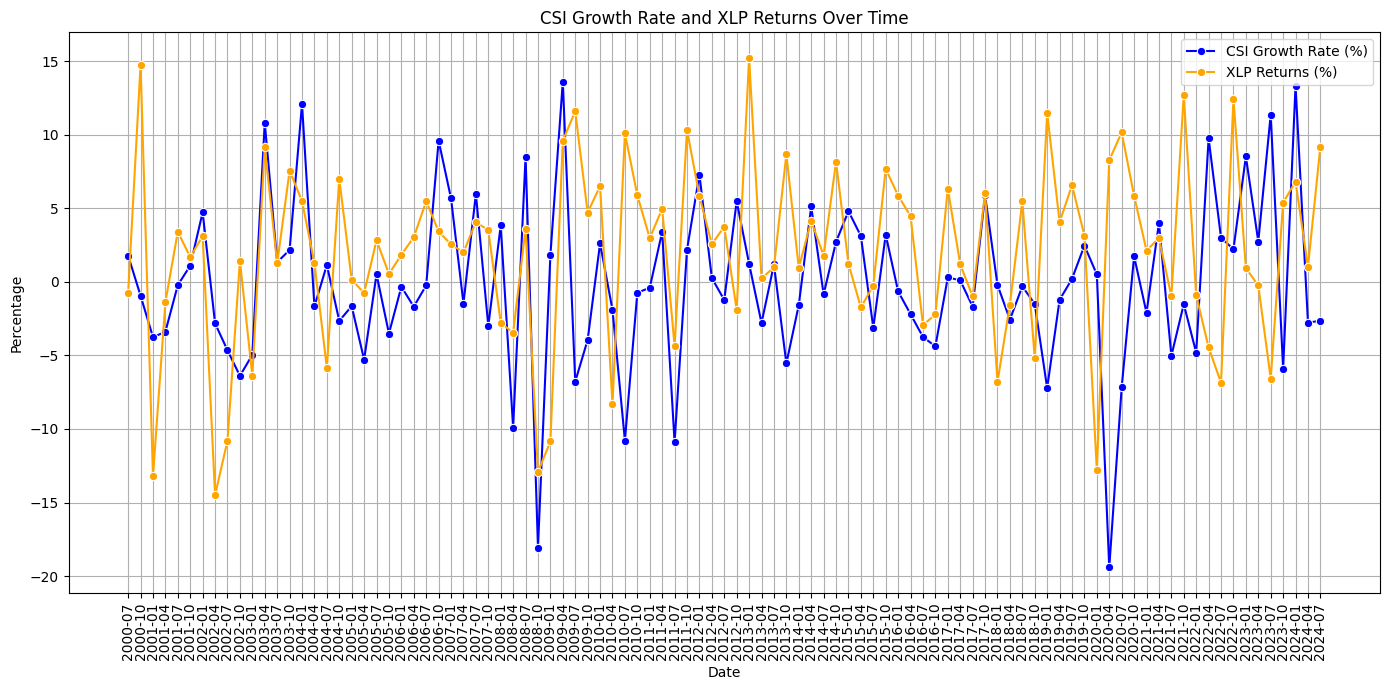

[*********************100%***********************]  1 of 1 completed


Correlation between lagged CSI growth rate and XLE returns: -0.0254
Regression results for XLE:
                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.06113
Date:                Mon, 04 Nov 2024   Prob (F-statistic):              0.805
Time:                        16:30:37   Log-Likelihood:                -389.87
No. Observations:                  97   AIC:                             783.7
Df Residuals:                      95   BIC:                             788.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

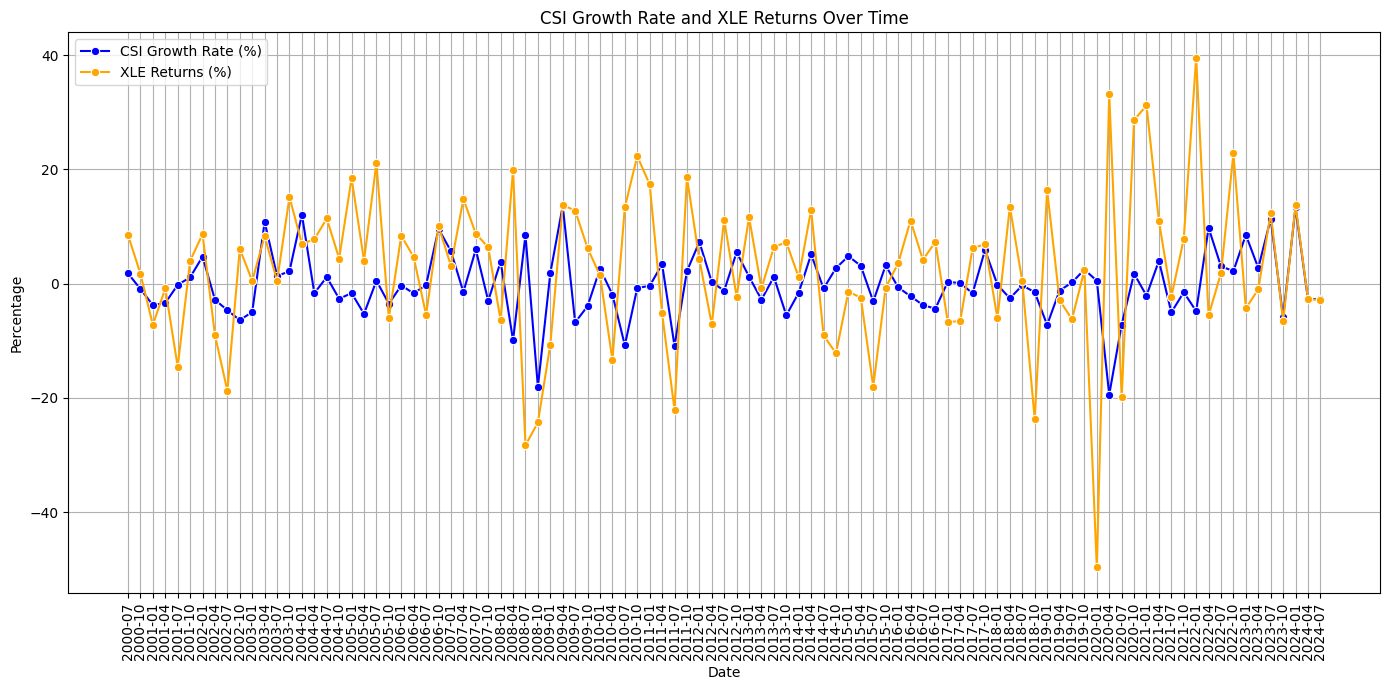

[*********************100%***********************]  1 of 1 completed


Correlation between lagged CSI growth rate and XLI returns: -0.0496
Regression results for XLI:
                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.2343
Date:                Mon, 04 Nov 2024   Prob (F-statistic):              0.629
Time:                        16:30:38   Log-Likelihood:                -361.77
No. Observations:                  97   AIC:                             727.5
Df Residuals:                      95   BIC:                             732.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

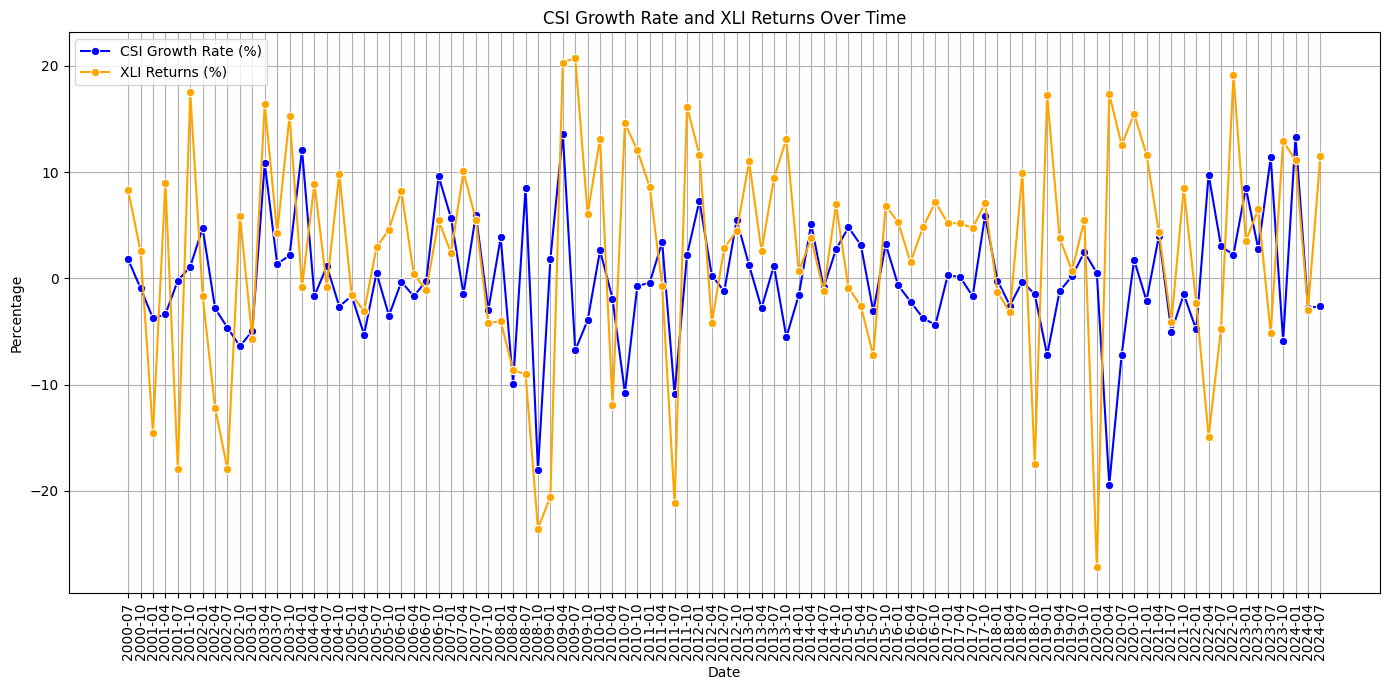

[*********************100%***********************]  1 of 1 completed


Correlation between lagged CSI growth rate and XLB returns: -0.1299
Regression results for XLB:
                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.630
Date:                Mon, 04 Nov 2024   Prob (F-statistic):              0.205
Time:                        16:30:39   Log-Likelihood:                -364.89
No. Observations:                  97   AIC:                             733.8
Df Residuals:                      95   BIC:                             738.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

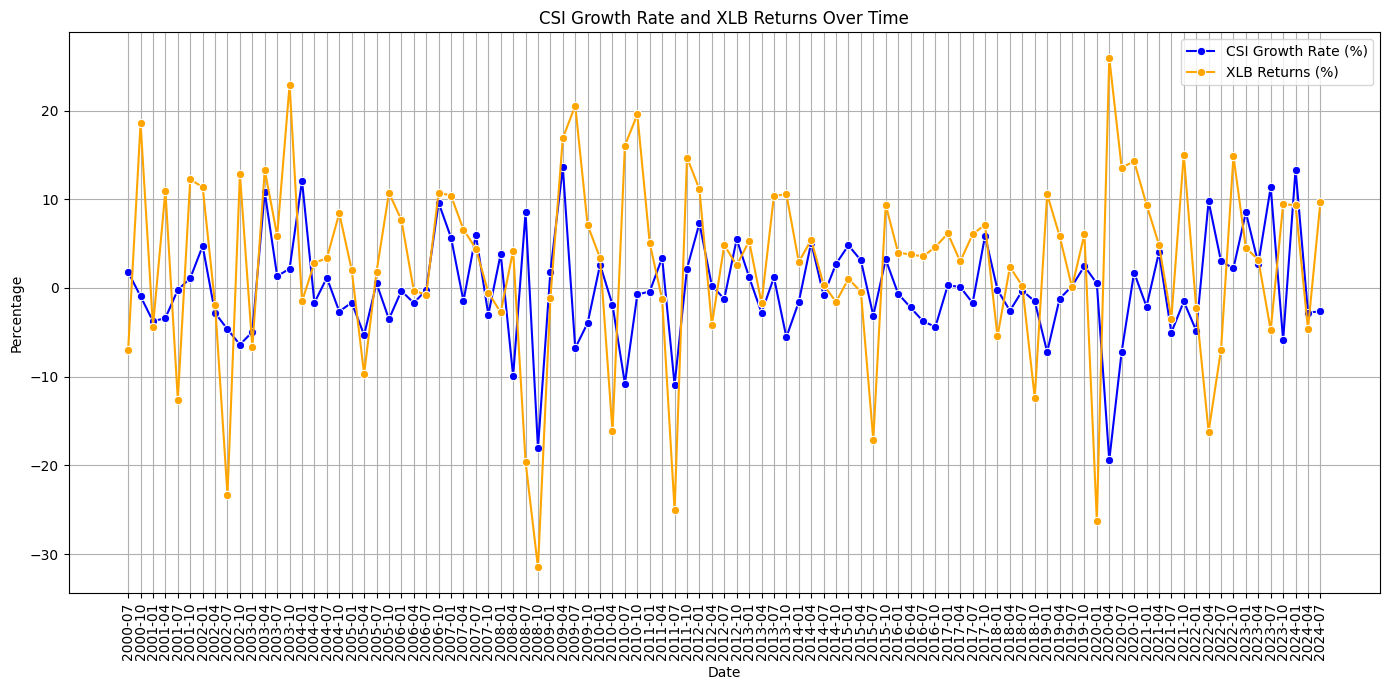

[*********************100%***********************]  1 of 1 completed


Correlation between lagged CSI growth rate and XLU returns: -0.0000
Regression results for XLU:
                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                 7.017e-09
Date:                Mon, 04 Nov 2024   Prob (F-statistic):               1.00
Time:                        16:30:40   Log-Likelihood:                -334.25
No. Observations:                  97   AIC:                             672.5
Df Residuals:                      95   BIC:                             677.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

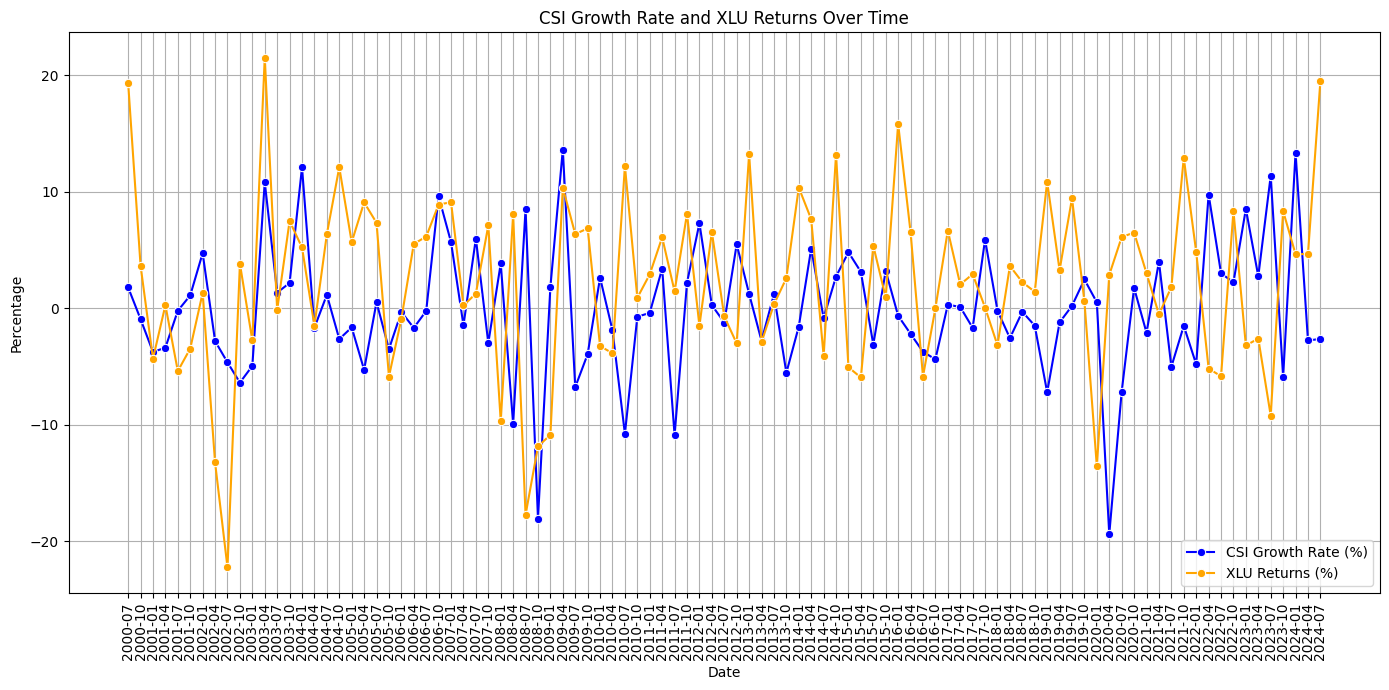

[*********************100%***********************]  1 of 1 completed


Correlation between lagged CSI growth rate and XLRE returns: -0.0903
Regression results for XLRE:
                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.2630
Date:                Mon, 04 Nov 2024   Prob (F-statistic):              0.612
Time:                        16:30:42   Log-Likelihood:                -122.19
No. Observations:                  34   AIC:                             248.4
Df Residuals:                      32   BIC:                             251.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------

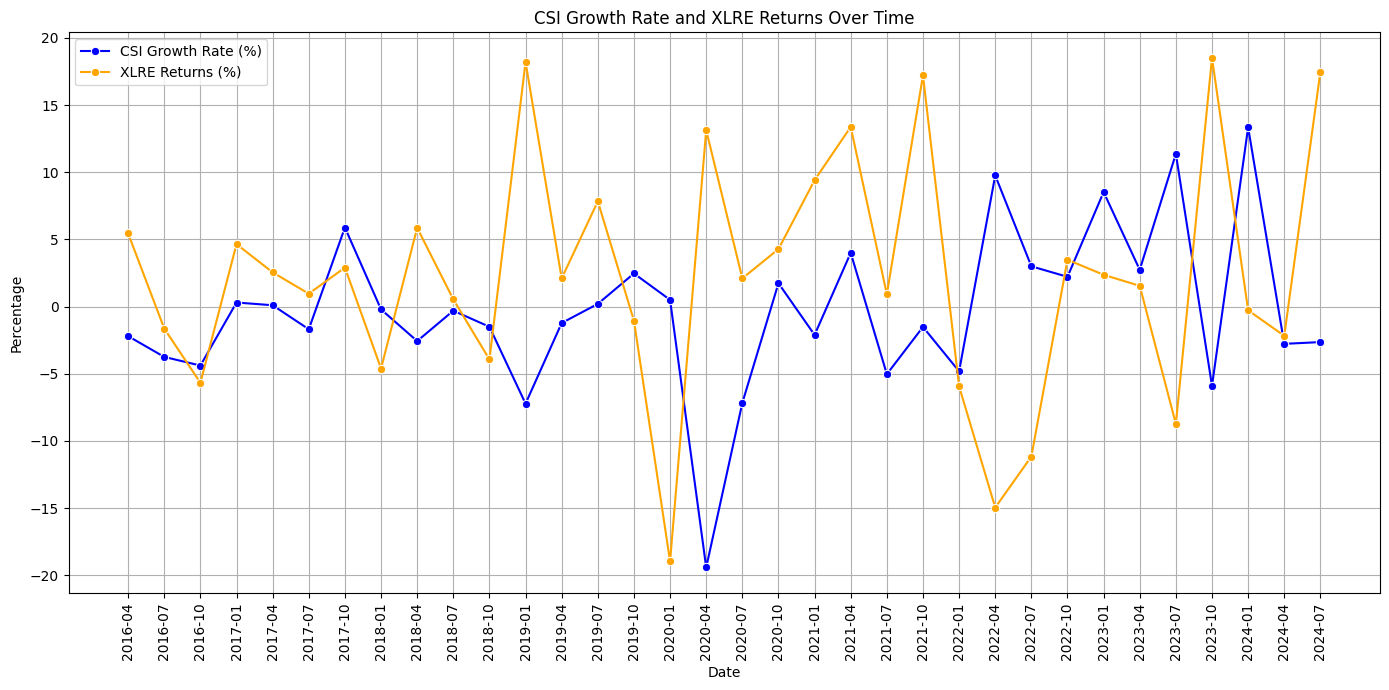

In [ ]:
# Step 1: Calculate the growth rate of the CSI index
CSI_data_cleaned['CSI_growth_rate'] = CSI_data_cleaned['Index'].pct_change() * 100
CSI_data_cleaned.dropna(subset=['CSI_growth_rate'], inplace=True)


# Analyze each ETF for Hypothesis 5
for etf in etfs:
    # Download data again to ensure fresh start
    etf_data = yf.download(etf, start='2000-01-01', end='2024-10-25', interval='3mo')
    etf_data.reset_index(inplace=True)
    etf_data.columns = etf_data.columns.get_level_values(0)
    etf_data['year_month'] = etf_data['Date'].dt.strftime('%Y-%m')
    etf_data['returns'] = etf_data['Adj Close'].pct_change() * 100
    etf_data.dropna(subset=['returns'], inplace=True)

    # Merge for hypothesis 5 analysis
    combined_data_CSI = pd.merge(CSI_data_cleaned, etf_data, on='year_month', how='inner')
    if not combined_data_CSI.empty:
        # Create lagged CSI growth rate (1-month lag)
        combined_data_CSI['lagged_CSI_growth_rate'] = combined_data_CSI['CSI_growth_rate'].shift(1)

        # Drop rows with NaN values after lagging
        combined_data_CSI.dropna(subset=['lagged_CSI_growth_rate'], inplace=True)

        # Calculate and display the correlation between lagged CSI growth rate and returns
        correlation = combined_data_CSI['lagged_CSI_growth_rate'].corr(combined_data_CSI['returns'])
        print(f'Correlation between lagged CSI growth rate and {etf} returns: {correlation:.4f}')

        # Perform regression analysis
        X = combined_data_CSI['lagged_CSI_growth_rate']
        y = combined_data_CSI['returns']

        # Add a constant to the model (intercept)
        X = sm.add_constant(X)

        # Fit the regression model
        model = sm.OLS(y, X).fit()

        # Print the regression results
        print(f'Regression results for {etf}:')
        print(model.summary())

        # Plotting the CSI growth rate and ETF returns
        plt.figure(figsize=(14, 7))
        sns.lineplot(data=combined_data_CSI, x='year_month', y='CSI_growth_rate', label='CSI Growth Rate (%)', color='blue', marker='o')
        sns.lineplot(data=combined_data_CSI, x='year_month', y='returns', label=f'{etf} Returns (%)', color='orange', marker='o')

        plt.title(f'CSI Growth Rate and {etf} Returns Over Time')
        plt.xlabel('Date')
        plt.ylabel('Percentage')
        plt.xticks(rotation=90)
        plt.legend()
        plt.grid()
        plt.tight_layout()
        plt.show()
    else:
        print(f"No overlapping data for CSI Growth Rate and {etf} returns.")

# HYPOTHESIS 6: INDUSTRIAL PRODUCTION INDEX AND STOCK MARKET RETURNS

In [ ]:
industrial_production_data.head()

realtime_start realtime_end       date    value year_month
972     2024-10-22   2024-10-22 2000-01-01  91.4092    2000-01
973     2024-10-22   2024-10-22 2000-02-01  91.7245    2000-02
974     2024-10-22   2024-10-22 2000-03-01  92.0830    2000-03
975     2024-10-22   2024-10-22 2000-04-01  92.6659    2000-04
976     2024-10-22   2024-10-22 2000-05-01  92.9347    2000-05

[*********************100%***********************]  1 of 1 completed


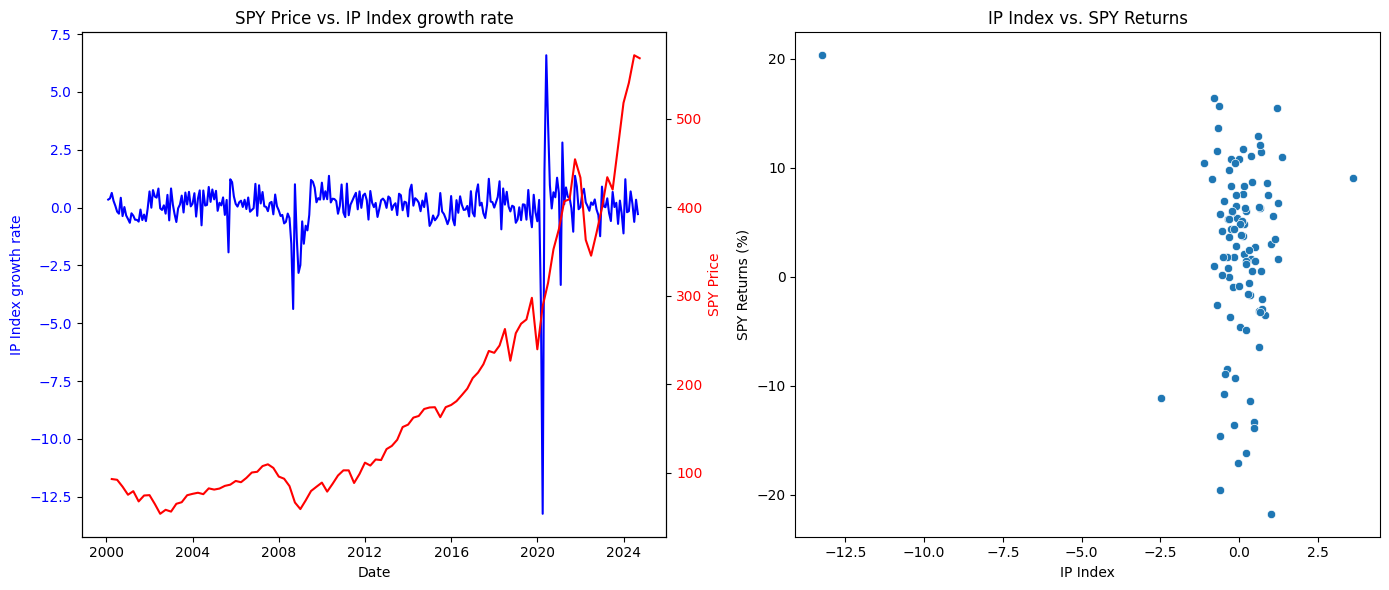

[*********************100%***********************]  1 of 1 completed

Correlation between IP Index growth rate and SPY returns: -0.1558149102041256


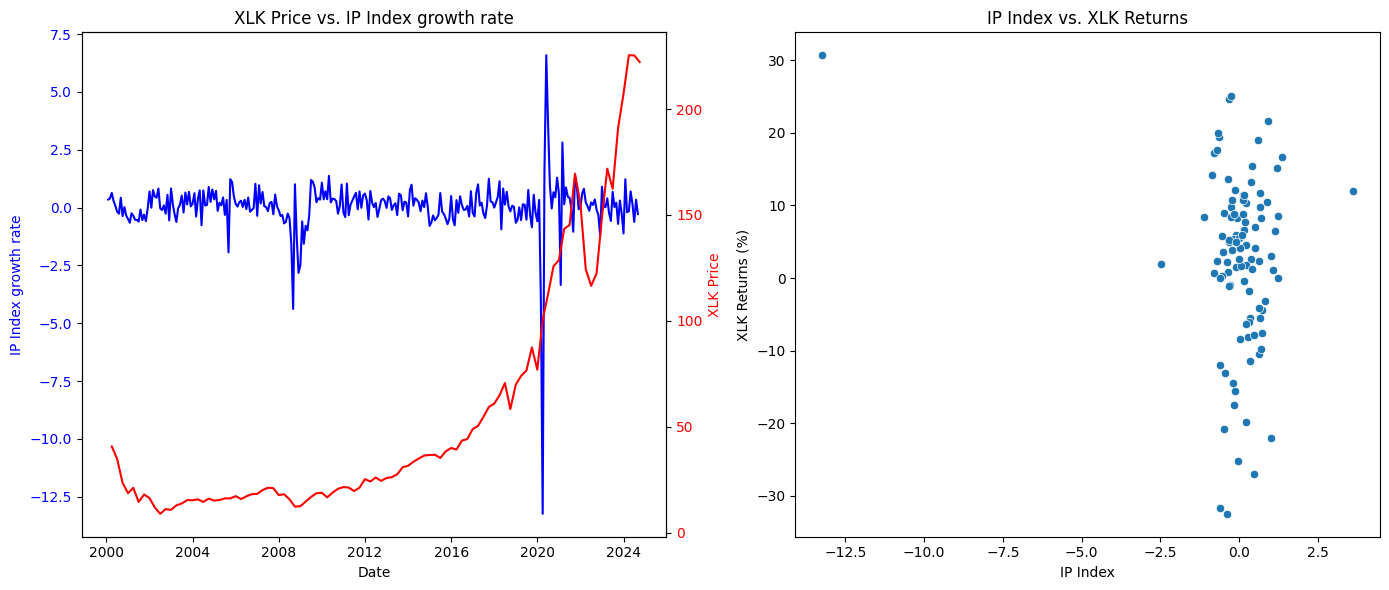

[*********************100%***********************]  1 of 1 completed

Correlation between IP Index growth rate and XLK returns: -0.19673628865488588


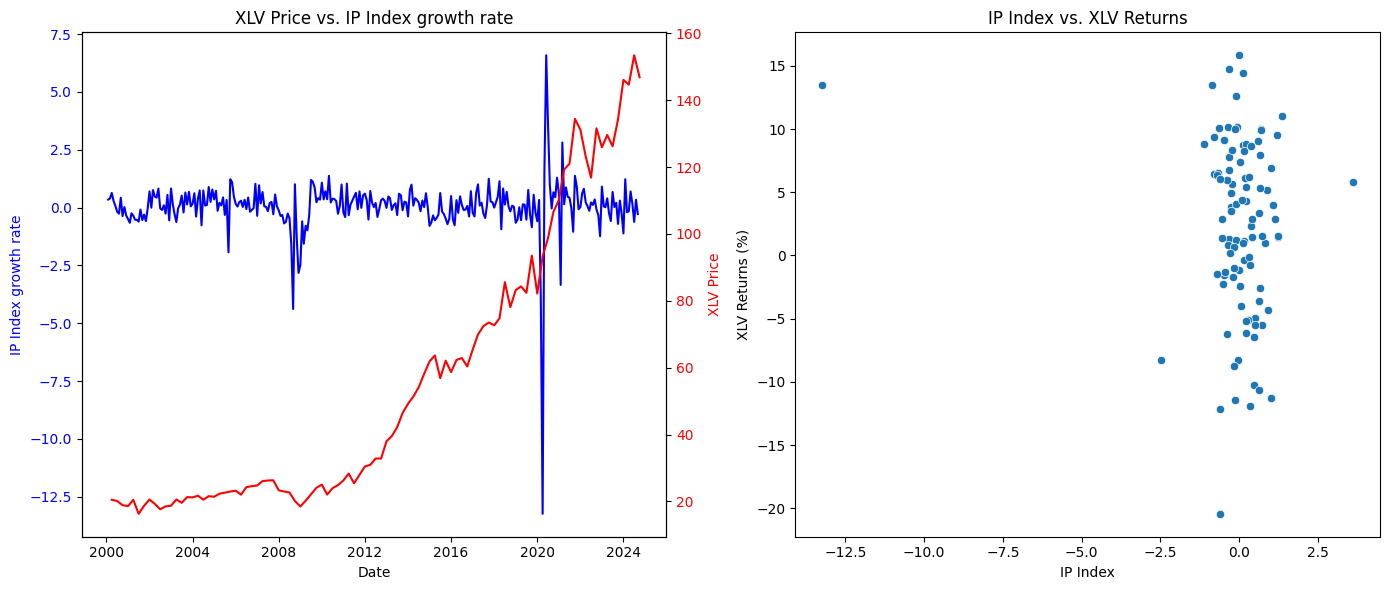

[*********************100%***********************]  1 of 1 completed

Correlation between IP Index growth rate and XLV returns: -0.13597730319891654


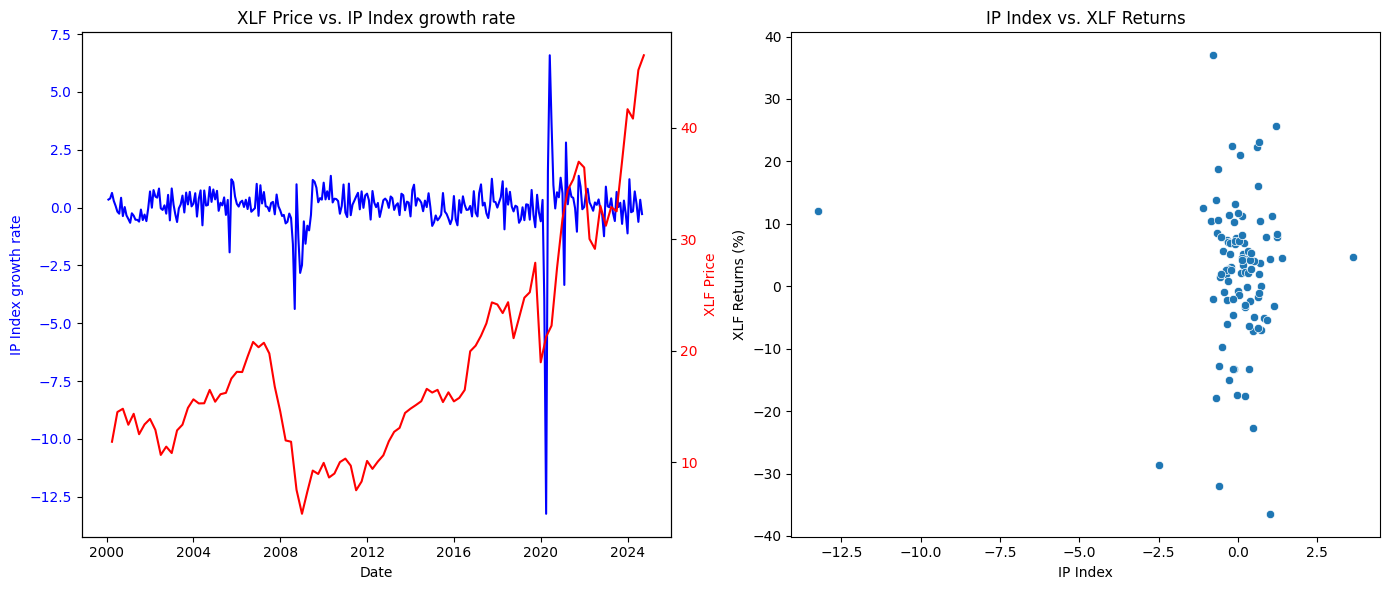

[*********************100%***********************]  1 of 1 completed

Correlation between IP Index growth rate and XLF returns: -0.040103474915249945


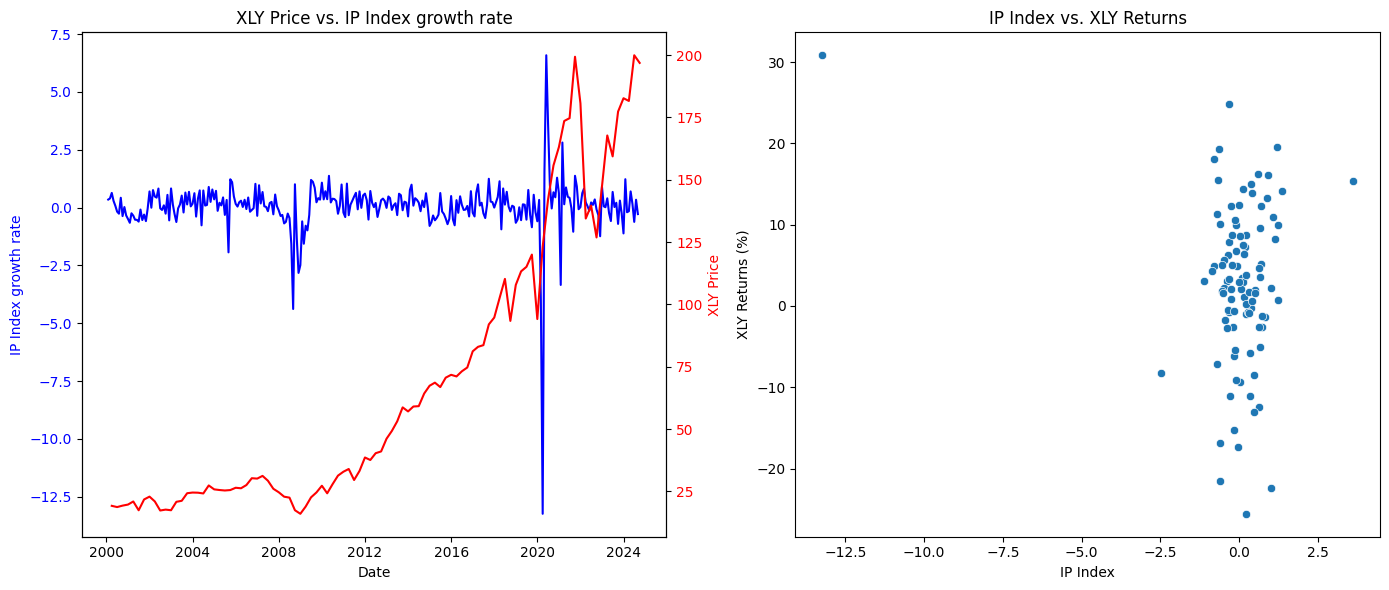

[*********************100%***********************]  1 of 1 completed

Correlation between IP Index growth rate and XLY returns: -0.1922063276944063


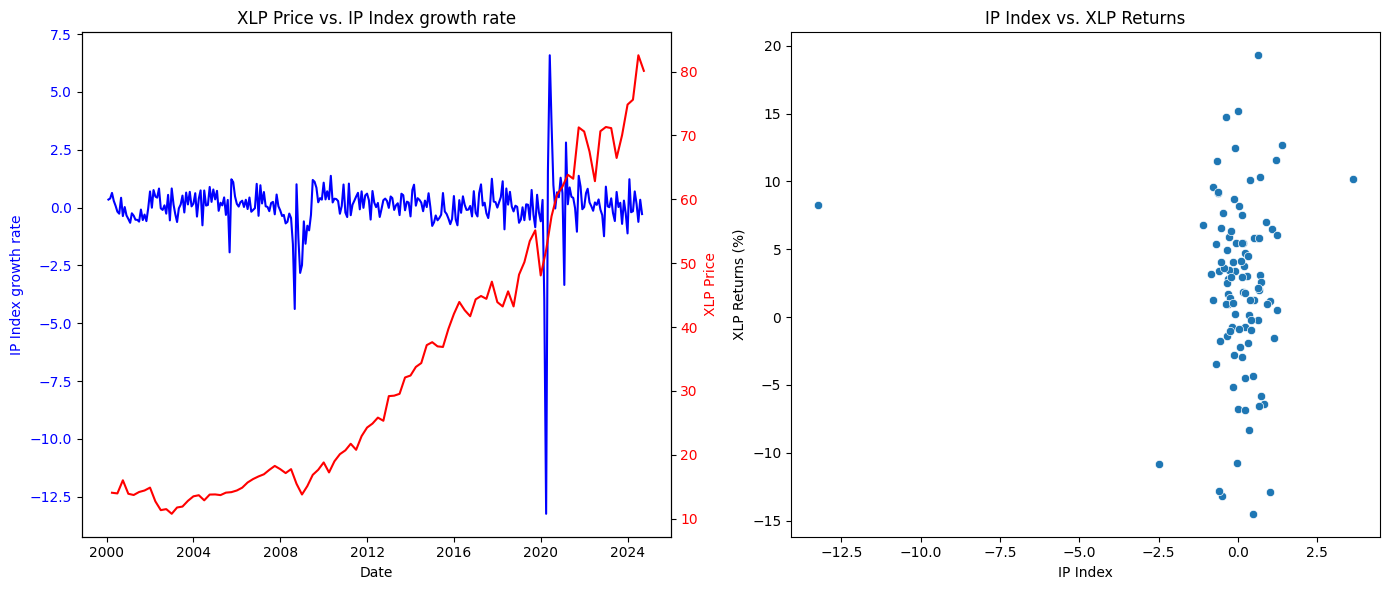

[*********************100%***********************]  1 of 1 completed

Correlation between IP Index growth rate and XLP returns: -0.037674554329453484


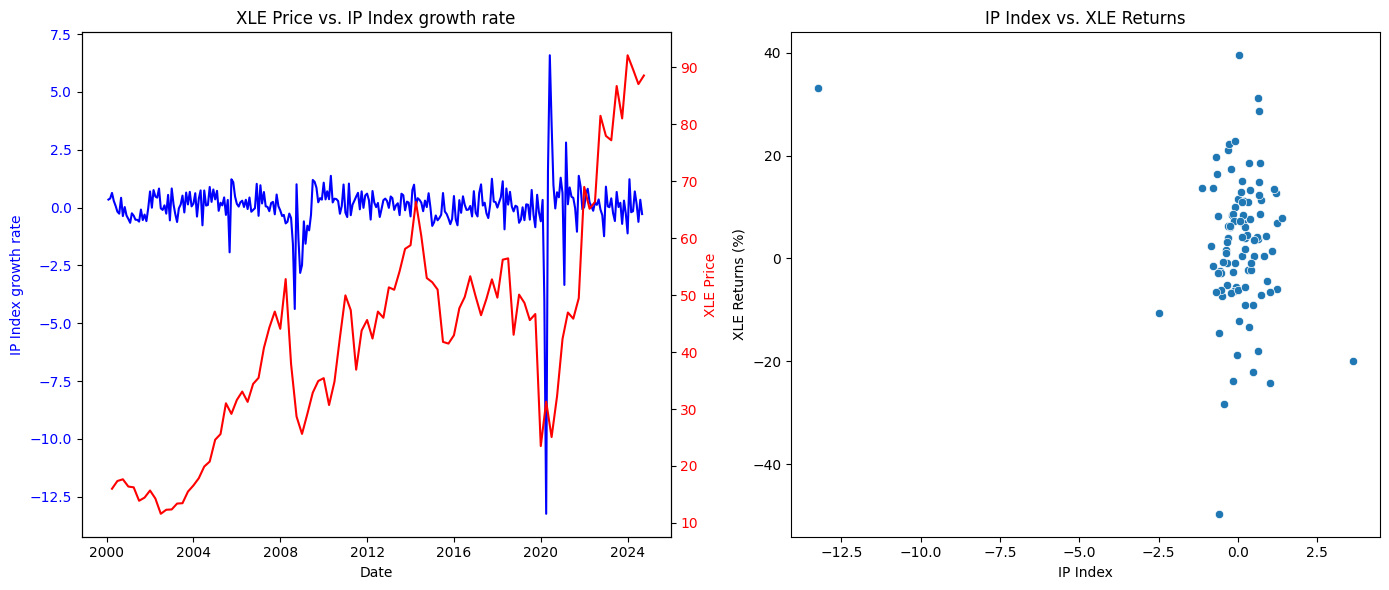

[*********************100%***********************]  1 of 1 completed

Correlation between IP Index growth rate and XLE returns: -0.19906969440045572


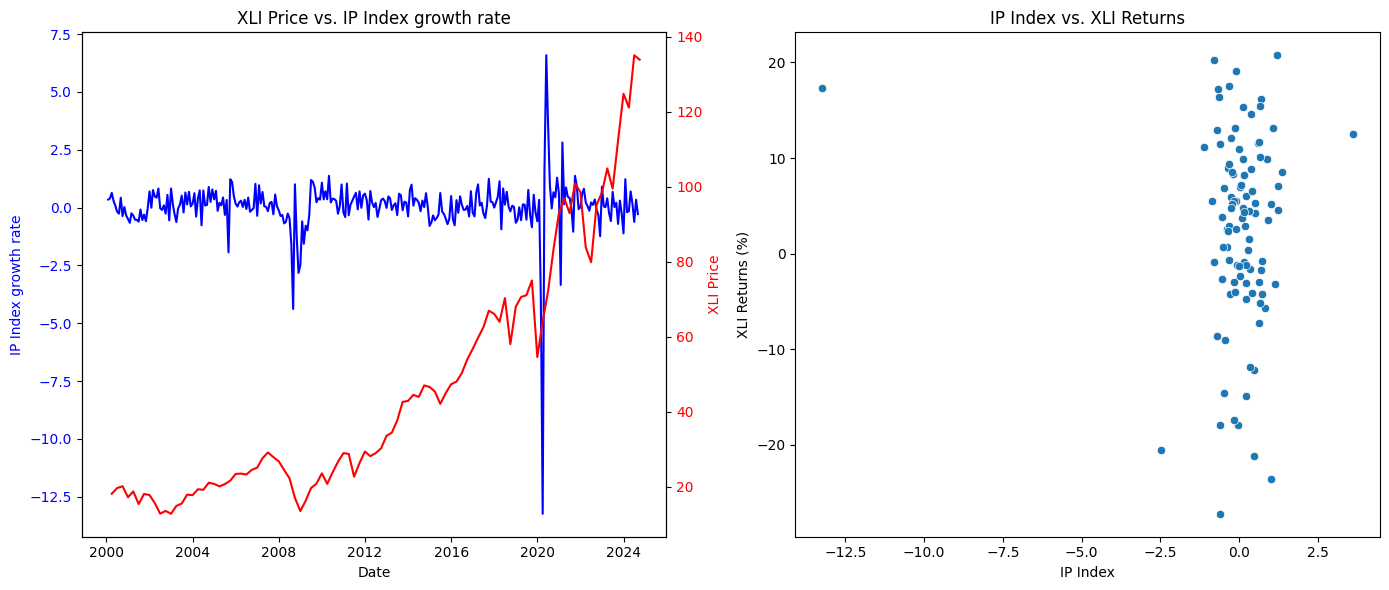

[*********************100%***********************]  1 of 1 completed

Correlation between IP Index growth rate and XLI returns: -0.07010009923041655


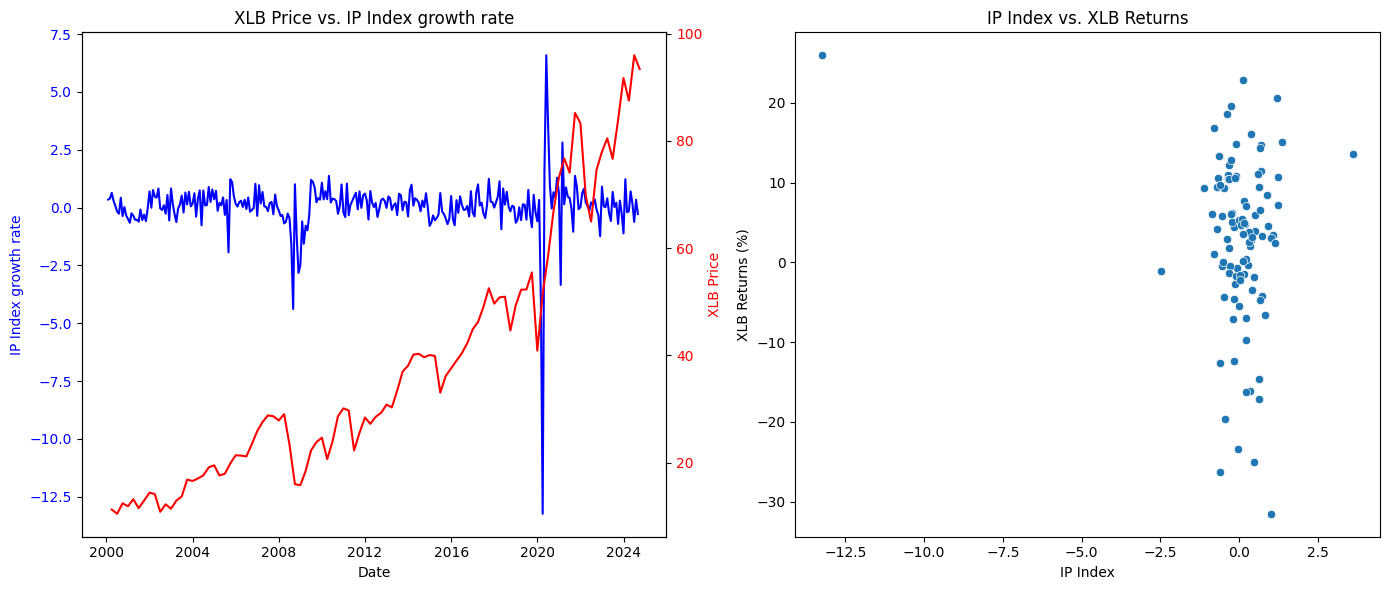

[*********************100%***********************]  1 of 1 completed

Correlation between IP Index growth rate and XLB returns: -0.18137029523915643


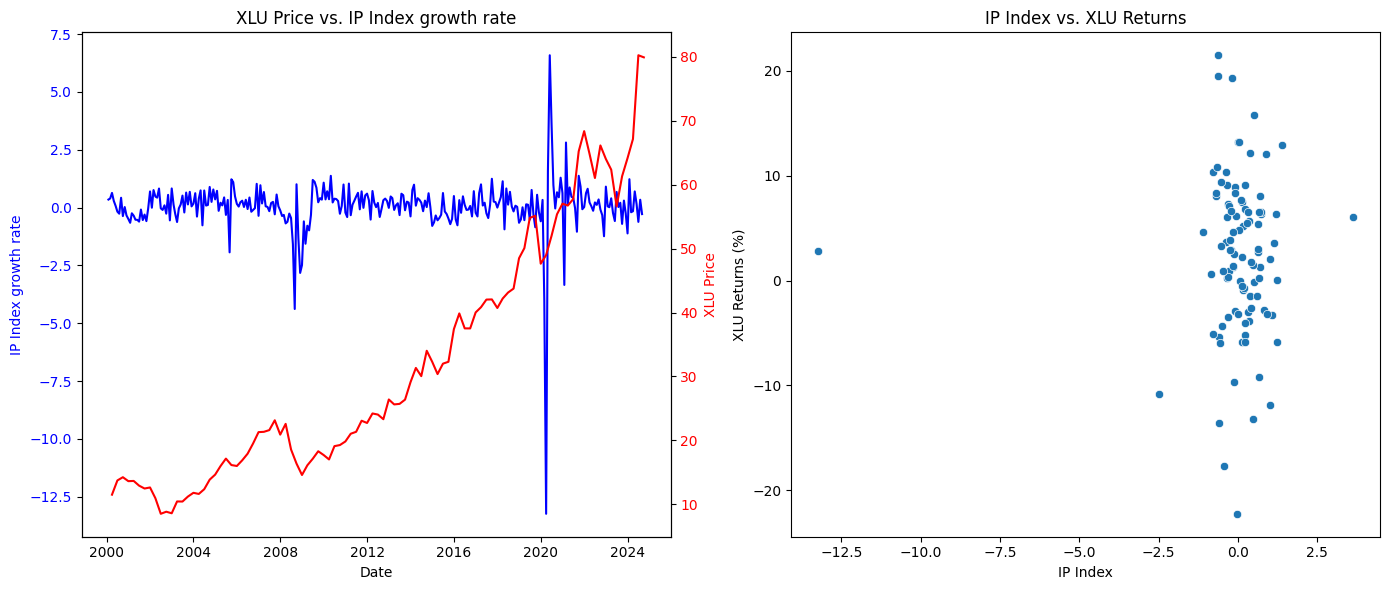

[*********************100%***********************]  1 of 1 completed

Correlation between IP Index growth rate and XLU returns: 0.002629247106926705


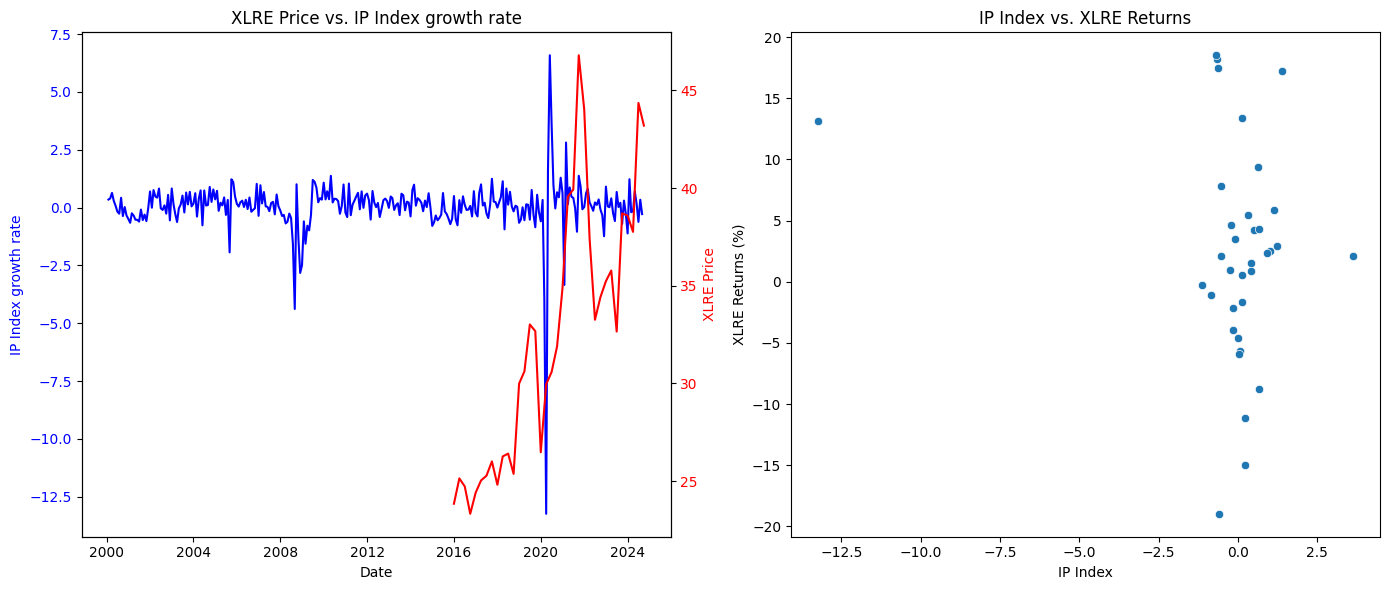

Correlation between IP Index growth rate and XLRE returns: -0.19204862537532544


In [ ]:
# List of ETFs to analyze
etfs = ["SPY", "XLK", "XLV", "XLF", "XLY", "XLP", "XLE", "XLI", "XLB", "XLU", "XLRE"]

for etf in etfs:
    etf_data = yf.download(etf, start='2000-01-01', end='2024-10-25', interval='3mo')
    etf_data.reset_index(inplace=True)
    etf_data.columns = etf_data.columns.get_level_values(0)
    etf_data['year_month'] = etf_data['Date'].dt.strftime('%Y-%m')
    etf_data['returns'] = etf_data['Adj Close'].pct_change() * 100
    etf_data.dropna(subset=['returns'], inplace=True)

    # IP data preparation
    industrial_production_data['IP_growth_rate'] = industrial_production_data['value'].pct_change() * 100
    combined_data_industrial = pd.merge(industrial_production_data, etf_data, on='year_month', how='inner')

    if not combined_data_unemployment.empty:
        # Create subplots with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        # Plotting the time series on the first subplot
        ax1.set_title(f'{etf} Price vs. IP Index growth rate')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('IP Index growth rate', color='blue')
        ax1.plot(industrial_production_data['date'], industrial_production_data['IP_growth_rate'], color='blue', label='IP Index growth rate')
        ax1.tick_params(axis='y', labelcolor='blue')
        ax1_2 = ax1.twinx()
        ax1_2.set_ylabel(f'{etf} Price', color='red')
        ax1_2.plot(etf_data['Date'], etf_data['Adj Close'], color='red', label=f'{etf} Price')
        ax1_2.tick_params(axis='y', labelcolor='red')

        # Correlation scatter plot on the second subplot
        sns.scatterplot(data=combined_data_industrial, x='IP_growth_rate', y='returns', ax=ax2)
        ax2.set_title(f'IP Index vs. {etf} Returns')
        ax2.set_xlabel('IP Index')
        ax2.set_ylabel(f'{etf} Returns (%)')

        plt.tight_layout()
        plt.show()

        # Calculate and print correlation
        IP_correlation = combined_data_industrial['IP_growth_rate'].corr(combined_data_industrial['returns'])
        print(f"Correlation between IP Index growth rate and {etf} returns:", IP_correlation)
    else:
        print(f"No overlapping data for IP Index and {etf} returns.")

Comparing returns with the Index values instead of the Growth rate as it is really flat

[*********************100%***********************]  1 of 1 completed


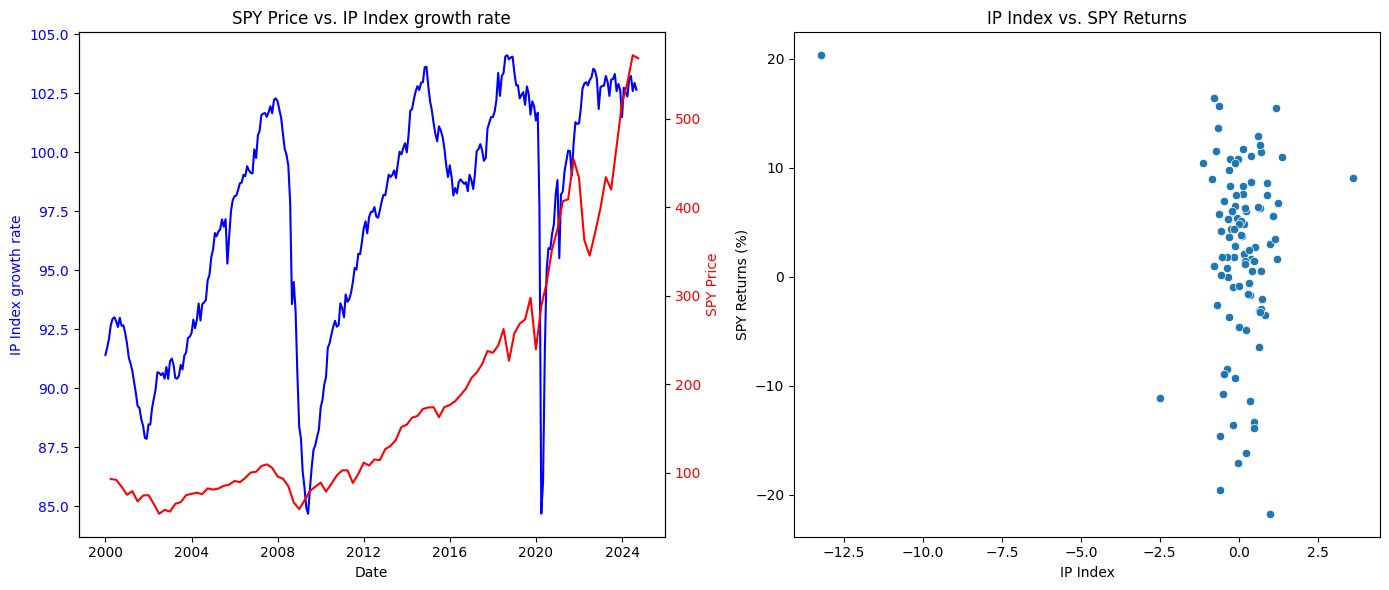

[*********************100%***********************]  1 of 1 completed

Correlation between IP Index growth rate and SPY returns: -0.1558149102041256


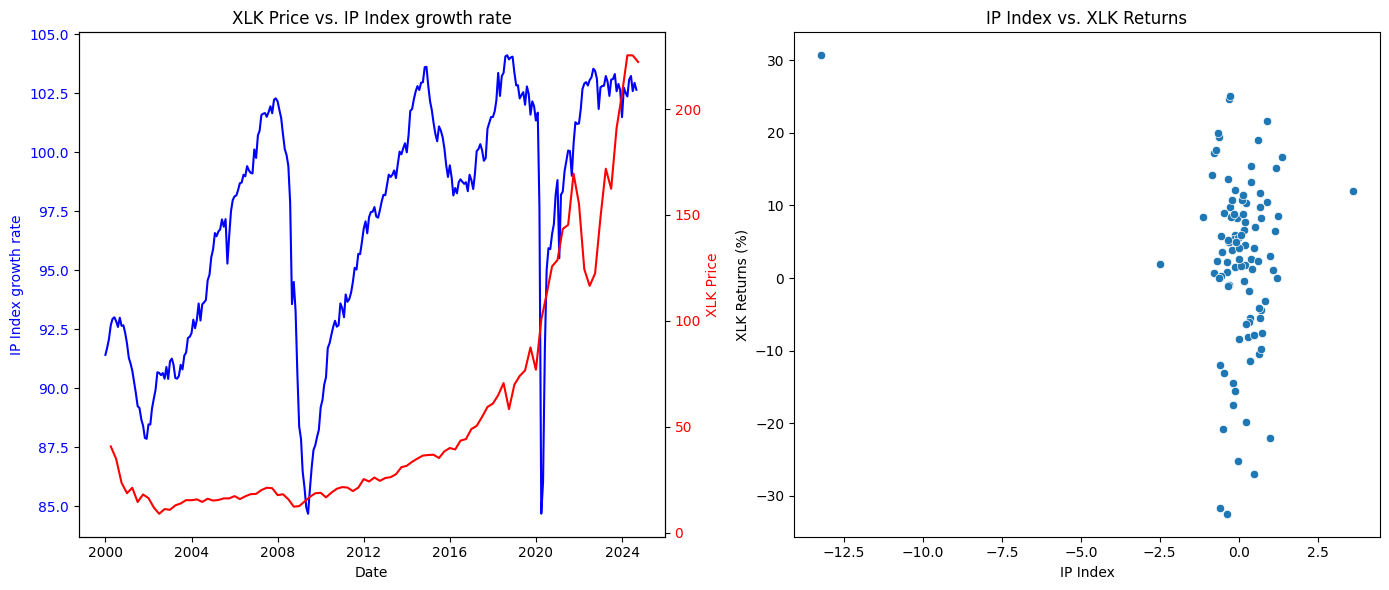

[*********************100%***********************]  1 of 1 completed

Correlation between IP Index growth rate and XLK returns: -0.19673628865488588


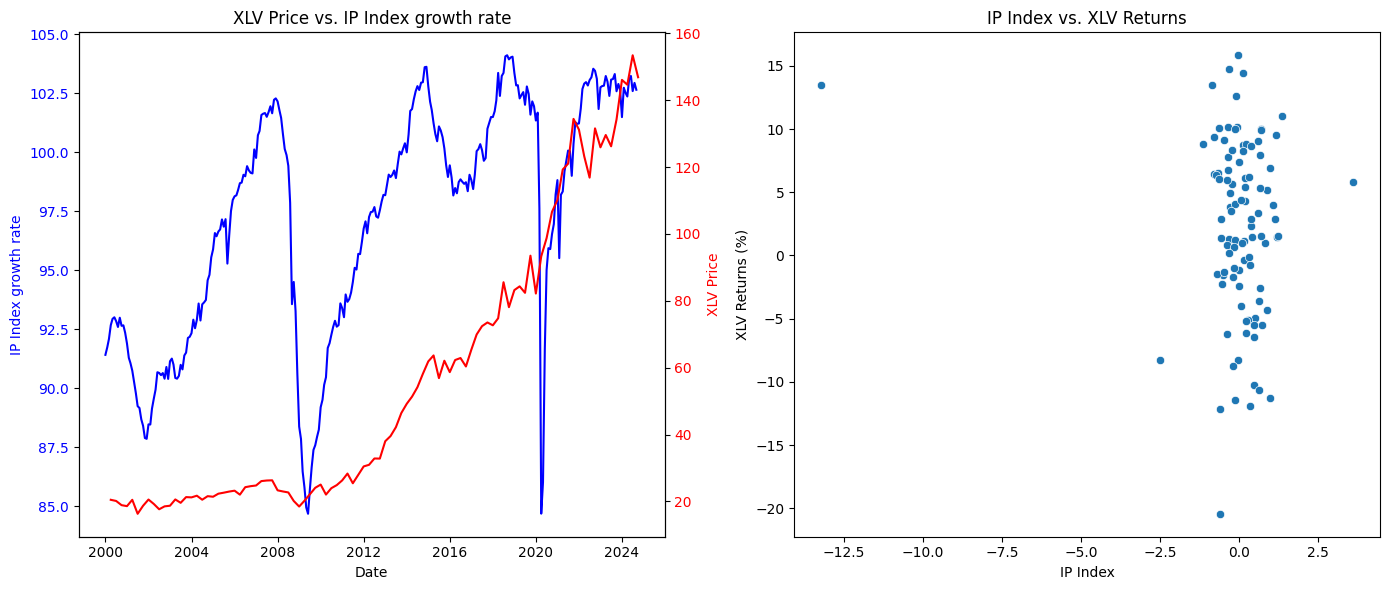

[*********************100%***********************]  1 of 1 completed

Correlation between IP Index growth rate and XLV returns: -0.13597730319891654


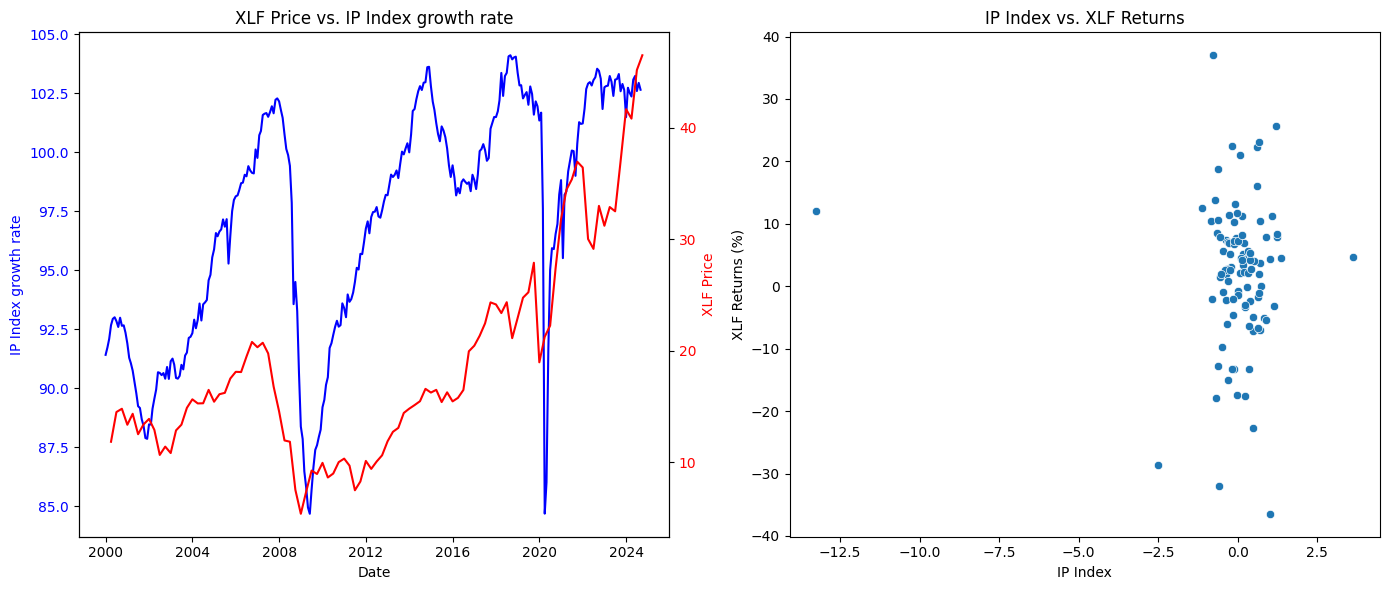

[*********************100%***********************]  1 of 1 completed

Correlation between IP Index growth rate and XLF returns: -0.040103474915249945


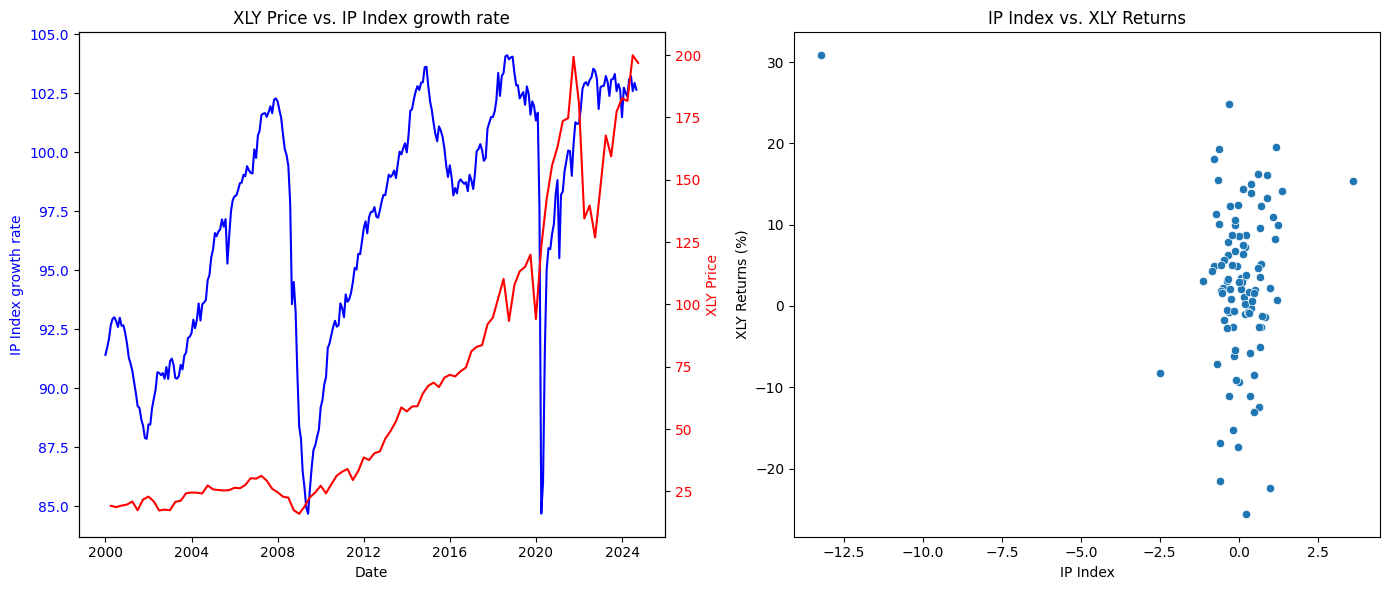

[*********************100%***********************]  1 of 1 completed

Correlation between IP Index growth rate and XLY returns: -0.1922063276944063


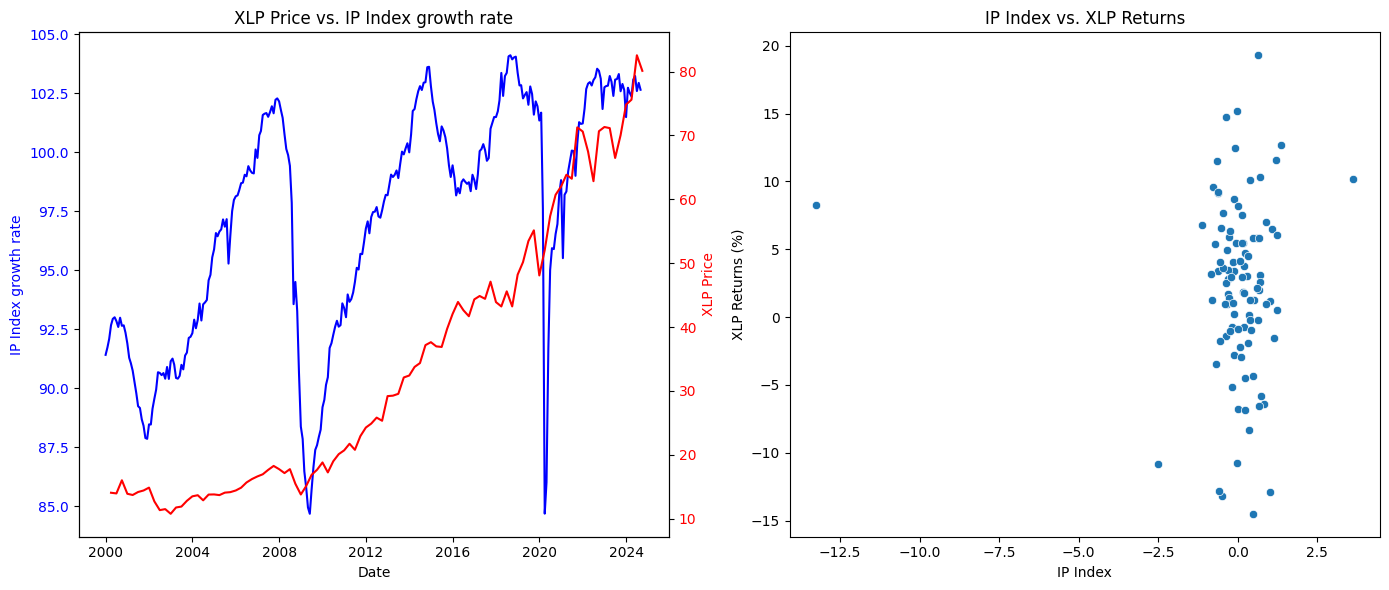

[*********************100%***********************]  1 of 1 completed

Correlation between IP Index growth rate and XLP returns: -0.037674554329453484


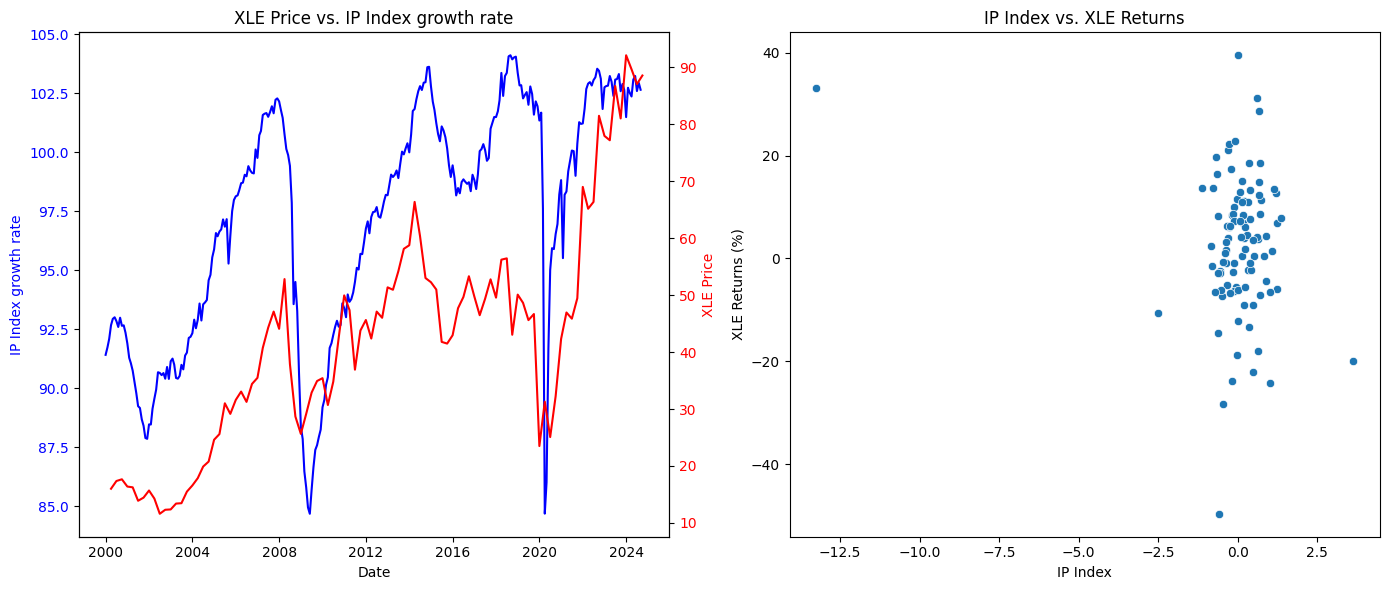

[*********************100%***********************]  1 of 1 completed

Correlation between IP Index growth rate and XLE returns: -0.19906969440045572


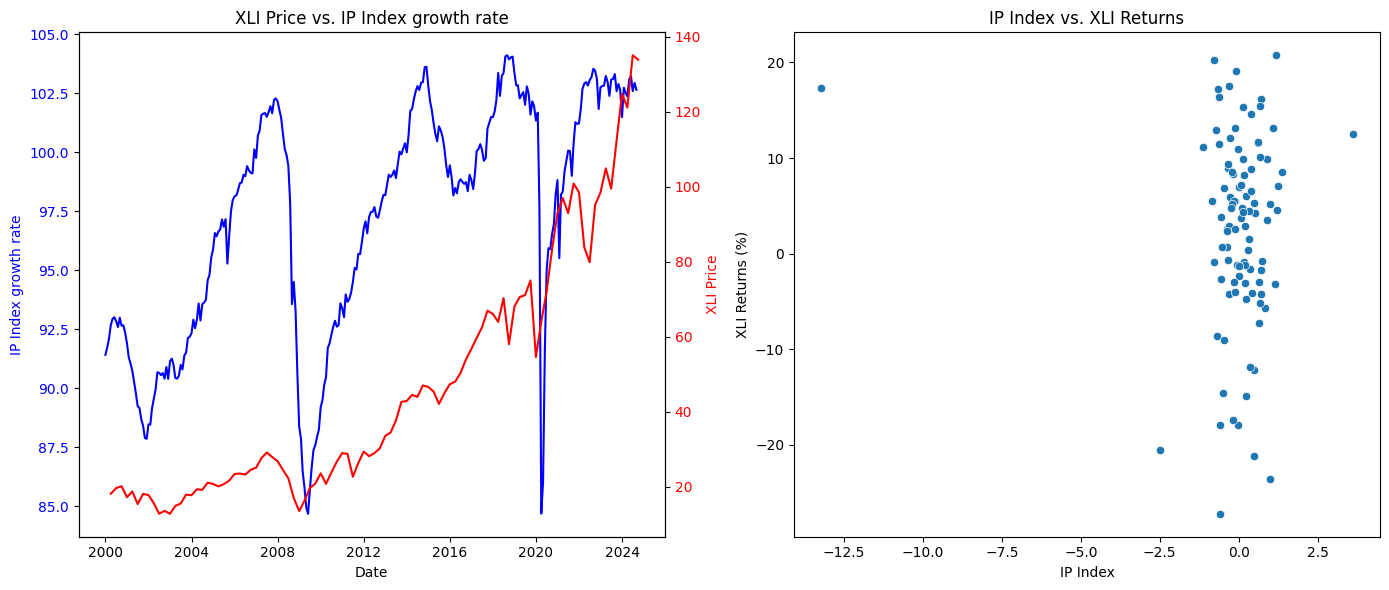

[*********************100%***********************]  1 of 1 completed

Correlation between IP Index growth rate and XLI returns: -0.07010009923041655


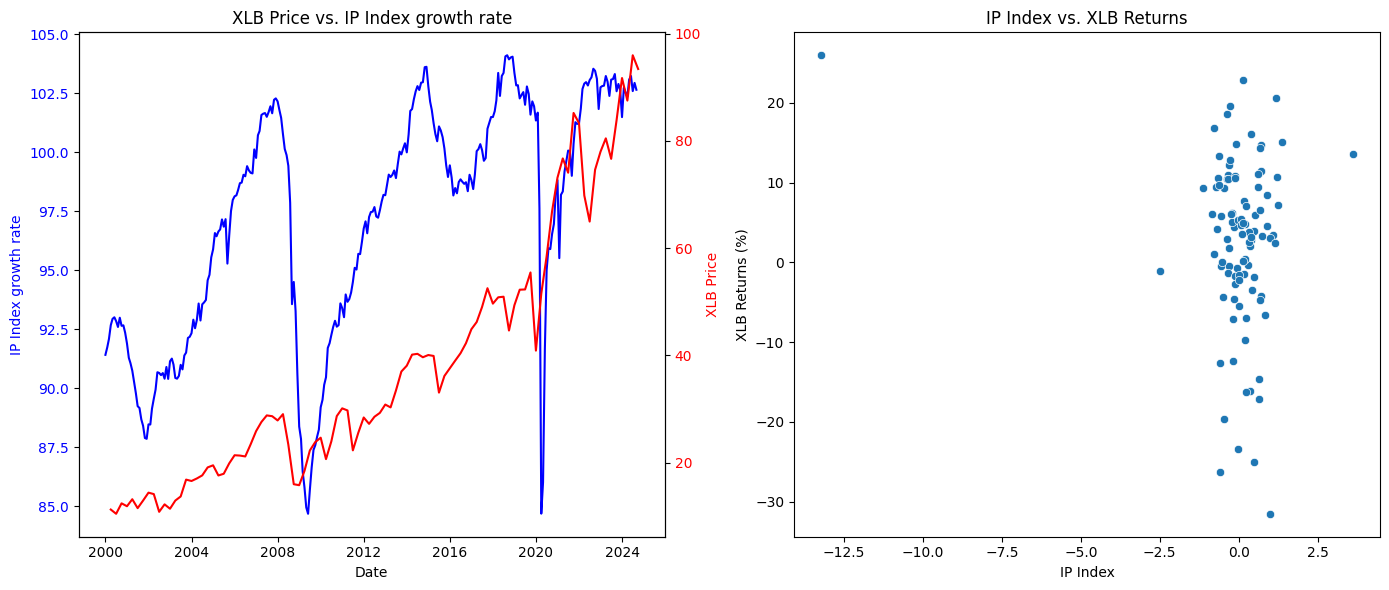

[*********************100%***********************]  1 of 1 completed

Correlation between IP Index growth rate and XLB returns: -0.18137029523915643


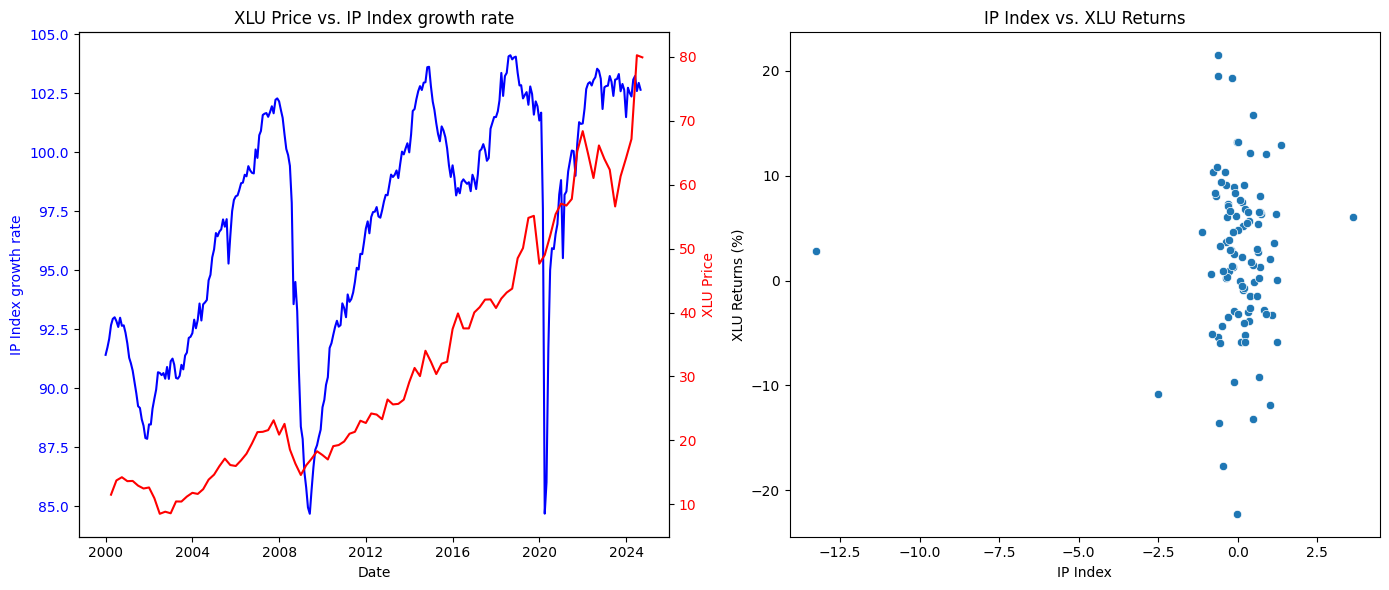

[*********************100%***********************]  1 of 1 completed

Correlation between IP Index growth rate and XLU returns: 0.002629247106926705


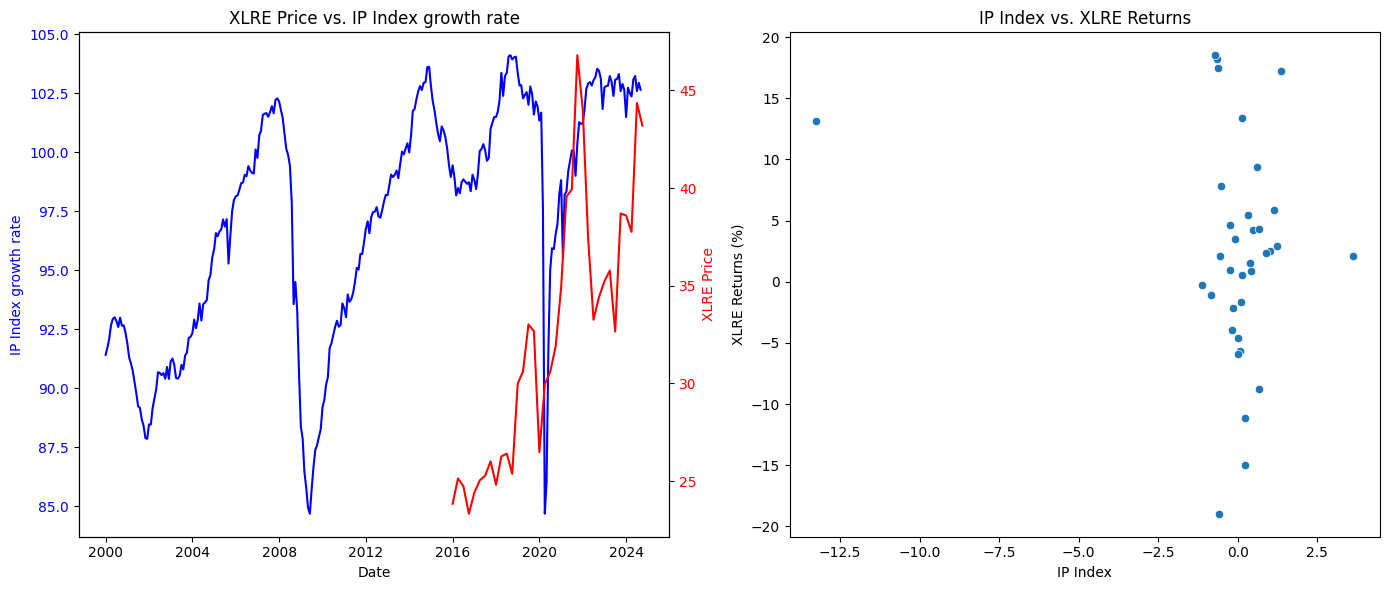

Correlation between IP Index growth rate and XLRE returns: -0.19204862537532544


In [ ]:
for etf in etfs:
    etf_data = yf.download(etf, start='2000-01-01', end='2024-10-25', interval='3mo')
    etf_data.reset_index(inplace=True)
    etf_data.columns = etf_data.columns.get_level_values(0)
    etf_data['year_month'] = etf_data['Date'].dt.strftime('%Y-%m')
    etf_data['returns'] = etf_data['Adj Close'].pct_change() * 100
    etf_data.dropna(subset=['returns'], inplace=True)

    # IP data preparation
    industrial_production_data['IP_growth_rate'] = industrial_production_data['value'].pct_change() * 100
    combined_data_industrial = pd.merge(industrial_production_data, etf_data, on='year_month', how='inner')

    if not combined_data_unemployment.empty:
        # Create subplots with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        # Plotting the time series on the first subplot
        ax1.set_title(f'{etf} Price vs. IP Index growth rate')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('IP Index growth rate', color='blue')
        ax1.plot(industrial_production_data['date'], industrial_production_data['value'], color='blue', label='IP Index growth rate')
        ax1.tick_params(axis='y', labelcolor='blue')
        ax1_2 = ax1.twinx()
        ax1_2.set_ylabel(f'{etf} Price', color='red')
        ax1_2.plot(etf_data['Date'], etf_data['Adj Close'], color='red', label=f'{etf} Price')
        ax1_2.tick_params(axis='y', labelcolor='red')

        # Correlation scatter plot on the second subplot
        sns.scatterplot(data=combined_data_industrial, x='IP_growth_rate', y='returns', ax=ax2)
        ax2.set_title(f'IP Index vs. {etf} Returns')
        ax2.set_xlabel('IP Index')
        ax2.set_ylabel(f'{etf} Returns (%)')

        plt.tight_layout()
        plt.show()

        # Calculate and print correlation
        IP_correlation = combined_data_industrial['IP_growth_rate'].corr(combined_data_industrial['returns'])
        print(f"Correlation between IP Index growth rate and {etf} returns:", IP_correlation)
    else:
        print(f"No overlapping data for IP Index and {etf} returns.")